#**Advance Machine Learning Car sale price prediction**

## Installation, configuration and import of packages

In [ ]:
# latest version of sklearn (to have access to recent features)
!pip install --upgrade scikit-learn==1.4.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 37.8 MB/s eta 0:00:00


In [ ]:
import sklearn
# this makes is easier for getting dataframes by default as input/output of
# sklearn pipelines
sklearn.set_config(transform_output="pandas")

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression, RFECV, SequentialFeatureSelector

from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, PredictionErrorDisplay
from sklearn.inspection import PartialDependenceDisplay

import time


In [ ]:
!pip install --upgrade shap==0.44.1 -q
import shap
shap.initjs()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 7.7 MB/s eta 0:00:00


## **Importing data file**

In [ ]:
auto_df = pd.read_csv('/content/adverts.csv')

In [ ]:
auto_df.head()

public_reference   mileage reg_code standard_colour standard_make  \
0      2.020060e+14       0.0      NaN            Grey         Volvo   
1      2.020070e+14  108230.0       61            Blue        Jaguar   
2      2.020070e+14    7800.0       17            Grey         SKODA   
3      2.020070e+14   45000.0       16           Brown      Vauxhall   
4      2.020070e+14   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

## **Data Processing for Machine Learning**





In [ ]:
auto_df.info()
# getting more information about the datatypes of each feature in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  float64
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 34.1+ MB


In [ ]:
auto_df.shape
# The data set has 12 column and 402,005 rows

(402005, 12)

In [ ]:
auto_df.isnull().sum()

# detection of columns with missing values

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [ ]:
auto_df.describe()
# getting an overview of the distribution of numerical features

public_reference        mileage  year_of_registration         price
count      4.020050e+05  401878.000000         368694.000000  4.020050e+05
mean       2.020069e+14   37743.595656           2015.006206  1.734197e+04
std        1.691466e+10   34831.724018              7.962667  4.643746e+04
min        2.013070e+14       0.000000            999.000000  1.200000e+02
25%        2.020090e+14   10481.000000           2013.000000  7.495000e+03
50%        2.020090e+14   28629.500000           2016.000000  1.260000e+04
75%        2.020100e+14   56875.750000           2018.000000  2.000000e+04
max        2.020110e+14  999999.000000           2020.000000  9.999999e+06

In [ ]:
auto_df['vehicle_condition'].value_counts()

vehicle_condition
USED    370756
NEW      31249
Name: count, dtype: int64

### **Dealing with missing values**

In [ ]:
# All new vehicles were not registered, from the data, the latest year of registration is 2020,
# so assuming all the new vehicles will be registered in 2021

auto_df.loc[(auto_df['year_of_registration'].isnull()) & (auto_df['vehicle_condition']== 'NEW'),
            'year_of_registration'] = 2021

In [ ]:
auto_2021 = auto_df[auto_df['year_of_registration'] == 2021]
auto_2021.head()

public_reference  mileage reg_code standard_colour standard_make  \
0       2.020060e+14      0.0      NaN            Grey         Volvo   
17      2.019110e+14      5.0      NaN             NaN        Nissan   
19      2.020080e+14      0.0      NaN           White    Volkswagen   
37      2.020010e+14      0.0      NaN           White          Fiat   
44      2.020030e+14      0.0      NaN             NaN         Honda   

   standard_model vehicle_condition  year_of_registration  price  body_type  \
0            XC90               NEW                2021.0  73970        SUV   
17        X-Trail               NEW                2021.0  27595        SUV   
19        T-Cross               NEW                2021.0  25000        SUV   
37          Panda               NEW                2021.0  13999  Hatchback   
44          Civic               NEW                2021.0  19495  Hatchback   

    crossover_car_and_van              fuel_type  
0                   False  Petrol Plug-in Hybrid  
17                  False                 Diesel  
19                  False                 Petrol  
37                  False                 Petrol  
44                  False                 Petrol

In [ ]:
# I will randomly fill the reg code with 21 and 71 which can serve for cars registered in 2021/2022
# According to the car registeration in UK, cars registered in 2021/2022 has 21 0r 71
auto_2021['reg_code'] = np.random.choice([21, 71], size=len(auto_2021))

auto_2021.head()

public_reference  mileage  reg_code standard_colour standard_make  \
0       2.020060e+14      0.0        21            Grey         Volvo   
17      2.019110e+14      5.0        71             NaN        Nissan   
19      2.020080e+14      0.0        71           White    Volkswagen   
37      2.020010e+14      0.0        71           White          Fiat   
44      2.020030e+14      0.0        71             NaN         Honda   

   standard_model vehicle_condition  year_of_registration  price  body_type  \
0            XC90               NEW                2021.0  73970        SUV   
17        X-Trail               NEW                2021.0  27595        SUV   
19        T-Cross               NEW                2021.0  25000        SUV   
37          Panda               NEW                2021.0  13999  Hatchback   
44          Civic               NEW                2021.0  19495  Hatchback   

    crossover_car_and_van              fuel_type  
0                   False  Petrol Plug-in Hybrid  
17                  False                 Diesel  
19                  False                 Petrol  
37                  False                 Petrol  
44                  False                 Petrol

In [ ]:
# updating the reg_code
# auto_df.loc[auto_df['year_of_registration']==2021, 'reg_code'] = auto_2021['reg_code']

auto_df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration      2062
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [ ]:
# Extraction of year of registration from reg_code

ext_year = auto_df[auto_df['year_of_registration'].isnull() & auto_df['reg_code'].str.isdigit()]
ext_year['reg_code'] = ext_year['reg_code'].astype('int64')

# replacing the NaN in year of registeration with the year extracted from the reg_code
mask = ext_year['reg_code'] >= 50
ext_year.loc[mask, 'year_of_registration'] = 2000 + (ext_year.loc[mask, 'reg_code'] - 50)

mask_2 = ext_year['reg_code'] < 50
ext_year.loc[mask_2, 'year_of_registration'] = 2000 + (ext_year.loc[mask_2, 'reg_code'])

In [ ]:
#converting the reg_code back to object so as to update the auto_df
ext_year['reg_code'] = ext_year['reg_code'].astype('object')
auto_df.update(ext_year['year_of_registration'])


In [ ]:
# Drop Duplicates
auto_df.drop_duplicates(inplace=True)

In [ ]:
auto_df.isnull().sum()
# year of registration updated and duplicates dropped

public_reference             0
mileage                    124
reg_code                 26405
standard_colour           5210
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration       368
price                        0
body_type                  818
crossover_car_and_van        0
fuel_type                  560
dtype: int64

In [ ]:
# Replacing missing values
"""
all categorical features are replaced with mode, while the year of registration and
mileage are replace using KNNImputer using their nearest neighbours
to avoid decimals in year of registeration, they are rounded up

"""
def replace_missing_val(df):
  cat_feat = df.select_dtypes(include='object').columns.tolist()
  cat_trans = Pipeline(
      steps=[
          ("imputer", SimpleImputer(strategy='most_frequent'))
      ]
  )
  num_feat = ['year_of_registration', 'mileage']
  num_trans = Pipeline(
      steps=[
          ('knnimputer', KNNImputer(n_neighbors=2))
      ]
  )



  df[cat_feat] = cat_trans.fit_transform(df[cat_feat])
  df[num_feat] = num_trans.fit_transform(df[num_feat])

  df['year_of_registration'] = np.round(df['year_of_registration'])

  return df



In [ ]:
auto_df = replace_missing_val(auto_df)
auto_df.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

### **Removal of Outliers**


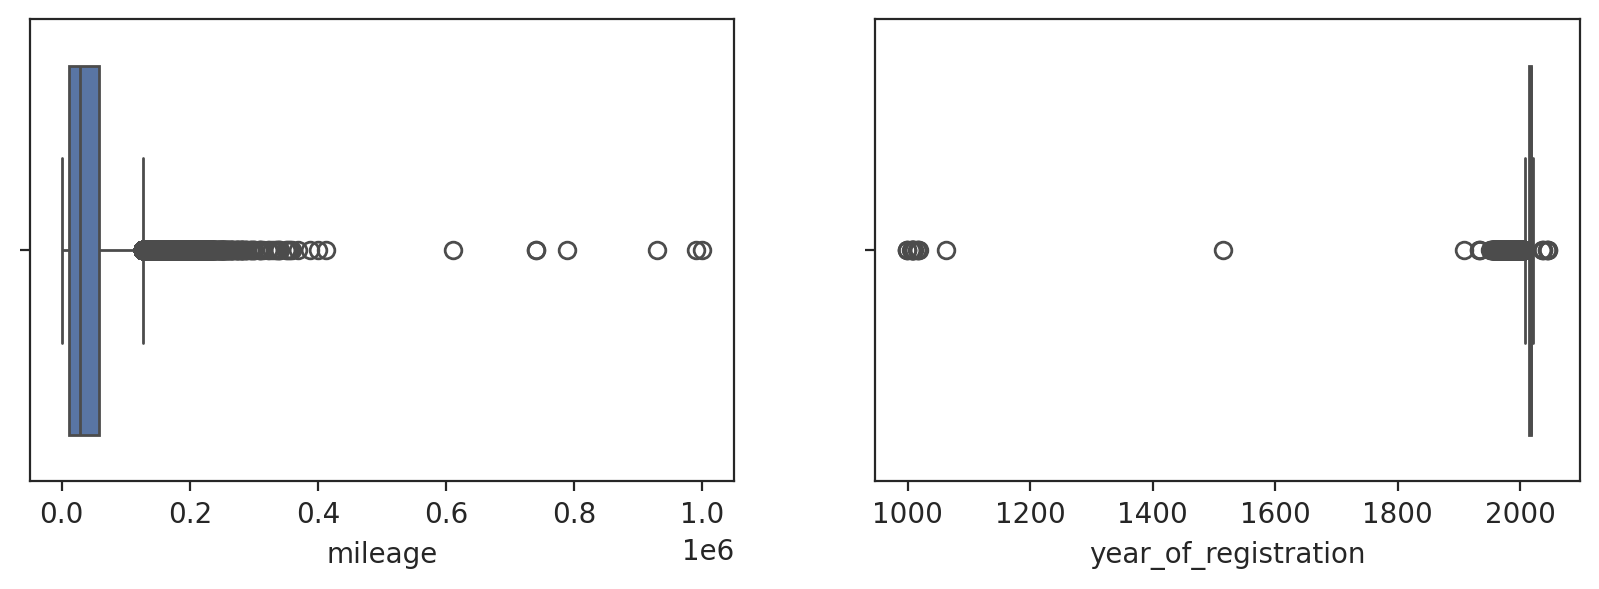

In [ ]:
# checking the outliers in mileage and year of registration
fig, ax = plt.subplots(1, 2, figsize=(10,3) );
sns.boxplot(data=auto_df, x='mileage', ax=ax[0]);
sns.boxplot(data=auto_df, x='year_of_registration', ax=ax[1]);



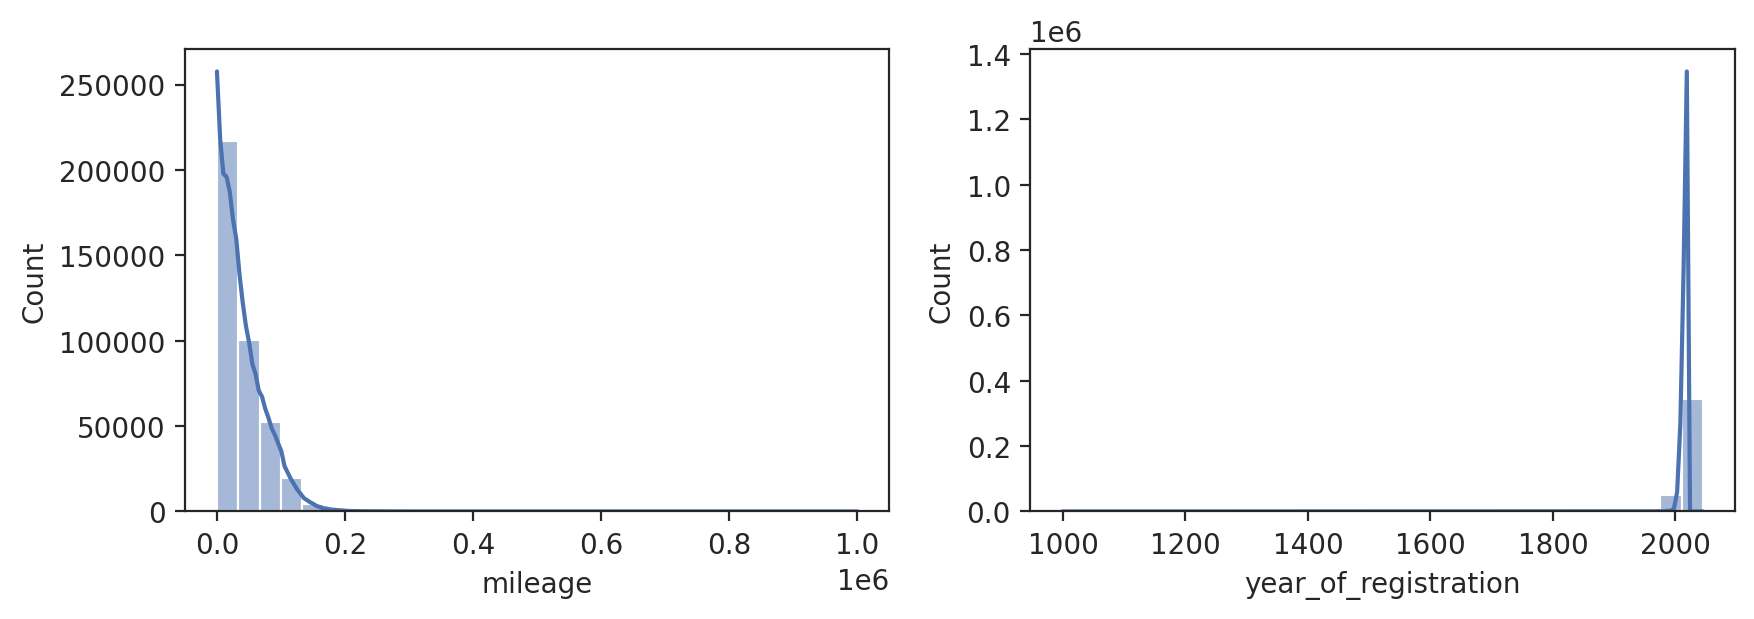

In [ ]:
# the mileage is postively skewed, so i will remove the outliers using the interquatile range
fig, ax = plt.subplots(1, 2, figsize=(10,3) );
sns.histplot(data=auto_df, x='mileage', bins=30, kde=True, ax=ax[0]);
sns.histplot(data=auto_df, x='year_of_registration', bins=30,kde=True, ax=ax[1]);

In [ ]:
# the mileage below Q1 limit and above Q3 limit are removed as outliers
Q1 = auto_df['mileage'].quantile(0.25)
Q3 = auto_df['mileage'].quantile(0.75)
IQR = Q3 - Q1
auto_df = auto_df[(auto_df['mileage'] >= Q1 - 1.5 * IQR) & (auto_df['mileage'] <= Q3 + 1.5 * IQR)]
print("lower_limit:" ,Q1 - 1.5 * IQR, "upper_limit: ", Q3 + 1.5 * IQR)

lower_limit: -57800.0 upper_limit:  126520.0


In [ ]:
# # the mileage below Q1 limit and above Q3 limit are removed as outliers
# Q1 = auto_df['year_of_registration'].quantile(0.25)
# Q3 = auto_df['year_of_registration'].quantile(0.75)
# IQR = Q3 - Q1
# auto_df = auto_df[(auto_df['mileage'] >= max(1950, Q1 - 1.5 * IQR)) & (auto_df['mileage'] <= Q3 + 1.5 * IQR)]
# # print("lower_limit:" ,min(2024, Q1 - 1.5 * IQR), "upper_limit: ", Q3 + 1.5 * IQR)

In [ ]:
#the usage of number reg code started in 2001, according to the documentation, so we need to remove any cars below this year that has
# a number reg code, because we can necessarily tell whether the year or the reg code is wrong
# also vehicles with alphabet reg code of year above 2001 is also removed
filtered = auto_df[(auto_df['year_of_registration']<2001) & (auto_df['reg_code'].str.contains('\d'))]
filtered2 = auto_df[(auto_df['year_of_registration'] > 2001) & (auto_df['reg_code'].str.contains('[a-zA-Z]'))]

auto_df.drop(filtered.index, inplace=True)
auto_df.drop(filtered2.index, inplace=True)

In [ ]:
auto_df[auto_df['year_of_registration']>2021]


public_reference  mileage reg_code standard_colour  standard_make  \
9940        2.020100e+14  32001.0       94          Orange        Renault   
28559       2.020100e+14  58686.0       85           Black        Hyundai   
167430      2.020100e+14  55643.0       95            Grey        Citroen   
231213      2.020100e+14  61370.0       94           Black       Vauxhall   
265390      2.019120e+14  23157.0       38           Black  Mercedes-Benz   
329449      2.020100e+14  39312.0       95          Silver        Renault   
357325      2.020100e+14  31487.0       37           White         Suzuki   

       standard_model vehicle_condition  year_of_registration  price  \
9940           Captur              USED                2044.0   7400   
28559             i30              USED                2035.0   6900   
167430            DS4              USED                2045.0   6800   
231213          Mokka              USED                2044.0   7450   
265390        E Class              USED                2038.0  26550   
329449         Captur              USED                2045.0   8000   
357325         Baleno              USED                2037.0   6950   

        body_type  crossover_car_and_van fuel_type  
9940          SUV                  False    Petrol  
28559   Hatchback                  False    Diesel  
167430  Hatchback                  False    Diesel  
231213  Hatchback                  False    Diesel  
265390  Hatchback                  False    Diesel  
329449        SUV                  False    Petrol  
357325  Hatchback                  False    Petrol

In [ ]:
auto_df[(auto_df['year_of_registration']<1960)]

public_reference  mileage reg_code standard_colour standard_make  \
156562      2.020090e+14  48000.0       FW           Black        Morris   
392281      2.018020e+14  72000.0        p           Green    Land Rover   
397962      2.020100e+14  86813.0        A            Blue          Fiat   

       standard_model vehicle_condition  year_of_registration  price  \
156562             10              USED                1934.0   5995   
392281       Series I              USED                1957.0  27995   
397962    Pininfarina              USED                1954.0  12500   

          body_type  crossover_car_and_van fuel_type  
156562       Saloon                  False    Petrol  
392281  Convertible                  False    Petrol  
397962  Convertible                  False    Petrol

In [ ]:
#Removal of any car registered below 1900 and above, which are categorized as outliers, they are 17
auto_df= auto_df[(auto_df['year_of_registration']<=2021)]



In [ ]:
auto_df[(auto_df['mileage']==0) & (auto_df['vehicle_condition']=='USED')]

public_reference  mileage reg_code standard_colour  standard_make  \
810         2.020090e+14      0.0       70            Grey     Land Rover   
1656        2.020110e+14      0.0       13          Silver       Vauxhall   
1855        2.020100e+14      0.0       70            Grey  Mercedes-Benz   
2201        2.020090e+14      0.0       70           Black     Land Rover   
2754        2.020080e+14      0.0       63           Black           Audi   
...                  ...      ...      ...             ...            ...   
392399      2.020090e+14      0.0       70           Black         Nissan   
392484      2.020100e+14      0.0       70           Black           Audi   
397265      2.020100e+14      0.0       70            Blue           SEAT   
398534      2.020100e+14      0.0       70           White           Audi   
400724      2.020080e+14      0.0        L          Silver        Porsche   

           standard_model vehicle_condition  year_of_registration   price  \
810     Range Rover Velar              USED                2020.0   52995   
1656             Insignia              USED                2013.0    2975   
1855            CLA Class              USED                2020.0   34995   
2201          Range Rover              USED                2020.0   82750   
2754                   A1              USED                2013.0    8000   
...                   ...               ...                   ...     ...   
392399              Micra              USED                2020.0   15495   
392484                 Q2              USED                2020.0   22300   
397265              Arona              USED                2020.0   18648   
398534             E-Tron              USED                2020.0   80000   
400724                911              USED                1973.0  175000   

        body_type  crossover_car_and_van fuel_type  
810           SUV                  False    Diesel  
1656    Hatchback                  False    Diesel  
1855       Estate                  False    Petrol  
2201          SUV                  False    Diesel  
2754    Hatchback                  False    Diesel  
...           ...                    ...       ...  
392399  Hatchback                  False    Petrol  
392484        SUV                  False    Petrol  
397265        SUV                  False    Petrol  
398534        SUV                  False  Electric  
400724  Hatchback                  False    Petrol  

[351 rows x 12 columns]

In [ ]:
auto_df[(auto_df['mileage']==0)]

#those vehicles with zero mileage

public_reference  mileage reg_code standard_colour standard_make  \
0           2.020060e+14      0.0       17            Grey         Volvo   
19          2.020080e+14      0.0       17           White    Volkswagen   
37          2.020010e+14      0.0       17           White          Fiat   
44          2.020030e+14      0.0       17           Black         Honda   
45          2.020030e+14      0.0       17            Grey         Volvo   
...                  ...      ...      ...             ...           ...   
401717      2.020040e+14      0.0       17            Grey    Land Rover   
401721      2.020040e+14      0.0       17           Black         Volvo   
401726      2.020060e+14      0.0       17          Silver        Toyota   
401836      2.020090e+14      0.0       17            Grey        Jaguar   
401905      2.020100e+14      0.0       17             Red    Land Rover   

            standard_model vehicle_condition  year_of_registration  price  \
0                     XC90               NEW                2021.0  73970   
19                 T-Cross               NEW                2021.0  25000   
37                   Panda               NEW                2021.0  13999   
44                   Civic               NEW                2021.0  19495   
45                     S60               NEW                2021.0  40264   
...                    ...               ...                   ...    ...   
401717         Range Rover               NEW                2021.0  83737   
401721                 V90               NEW                2021.0  42400   
401726               Camry               NEW                2021.0  30990   
401836              F-Type               NEW                2021.0  54064   
401905  Range Rover Evoque               NEW                2021.0  44995   

        body_type  crossover_car_and_van              fuel_type  
0             SUV                  False  Petrol Plug-in Hybrid  
19            SUV                  False                 Petrol  
37      Hatchback                  False                 Petrol  
44      Hatchback                  False                 Petrol  
45         Saloon                  False                 Petrol  
...           ...                    ...                    ...  
401717        SUV                  False                 Diesel  
401721     Estate                  False                 Petrol  
401726     Saloon                  False          Petrol Hybrid  
401836      Coupe                  False                 Petrol  
401905        SUV                  False                 Petrol  

[12330 rows x 12 columns]

In [ ]:
# Dropping rows that has mileage of 0 and the vehicles are used

auto_df.drop(auto_df[(auto_df['mileage'] == 0) & (auto_df['vehicle_condition'] == 'USED')].index, inplace=True)


### **Encoding, rescaling and splitting**

In [ ]:
# #Dropping of columns that
# auto_df.drop(columns='public_reference', inplace=True)

In [ ]:
auto_df.head()

public_reference   mileage reg_code standard_colour standard_make  \
0      2.020060e+14       0.0       17            Grey         Volvo   
1      2.020070e+14  108230.0       61            Blue        Jaguar   
2      2.020070e+14    7800.0       17            Grey         SKODA   
3      2.020070e+14   45000.0       16           Brown      Vauxhall   
4      2.020070e+14   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                2021.0  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [ ]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386338 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       386338 non-null  float64
 1   mileage                386338 non-null  float64
 2   reg_code               386338 non-null  object 
 3   standard_colour        386338 non-null  object 
 4   standard_make          386338 non-null  object 
 5   standard_model         386338 non-null  object 
 6   vehicle_condition      386338 non-null  object 
 7   year_of_registration   386338 non-null  float64
 8   price                  386338 non-null  int64  
 9   body_type              386338 non-null  object 
 10  crossover_car_and_van  386338 non-null  bool   
 11  fuel_type              386338 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 35.7+ MB


In [ ]:
#Understing the number of unique values in each of the columns
cat_var = ['standard_make', 'standard_model', 'crossover_car_and_van', 'standard_colour', 'vehicle_condition', 'body_type', 'fuel_type' ]
cat_auto_df = auto_df[cat_var]

for feat in cat_var:
    print(feat, ':', cat_auto_df[feat].nunique(), 'unique_values')



standard_make : 106 unique_values
standard_model : 1126 unique_values
crossover_car_and_van : 2 unique_values
standard_colour : 22 unique_values
vehicle_condition : 2 unique_values
body_type : 16 unique_values
fuel_type : 8 unique_values


In [ ]:
auto_df['reg_code'].unique()

array(['17', '61', '16', '64', '13', '8', '19', '60', '69', '66', '12',
       '18', '65', '9', 'B', '10', '14', '3', '67', '63', '15', '68',
       '56', '20', '70', '62', '11', '5', '59', '58', '2', 'W', '57', '6',
       '52', '4', '7', '55', '51', 'X', 'D', 'S', 'Y', '53', '54', 'K',
       'V', 'H', 'M', 'L', 'E', 'T', 'N', 'P', 'G', 'J', 'F', 'R', 'C',
       'A', 'FW', 's', 'k', 'p'], dtype=object)

In [ ]:
# Converting the reg_code column to str, since it contains the mixture of int and str
auto_df['reg_code'] = auto_df['reg_code'].astype(str)

In [ ]:
auto_df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [ ]:
# Stratifying the dataset

auto_df = auto_df.groupby(['standard_make', 'standard_model']).sample(frac=0.20, random_state=0)


In [ ]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77211 entries, 343931 to 249621
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       77211 non-null  float64
 1   mileage                77211 non-null  float64
 2   reg_code               77211 non-null  object 
 3   standard_colour        77211 non-null  object 
 4   standard_make          77211 non-null  object 
 5   standard_model         77211 non-null  object 
 6   vehicle_condition      77211 non-null  object 
 7   year_of_registration   77211 non-null  float64
 8   price                  77211 non-null  int64  
 9   body_type              77211 non-null  object 
 10  crossover_car_and_van  77211 non-null  bool   
 11  fuel_type              77211 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 7.1+ MB


In [ ]:
# Separating the target from the other features

X = auto_df.drop(columns=['price'])
y = auto_df['price']

In [ ]:
def Preprocessing_enc_sca(X, y):

  num_feat=['mileage', 'year_of_registration', 'public_reference' ]
  cat_ohe_feat=['vehicle_condition', 'crossover_car_and_van' ]
  cat_tar_feat=[ 'reg_code','standard_colour', 'standard_make', 'standard_model', 'body_type',  'fuel_type' ]

  num_trans = Pipeline(
        steps = [
            ("scaler", MinMaxScaler())
        ]
  )

  cat_trans_oh = Pipeline(
        steps=[
            ("encoder", OneHotEncoder(
                sparse_output=False,
                drop="if_binary"
            ))
        ]
  )

  cat_trans_te = Pipeline(
        steps=[
            ("encoder", TargetEncoder(target_type='continuous',
                                      shuffle=False)),
            ("scaler", MinMaxScaler())
        ]

  )


  preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_trans, num_feat),
        ("cat_oh", cat_trans_oh, cat_ohe_feat),
        ("cat_te", cat_trans_te, cat_tar_feat)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
  )

  return preprocessor

In [ ]:
# trying to merge the transformed independent features and the target feature, so as to determine the correlations
# with the target
# price = pd.DataFrame( y.tolist()).rename(columns={0: 'price'})
# trans_auto_df = pd.merge(X_pro, y, left_index=True, right_index=True)
# trans_auto_df

In [ ]:
#Splitting the train 80% and the validation and testing is 20%
# the validation and testing will further be splitted
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Splitting of the eval dataset to validation and testing
X_valid, X_test, y_valid, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=42)

In [ ]:
print('dataset X train', len(X_train), 'dataset y_train', len(y_train))
print('dataset X test', len(X_test), 'dataset y test', len(y_test))
print('dataset X validation', len(X_valid), 'dataset y validation', len(y_valid))

dataset X train 61768 dataset y_train 61768
dataset X test 7722 dataset y test 7722
dataset X validation 7721 dataset y validation 7721


## **Feature Engineering**

### Based on domain knowledge

In [ ]:
print(max(auto_df['year_of_registration']))

2021.0


In [ ]:
# based on the dataset, i can derive the age of vehicle from the year of registration
auto_df['vehicle_age'] = pd.Timestamp.now().year - auto_df['year_of_registration']

In [ ]:
# grouping the mileage into low, medium and high mileage.
# Since mileage is a good feature for prediction based on the domain knowledge

auto_df['mileage_level'] = pd.cut(
    auto_df['mileage'],
    bins=[-1, 50000, 100000, float('inf')],
    labels=['low', 'medium', 'high']
)


<Axes: xlabel='vehicle_age', ylabel='mileage'>

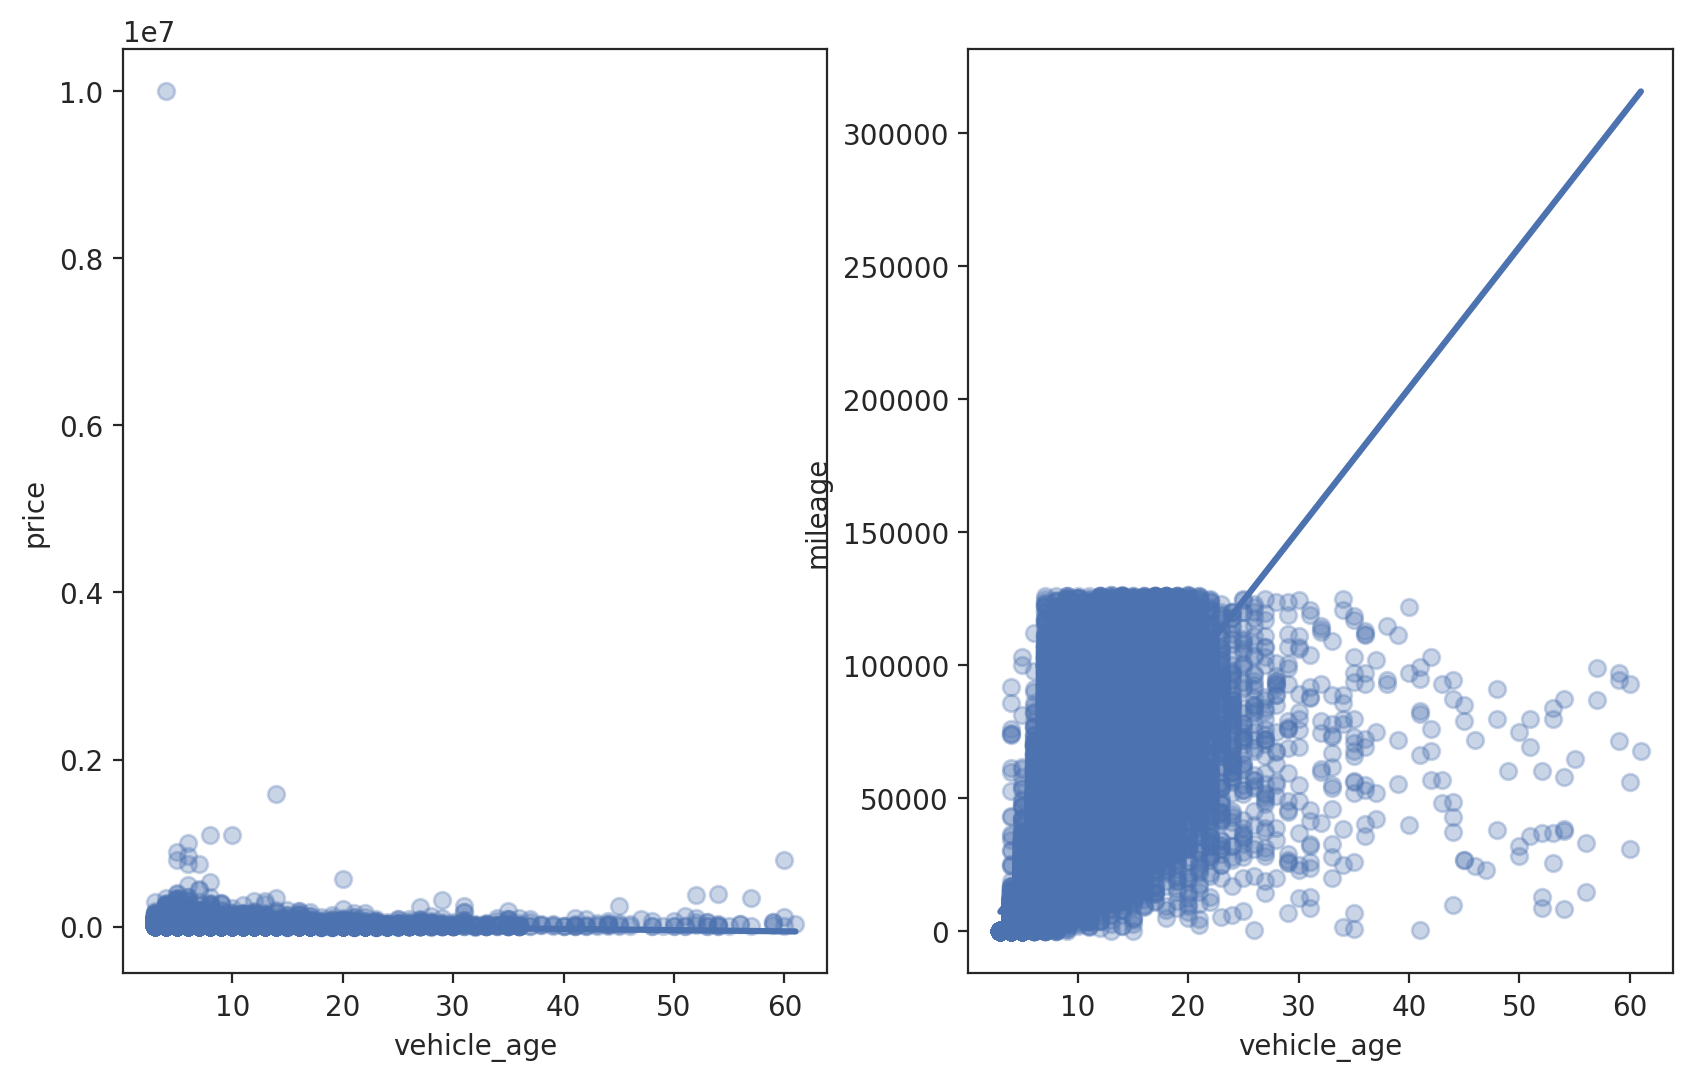

In [ ]:
fig, ax = plt.subplots(1, 2 , figsize=(10, 6))
sns.regplot(
        x=auto_df['vehicle_age'], y=auto_df['price'],
        scatter_kws=dict(alpha=0.3), ax=ax[0], ci=None
    )

sns.regplot(
        x=auto_df['vehicle_age'], y=auto_df['mileage'],
        scatter_kws=dict(alpha=0.3), ax=ax[1], ci=None
    )

### Polynomial and Interaction features

In [ ]:
auto_df.head()

public_reference  mileage reg_code standard_colour standard_make  \
343931      2.019100e+14    700.0       17           Black            AC   
282026      2.020100e+14   6465.0       68            Grey        Abarth   
351001      2.020080e+14   3161.0       68           White        Abarth   
290659      2.020080e+14   8612.0       18           White        Abarth   
374422      2.020070e+14  10119.0       68            Blue        Abarth   

       standard_model vehicle_condition  year_of_registration  price  \
343931          Cobra              USED                2016.0  94950   
282026     124 Spider              USED                2018.0  18599   
351001     124 Spider              USED                2019.0  19500   
290659     124 Spider              USED                2018.0  18400   
374422     124 Spider              USED                2018.0  17999   

          body_type  crossover_car_and_van fuel_type  vehicle_age  \
343931  Convertible                  False    Petrol          8.0   
282026  Convertible                  False    Petrol          6.0   
351001  Convertible                  False    Petrol          5.0   
290659  Convertible                  False    Petrol          6.0   
374422  Convertible                  False    Petrol          6.0   

       mileage_level  
343931           low  
282026           low  
351001           low  
290659           low  
374422           low

In [ ]:
X_train.head()

public_reference  mileage reg_code standard_colour standard_make  \
338157      2.020100e+14  98283.0       52          Silver         Honda   
340243      2.020080e+14  36305.0       14             Red          Audi   
145888      2.020090e+14  31662.0       63             Red       Hyundai   
243936      2.020100e+14  80000.0       12           White        Toyota   
218871      2.020100e+14  36000.0       67           Black          Audi   

       standard_model vehicle_condition  year_of_registration  body_type  \
338157           CR-V              USED                2002.0        SUV   
340243             Q5              USED                2014.0        SUV   
145888            i10              USED                2013.0  Hatchback   
243936          Yaris              USED                2012.0  Hatchback   
218871             A3              USED                2017.0  Hatchback   

        crossover_car_and_van fuel_type  
338157                  False    Petrol  
340243                  False    Petrol  
145888                  False    Petrol  
243936                  False    Petrol  
218871                  False    Diesel

In [ ]:
price = pd.DataFrame( y_train.tolist()).rename(columns={0: 'price'})

In [ ]:
preprocessor = Preprocessing_enc_sca(X, y)
preprocessor.fit(X_train, y_train)
X_train_pro = preprocessor.transform(X_train)
X_valid_pro = preprocessor.transform(X_valid)

In [ ]:
X_train_pro.head()

mileage  year_of_registration  public_reference  \
338157  0.776941              0.672414          0.998024   
340243  0.286996              0.879310          0.994071   
145888  0.250292              0.862069          0.996047   
243936  0.632411              0.844828          0.998024   
218871  0.284585              0.931034          0.998024   

        vehicle_condition_USED  crossover_car_and_van_True  reg_code  \
338157                     1.0                         0.0  0.051861   
340243                     1.0                         0.0  0.133779   
145888                     1.0                         0.0  0.102663   
243936                     1.0                         0.0  0.083367   
218871                     1.0                         0.0  0.234332   

        standard_colour  standard_make  standard_model  body_type  fuel_type  
338157         0.418022       0.060755        0.016857   0.285135   0.121340  
340243         0.433590       0.115775        0.029353   0.285135   0.121340  
145888         0.433590       0.063150        0.007860   0.007374   0.121340  
243936         0.572360       0.061869        0.010058   0.007374   0.121340  
218871         0.801087       0.115775        0.016186   0.007374   0.125351

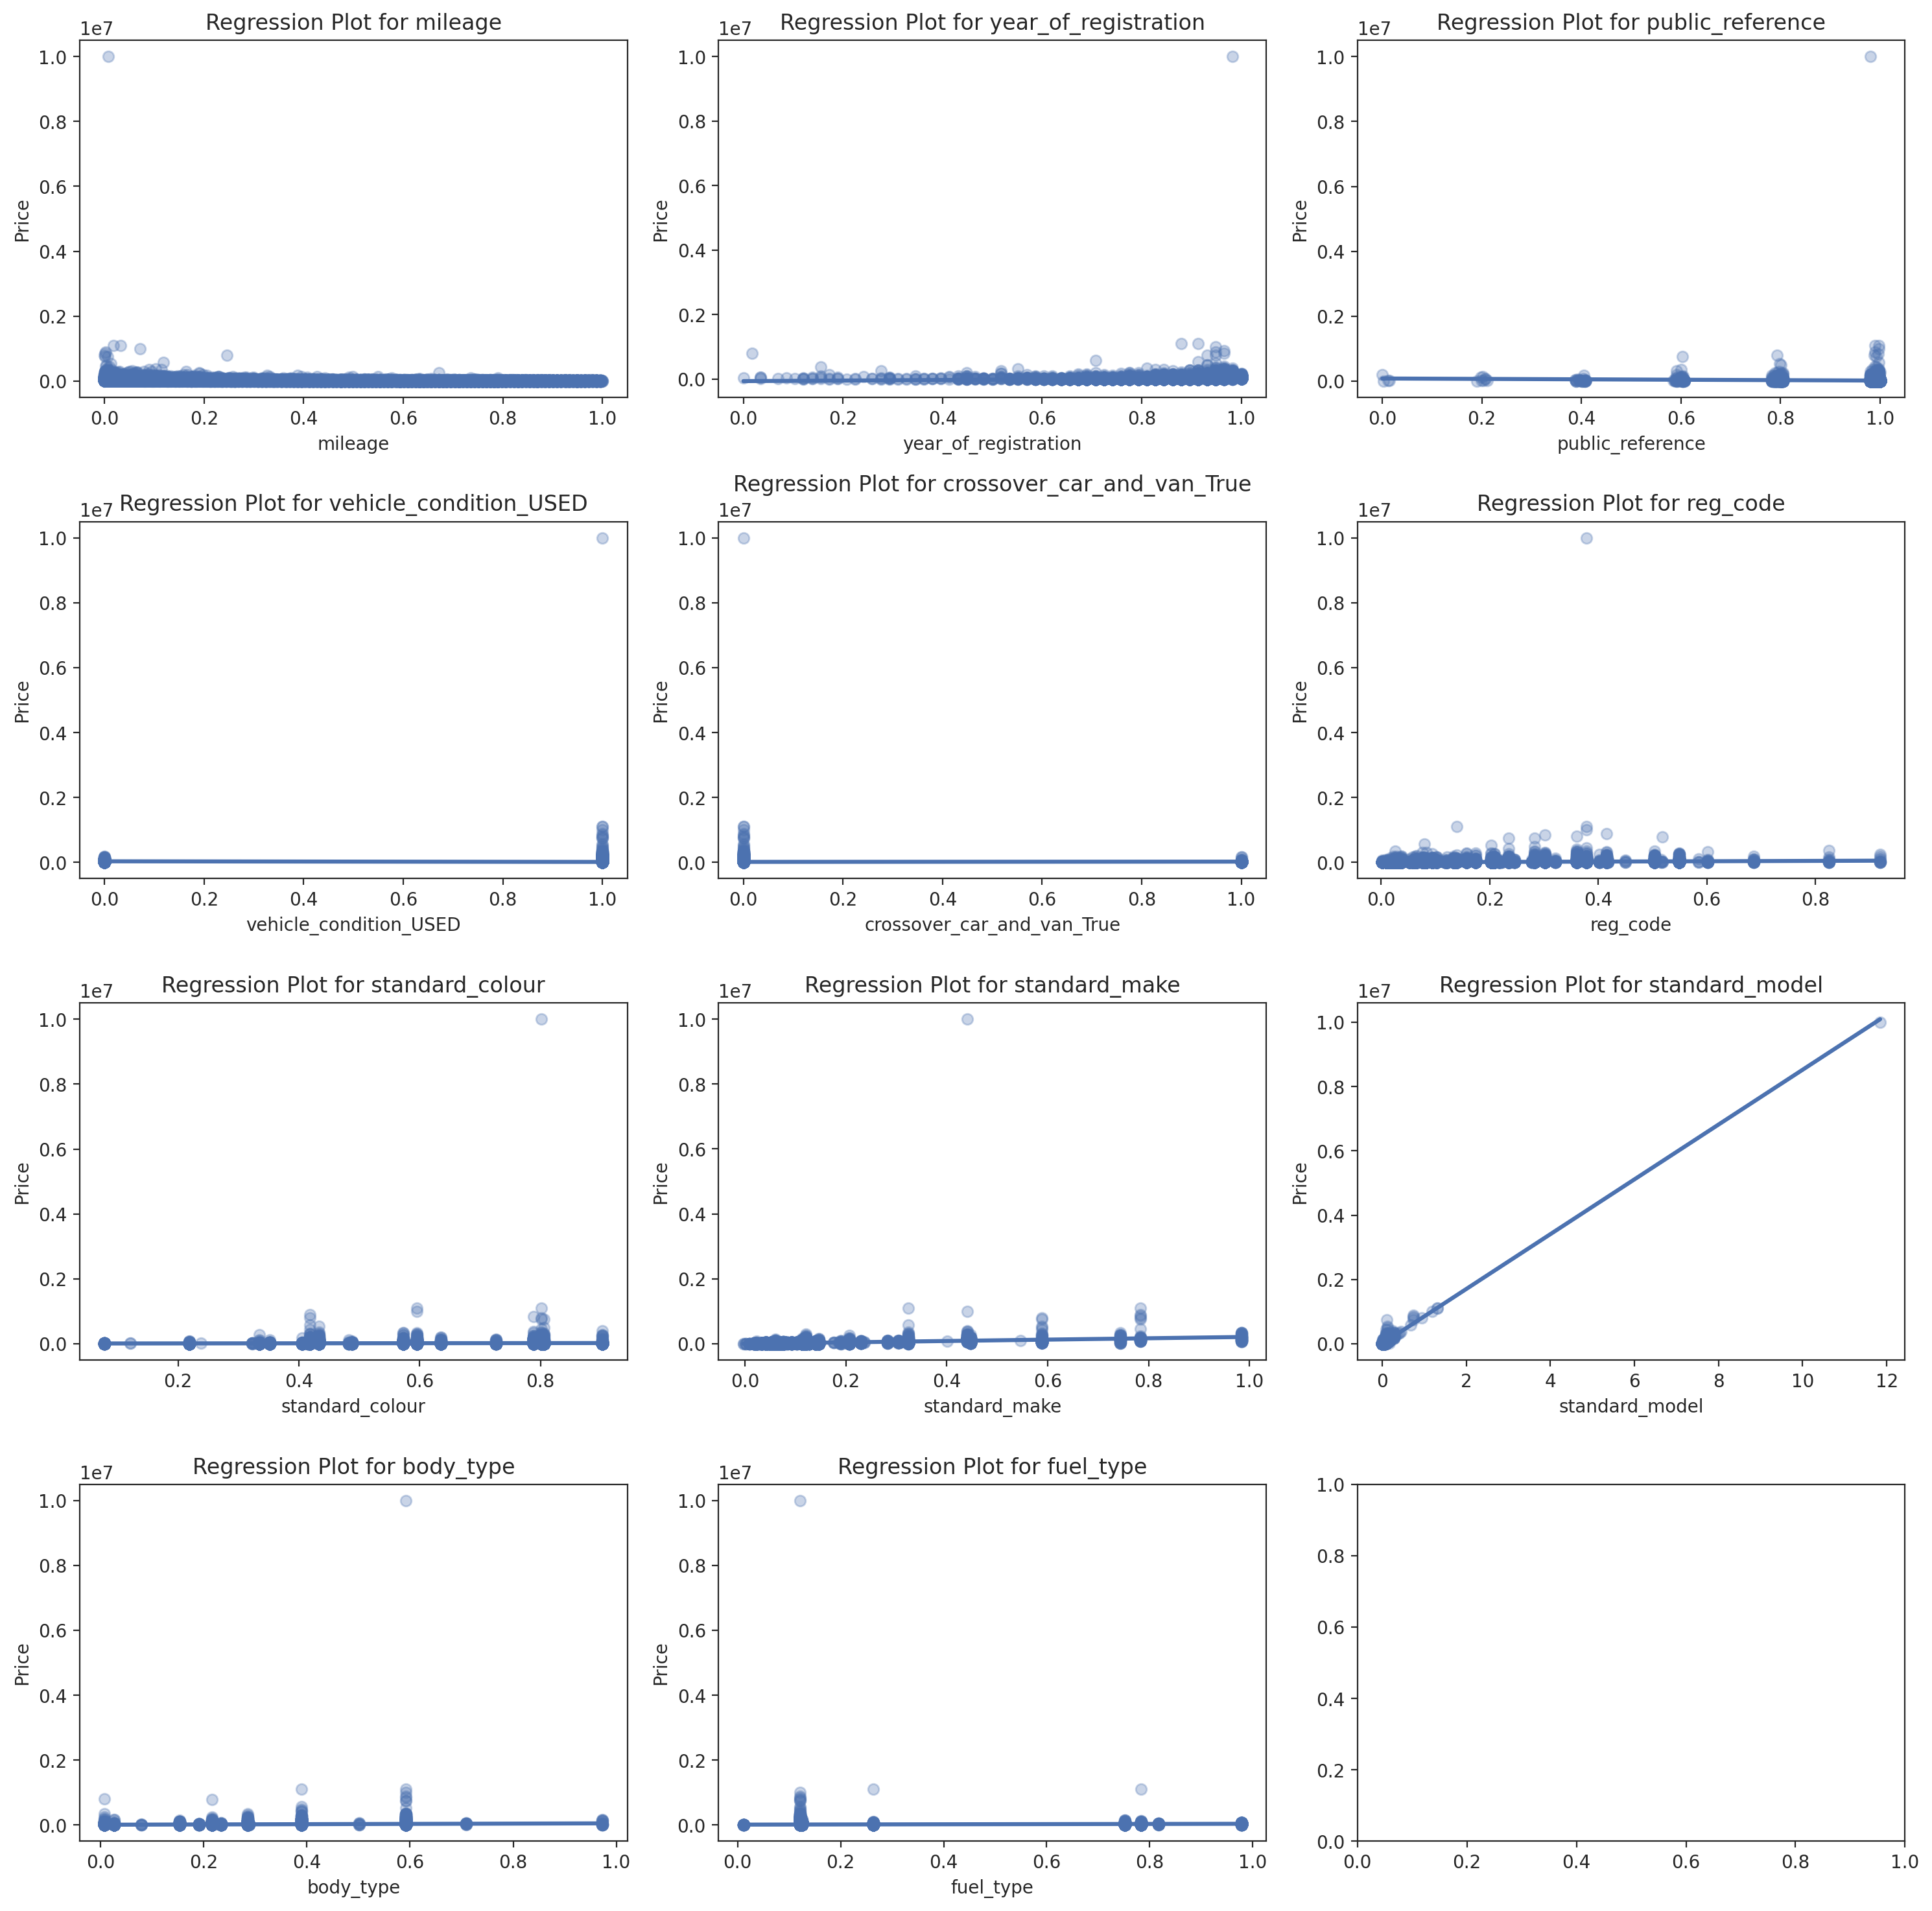

In [ ]:
"""
The plots helps to understand the comparison of different features with the price
only standard model shows a positive characteristics
"""
# Create subplots
fig, ax = plt.subplots(4, 3, figsize=(15, 15))

# Flattening the ax array
ax = ax.flatten()

# regplot for each column
for i, column in enumerate(X_train_pro.columns):
    sns.regplot(
        x=X_train_pro[column], y=y_train,
        scatter_kws=dict(alpha=0.3), ax=ax[i], ci=None
    )
    ax[i].set_title(f'Regression Plot for {column}')
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [ ]:
"""
Trying to understand the effect of polynomial interaction features on the dataset
"""
preprocessor = Preprocessing_enc_sca(X, y)

poly_reg = Pipeline(
    steps=[
        ('pro', preprocessor),
        ('poly', PolynomialFeatures(
            interaction_only=False, degree=2, include_bias=False
        )),
    ]
)

In [ ]:
poly_reg.fit(X_train, y_train)
X_train_poly = poly_reg.transform(X_train)
X_train_poly.head()

# The 11 features have been transformed into 77 features

mileage  year_of_registration  public_reference  \
338157  0.776941              0.672414          0.998024   
340243  0.286996              0.879310          0.994071   
145888  0.250292              0.862069          0.996047   
243936  0.632411              0.844828          0.998024   
218871  0.284585              0.931034          0.998024   

        vehicle_condition_USED  crossover_car_and_van_True  reg_code  \
338157                     1.0                         0.0  0.051861   
340243                     1.0                         0.0  0.133779   
145888                     1.0                         0.0  0.102663   
243936                     1.0                         0.0  0.083367   
218871                     1.0                         0.0  0.234332   

        standard_colour  standard_make  standard_model  body_type  ...  \
338157         0.418022       0.060755        0.016857   0.285135  ...   
340243         0.433590       0.115775        0.029353   0.285135  ...   
145888         0.433590       0.063150        0.007860   0.007374  ...   
243936         0.572360       0.061869        0.010058   0.007374  ...   
218871         0.801087       0.115775        0.016186   0.007374  ...   

        standard_make^2  standard_make standard_model  \
338157         0.003691                      0.001024   
340243         0.013404                      0.003398   
145888         0.003988                      0.000496   
243936         0.003828                      0.000622   
218871         0.013404                      0.001874   

        standard_make body_type  standard_make fuel_type  standard_model^2  \
338157                 0.017323                 0.007372          0.000284   
340243                 0.033012                 0.014048          0.000862   
145888                 0.000466                 0.007663          0.000062   
243936                 0.000456                 0.007507          0.000101   
218871                 0.000854                 0.014513          0.000262   

        standard_model body_type  standard_model fuel_type  body_type^2  \
338157                  0.004807                  0.002045     0.081302   
340243                  0.008370                  0.003562     0.081302   
145888                  0.000058                  0.000954     0.000054   
243936                  0.000074                  0.001220     0.000054   
218871                  0.000119                  0.002029     0.000054   

        body_type fuel_type  fuel_type^2  
338157             0.034598     0.014723  
340243             0.034598     0.014723  
145888             0.000895     0.014723  
243936             0.000895     0.014723  
218871             0.000924     0.015713  

[5 rows x 77 columns]

In [ ]:
X_valid_poly = poly_reg.transform(X_valid)
X_test_poly = poly_reg.transform(X_test)

In [ ]:
X_train_poly.columns

Index(['mileage', 'year_of_registration', 'public_reference',
       'vehicle_condition_USED', 'crossover_car_and_van_True', 'reg_code',
       'standard_colour', 'standard_make', 'standard_model', 'body_type',
       'fuel_type', 'mileage^2', 'mileage year_of_registration',
       'mileage public_reference', 'mileage vehicle_condition_USED',
       'mileage crossover_car_and_van_True', 'mileage reg_code',
       'mileage standard_colour', 'mileage standard_make',
       'mileage standard_model', 'mileage body_type', 'mileage fuel_type',
       'year_of_registration^2', 'year_of_registration public_reference',
       'year_of_registration vehicle_condition_USED',
       'year_of_registration crossover_car_and_van_True',
       'year_of_registration reg_code', 'year_of_registration standard_colour',
       'year_of_registration standard_make',
       'year_of_registration standard_model', 'year_of_registration body_type',
       'year_of_registration fuel_type', 'public_reference^2',
  

## **Feature Selection and Dimension Reduction**

### Manual Feature selection based on domain Knowledge and EDA

selection of features based on analysis of the entire dataset,

In [ ]:
X_pro = preprocessor.fit_transform(X, y)

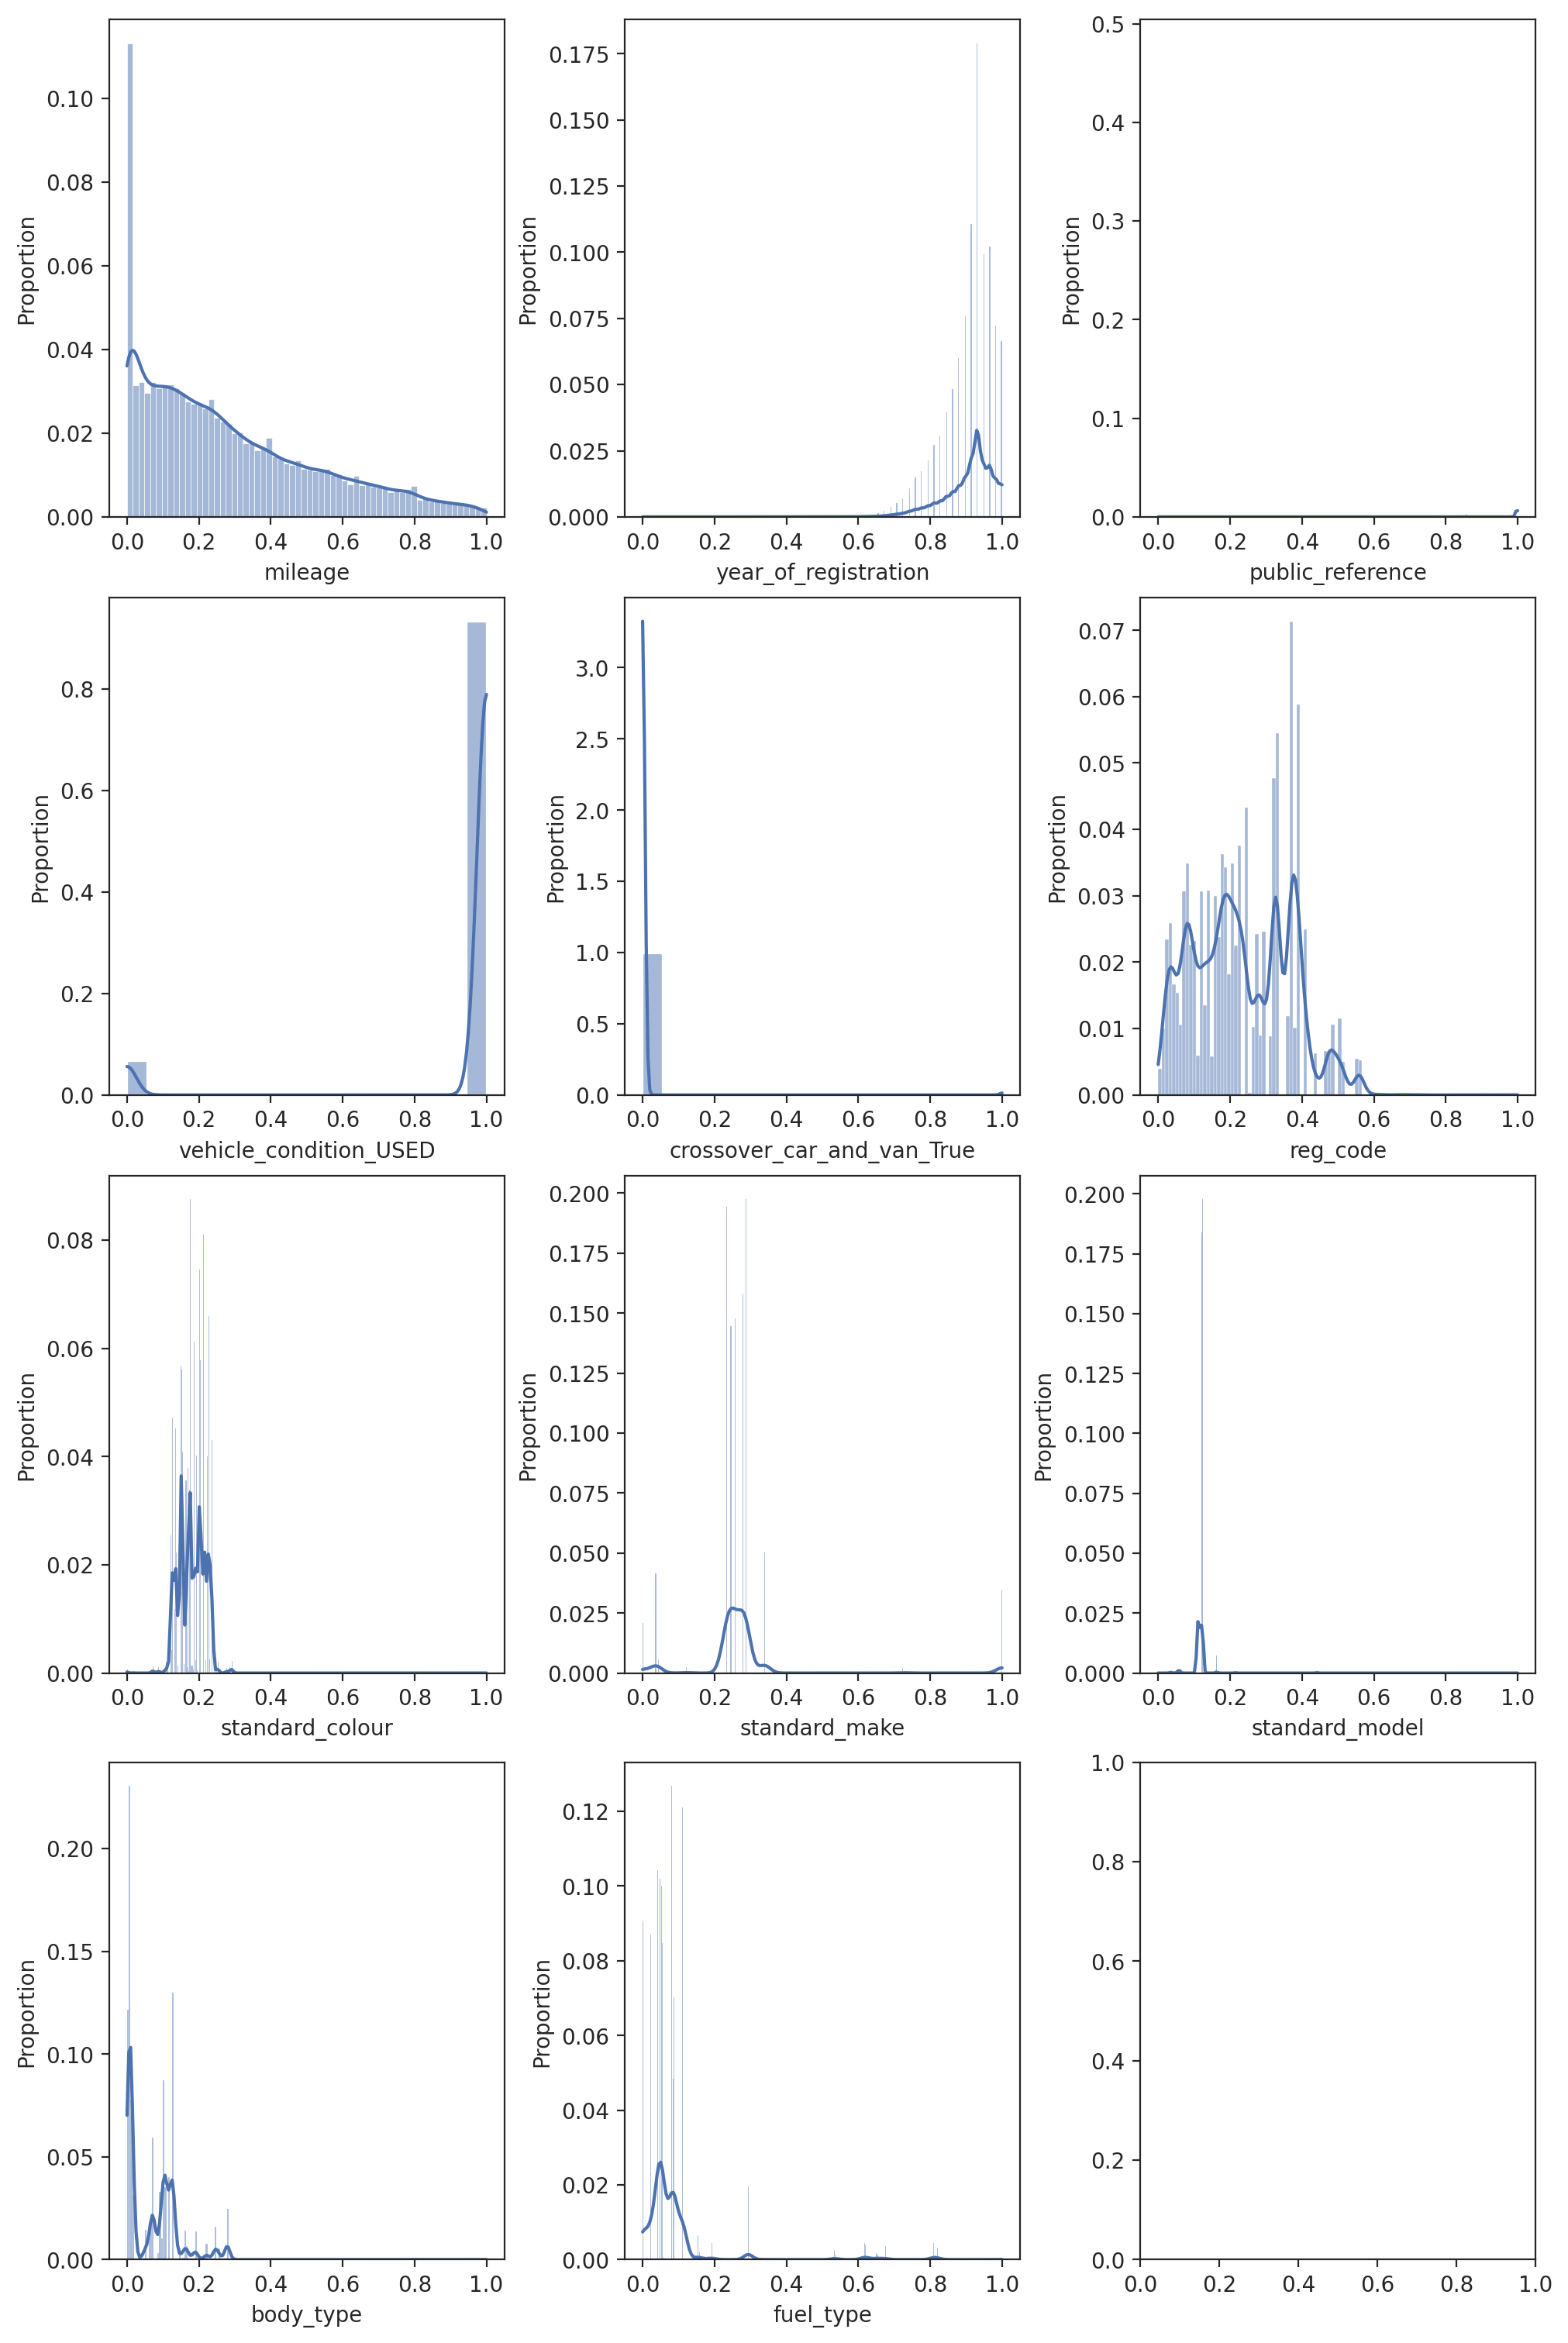

In [ ]:
cols = X_pro.columns
fig, axs = plt.subplots(4, 3, figsize=(10, 15), constrained_layout=True)

for col, ax in zip(cols, axs.ravel()):
  sns.histplot(x=X_pro[col], stat='proportion', common_norm=False, kde=True, ax=ax)

In [ ]:
X_pro.columns

Index(['mileage', 'year_of_registration', 'public_reference',
       'vehicle_condition_USED', 'crossover_car_and_van_True', 'reg_code',
       'standard_colour', 'standard_make', 'standard_model', 'body_type',
       'fuel_type'],
      dtype='object')

<Axes: >

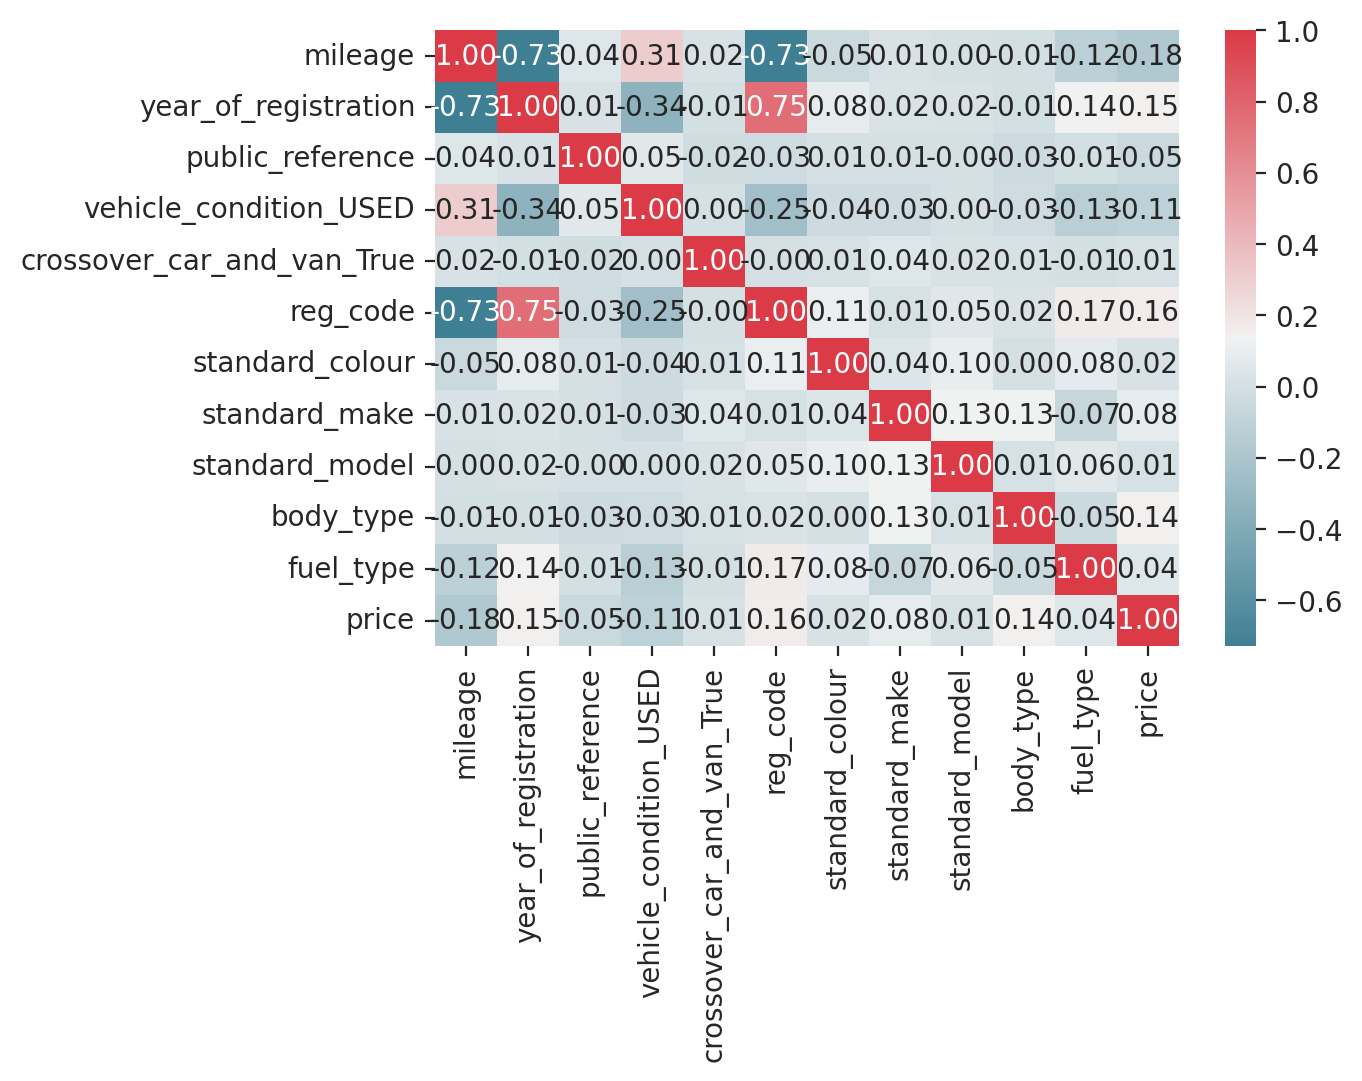

In [ ]:
price = pd.DataFrame( y.tolist()).rename(columns={0: 'price'})
trans_auto_df = pd.merge(X_pro, y, left_index=True, right_index=True)
trans_auto_df
# Display a heatmap of the dataset
sns.heatmap(trans_auto_df.corr(), annot=True, fmt=".2f", cmap=sns.diverging_palette(220, 10, as_cmap=True))

Based on domain knowledge and EDA, 8 features will be selected, the features includes:
Mileage, Year of registration, vehicle condition, reg_code, standard make, standard model, body type, fuel_type




### Selection using KBest

In [ ]:

Kbest_rf = Pipeline(
    steps=[
        ('featsel', SelectKBest(f_regression, k=10) ),
        ("lin_reg", LinearRegression())
    ]
)

In [ ]:
Kbest_rf.fit(X_train_poly, y_train)


Pipeline(steps=[('featsel',
                 SelectKBest(score_func=<function f_regression at 0x7cef51255630>)),
                ('lin_reg', LinearRegression())])

In [ ]:
# Features selected from the processed dataset
Kbest_rf['featsel'].get_feature_names_out()


array(['standard_model', 'year_of_registration standard_model',
       'public_reference standard_model',
       'vehicle_condition_USED standard_model', 'reg_code standard_model',
       'standard_colour standard_model', 'standard_make standard_model',
       'standard_model^2', 'standard_model body_type',
       'standard_model fuel_type'], dtype=object)

In [ ]:
print('the total features selected by KBest on the processed (Polynomial and interaction) dataset: ', len(Kbest_rf['featsel'].get_feature_names_out()))


the total features selected by KBest on the processed (Polynomial and interaction) dataset:  10


In [ ]:
print('Train Score: ' , Kbest_rf.score(X_train_poly, y_train))
print('Validation Score: ' , Kbest_rf.score(X_valid_poly, y_valid))

Train Score:  0.9621124605525773
Validation Score:  0.7752088561539303


In [ ]:
Kbest_rf.fit(X_train_pro, y_train )


Pipeline(steps=[('featsel',
                 SelectKBest(score_func=<function f_regression at 0x7cef51255630>)),
                ('lin_reg', LinearRegression())])

In [ ]:
#The features selected from the original dataset
Kbest_rf['featsel'].get_feature_names_out()

array(['mileage', 'year_of_registration', 'public_reference',
       'vehicle_condition_USED', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'body_type', 'fuel_type'],
      dtype=object)

In [ ]:
print('the total features selected by KBest on the original dataset features: ', len(Kbest_rf['featsel'].get_feature_names_out()))

the total features selected by KBest on the original dataset features:  10


In [ ]:
print('Train Score: ' , Kbest_rf.score(X_train_pro, y_train))
print('Validation Score: ' , Kbest_rf.score(X_valid_pro, y_valid))

Train Score:  0.9598817885788097
Validation Score:  0.7796603109462994


In [ ]:
Kbest_rf['featsel'].fit_transform(X_train_poly, y_train)

standard_model  year_of_registration standard_model  \
338157        0.016857                             0.011335   
340243        0.029353                             0.025811   
145888        0.007860                             0.006776   
243936        0.010058                             0.008497   
218871        0.016186                             0.015070   
...                ...                                  ...   
317944        0.009460                             0.009134   
123376        0.014380                             0.011653   
301291        0.011127                             0.009784   
342031        0.011127                             0.010168   
316997        0.010482                             0.009217   

        public_reference standard_model  \
338157                         0.016824   
340243                         0.029179   
145888                         0.007829   
243936                         0.010038   
218871                         0.016154   
...                                 ...   
317944                         0.009442   
123376                         0.014380   
301291                         0.011105   
342031                         0.011083   
316997                         0.010378   

        vehicle_condition_USED standard_model  reg_code standard_model  \
338157                               0.016857                 0.000874   
340243                               0.029353                 0.003927   
145888                               0.007860                 0.000807   
243936                               0.010058                 0.000839   
218871                               0.016186                 0.003793   
...                                       ...                      ...   
317944                               0.009460                 0.003409   
123376                               0.014380                 0.000534   
301291                               0.011127                 0.001550   
342031                               0.011127                 0.001931   
316997                               0.010482                 0.001402   

        standard_colour standard_model  standard_make standard_model  \
338157                        0.007047                      0.001024   
340243                        0.012727                      0.003398   
145888                        0.003408                      0.000496   
243936                        0.005757                      0.000622   
218871                        0.012966                      0.001874   
...                                ...                           ...   
317944                        0.007455                      0.000575   
123376                        0.011520                      0.000870   
301291                        0.008914                      0.000673   
342031                        0.008914                      0.000673   
316997                        0.005999                      0.000436   

        standard_model^2  standard_model body_type  standard_model fuel_type  
338157          0.000284                  0.004807                  0.002045  
340243          0.000862                  0.008370                  0.003562  
145888          0.000062                  0.000058                  0.000954  
243936          0.000101                  0.000074                  0.001220  
218871          0.000262                  0.000119                  0.002029  
...                  ...                       ...                       ...  
317944          0.000089                  0.000070                  0.001148  
123376          0.000207                  0.004100                  0.001803  
301291          0.000124                  0.003173                  0.001395  
342031          0.000124                  0.003173                  0.001395  
316997          0.000110                  0.000267                  0.001314  

[61768 rows x 10 columns]

### Recursive Feature Elimination

RFECV make selection based on feature importance or coef, i will use linear regression as a the estimator which has a coef_ attribute

In [ ]:

rf_sel = Pipeline(
    steps=[
        ('featsel', RFECV(LinearRegression(), step=1, cv=5) ),
        ("lin", LinearRegression())
    ]
)

In [ ]:
rf_selector_cv = rf_sel['featsel']

In [ ]:
rf_selector_cv.fit(X_train_poly, y_train)

RFECV(cv=5, estimator=LinearRegression())

In [ ]:
X_train_RFECV = rf_selector_cv.transform(X_train_poly)
X_valid_RFECV = rf_selector_cv.transform(X_valid_poly)
X_test_RFECV = rf_selector_cv.transform(X_test_poly)

In [ ]:
rf_selector_cv.get_feature_names_out()

array(['mileage', 'year_of_registration', 'standard_model', 'fuel_type',
       'mileage vehicle_condition_USED', 'mileage standard_model',
       'year_of_registration^2', 'year_of_registration fuel_type',
       'public_reference standard_model', 'reg_code standard_make',
       'standard_make^2', 'standard_make standard_model',
       'standard_make body_type', 'standard_model body_type',
       'standard_model fuel_type'], dtype=object)

In [ ]:

print('the total features selected on polynomial and interation features by RFECV are: ', len(rf_selector_cv.get_feature_names_out()))

the total features selected on polynomial and interation features by RFECV are:  15


In [ ]:
# The mean test scores value after the proces is 66 which is the same as the number of columns
n_scr = len(rf_selector_cv.cv_results_['mean_test_score'])
n_scr

77

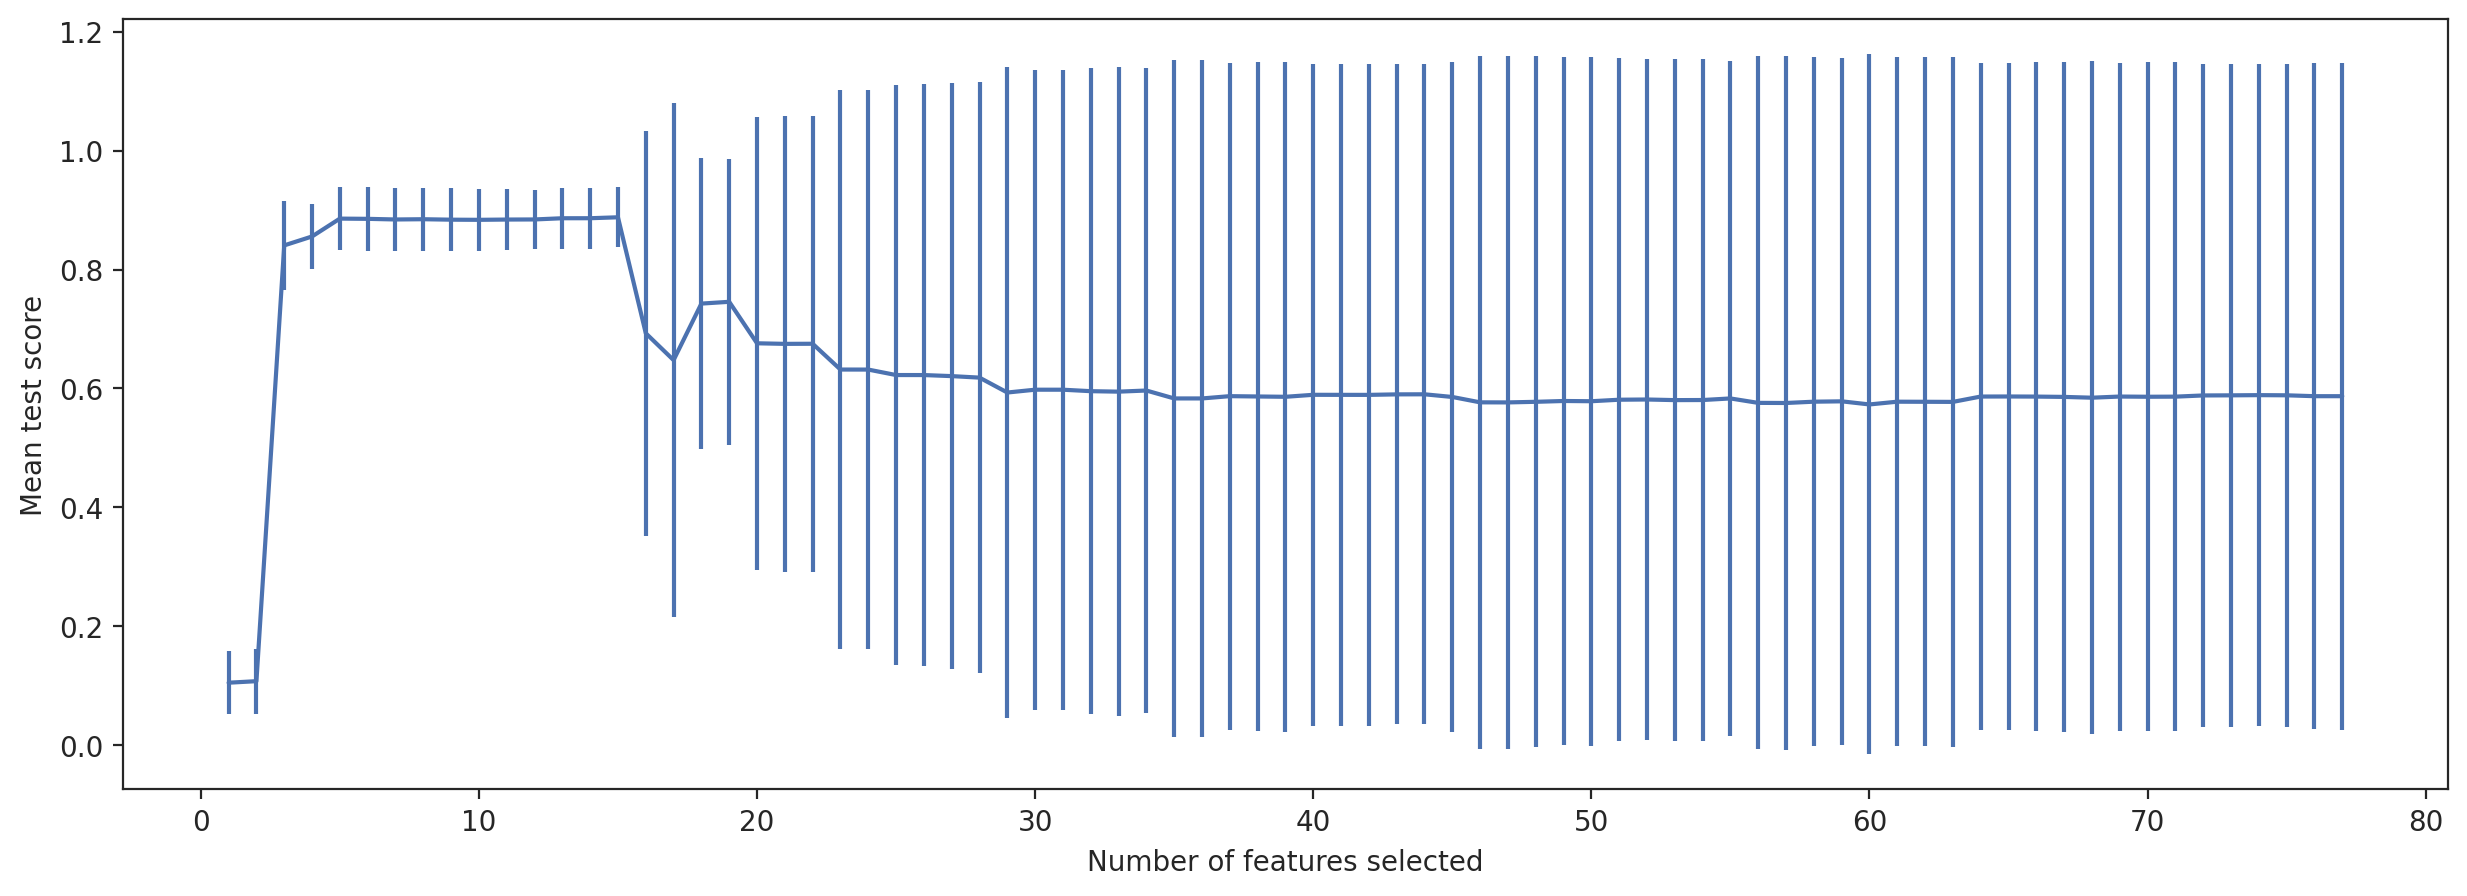

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.errorbar(
    range(1, n_scr+1),
    rf_selector_cv.cv_results_["mean_test_score"],
    yerr=rf_selector_cv.cv_results_["std_test_score"],
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

# From around 9 features, the score stop increasing

In [ ]:
np.flip(rf_selector_cv.cv_results_["mean_test_score"])

array([0.58706277, 0.58706963, 0.58855925, 0.58882854, 0.58848762,
       0.58830961, 0.58630052, 0.58612131, 0.58647283, 0.58452406,
       0.58586172, 0.58639453, 0.58656875, 0.58646696, 0.57747659,
       0.57765324, 0.57780737, 0.57318549, 0.5784244 , 0.57781118,
       0.57563378, 0.57581626, 0.58327667, 0.58060963, 0.58047066,
       0.5815049 , 0.58112906, 0.57859603, 0.5789892 , 0.57760708,
       0.57660257, 0.57672606, 0.58574976, 0.59025321, 0.59012287,
       0.58926236, 0.589312  , 0.5893919 , 0.58604936, 0.58658098,
       0.58712339, 0.58327903, 0.58327946, 0.59659278, 0.59468913,
       0.59549618, 0.59795688, 0.59797916, 0.5932314 , 0.6182814 ,
       0.62082228, 0.62259067, 0.62263341, 0.63181681, 0.63186628,
       0.67522418, 0.67505492, 0.67601087, 0.74576486, 0.74276508,
       0.6477269 , 0.69291271, 0.88787944, 0.88629833, 0.88627156,
       0.88423857, 0.88407437, 0.88360089, 0.88385158, 0.88462695,
       0.88420055, 0.8852643 , 0.88565328, 0.8556123 , 0.84063

In [ ]:
rf_selector_cv.score(X_train_poly, y_train), rf_selector_cv.score(X_valid_poly, y_valid)

(0.9701428807897281, 0.8325849973135301)

Recursive feature selection on the original data feature

In [ ]:
rf_selector_rl = rf_sel['featsel']

In [ ]:
rf_selector_rl.fit(X_train_pro, y_train)

RFECV(cv=5, estimator=LinearRegression())

In [ ]:
rf_selector_rl.get_feature_names_out()

array(['mileage', 'year_of_registration', 'public_reference',
       'vehicle_condition_USED', 'crossover_car_and_van_True', 'reg_code',
       'standard_colour', 'standard_make', 'standard_model', 'body_type',
       'fuel_type'], dtype=object)

In [ ]:
print('the total features selected on original features by RFECV are: ', len(rf_selector_rl.get_feature_names_out()))

the total features selected on original features by RFECV are:  11


In [ ]:
np.flip(rf_selector_rl.cv_results_["mean_test_score"])

# The mean test score is lower on the original dataset

array([0.85160179, 0.85160006, 0.85157704, 0.851288  , 0.85109244,
       0.85105458, 0.84665373, 0.84063172, 0.84001838, 0.82987099,
       0.78688169])

In [ ]:
rf_selector_rl.score(X_train_pro, y_train), rf_selector_rl.score(X_valid_pro, y_valid)

# a slight lower validation score

(0.959884764222778, 0.7797179394655547)

### Sequential Feature selection

selection is based on the cross-validation score of an estimator i.e linear regression

In [ ]:
sfs_rf = Pipeline(
    steps=[
        ('feat_sel', SequentialFeatureSelector(LinearRegression(), n_features_to_select='auto',
                                               direction='forward', tol=0.01, cv=5)),
        ("lin_reg", LinearRegression())
    ]
)

In [ ]:
sfs_rf['feat_sel'].fit(X_train_poly, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), tol=0.01)

In [ ]:
sfs_rf['feat_sel'].get_feature_names_out()

array(['standard_model', 'mileage standard_model',
       'reg_code standard_make'], dtype=object)

In [ ]:
# sfs_rf.score(X_train_poly, y_train), sfs_rf.score(poly_reg['poly'].fit_transform(X_valid), y_valid)

selection of features from the original dataset features

In [ ]:
sfs_rf['feat_sel'].fit(X_train_pro, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), tol=0.01)

In [ ]:
sfs_rf['feat_sel'].get_feature_names_out()

array(['mileage', 'standard_model'], dtype=object)

### Dimentionality Reduction

In [ ]:
pca = PCA(random_state=42)
pca.fit(X_train_poly)

PCA(random_state=42)

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

Cumulative Variance Ratio  Explained Variance Ratio
0                    0.282816                  0.282816
1                    0.519379                  0.236562
2                    0.685810                  0.166431
3                    0.787605                  0.101795
4                    0.870462                  0.082857
5                    0.918863                  0.048401
6                    0.946761                  0.027899
7                    0.961797                  0.015036
8                    0.975045                  0.013248
9                    0.982276                  0.007231
10                   0.986322                  0.004045
11                   0.988616                  0.002294
12                   0.990309                  0.001693
13                   0.991950                  0.001641
14                   0.993301                  0.001351
15                   0.994112                  0.000811
16                   0.994804                  0.000693
17                   0.995416                  0.000612
18                   0.995981                  0.000565
19                   0.996397                  0.000416
20                   0.996808                  0.000411
21                   0.997136                  0.000329
22                   0.997448                  0.000312
23                   0.997735                  0.000286
24                   0.997943                  0.000208

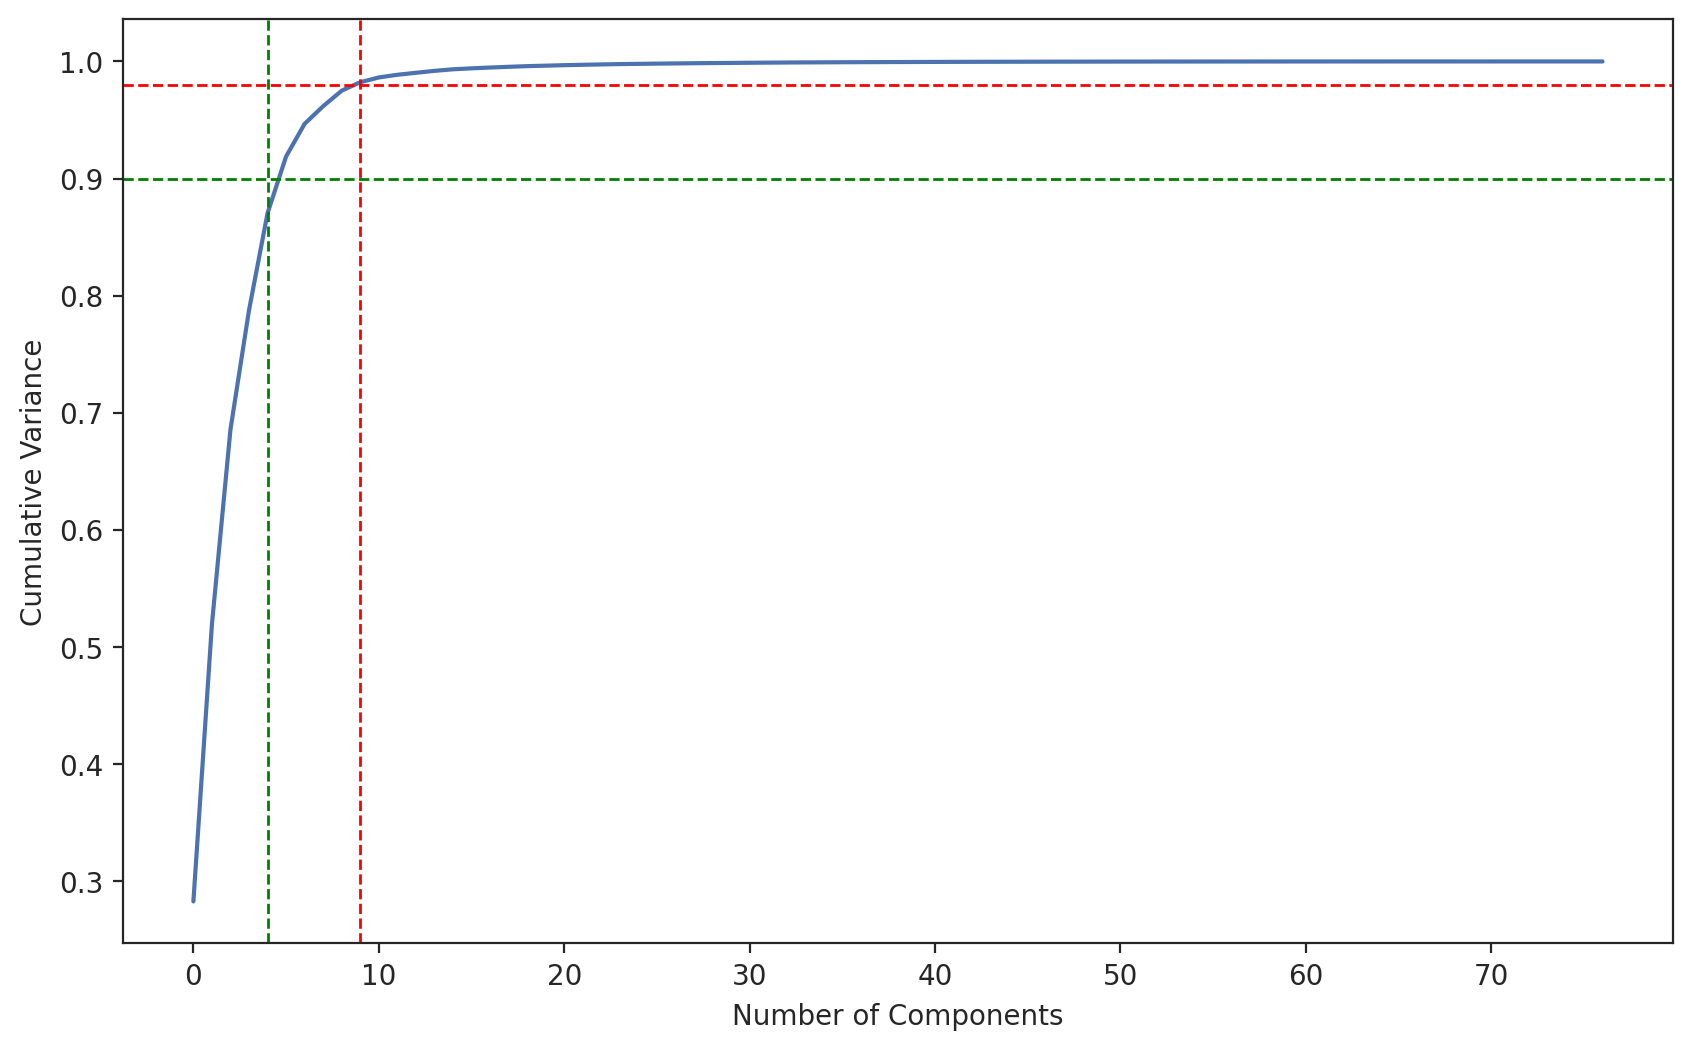

In [ ]:
# Plotting the data
fig = plt.figure(figsize = (10,6))
plt.plot(cvr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
# Draw lines to illustrate vertical and horizontal limits
plt.axhline(y = 0.98, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x = 9, color='red', linestyle='dashed', linewidth=1)
plt.axhline(y = 0.9, color='green', linestyle='dashed', linewidth=1)
plt.axvline(x = 4, color='green', linestyle='dashed', linewidth=1)

In [ ]:
pca_7 = Pipeline(
    steps=[
        ('pca', PCA(n_components=9) ),
        ('lin_reg', LinearRegression() )
    ]
)

In [ ]:
# PCA with 14 components

X_pca = pca_7['pca'].fit(X_train_poly)
X_pca = pca_7['pca'].transform(X_train_poly)

In [ ]:
X_pca

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
338157 -1.013347  0.011761  0.690633  0.062807  0.463972  0.038491  0.060744   
340243 -0.125725  0.005349  0.054936  0.141361  0.510174 -0.058637 -0.177568   
145888 -0.089450 -0.017560  0.094923  0.577190  0.138474 -0.066167 -0.259381   
243936 -0.755022 -0.000577  0.391533  0.282287 -0.151450  0.019517  0.050601   
218871 -0.086692 -0.000326 -0.219685  0.002836 -0.504127 -0.063187 -0.037482   
...          ...       ...       ...       ...       ...       ...       ...   
317944  0.237087 -0.009735 -0.433958  0.066761 -0.478509 -0.070304  0.098570   
123376 -0.596124  0.016459  0.137476 -0.443272 -0.130391 -0.087918 -0.258921   
301291 -0.884956  0.022624  0.237897 -0.542387 -0.188821  0.015167  0.194147   
342031 -0.400223  0.014020 -0.058659 -0.462777 -0.146105 -0.052684  0.000516   
316997 -0.317071 -0.007785  0.118841  0.324914 -0.093404 -0.029617 -0.085731   

            pca7      pca8  
338157 -0.018211 -0.042586  
340243 -0.004506 -0.000047  
145888 -0.001174 -0.009348  
243936 -0.013417 -0.000928  
218871 -0.001341  0.079075  
...          ...       ...  
317944 -0.011601 -0.018846  
123376 -0.021319 -0.131814  
301291 -0.033528 -0.125145  
342031 -0.027545 -0.140050  
316997 -0.012398 -0.056851  

[61768 rows x 9 columns]

In [ ]:
pca_7['pca'].components_

array([[-3.50191013e-01,  8.65470693e-02, -3.65358253e-03,
        -2.63700136e-01, -1.51683779e-03,  1.68091607e-01,
         7.86223529e-03,  8.53123827e-04,  6.87316513e-03,
         9.52398113e-03,  3.66836002e-02, -2.54846717e-01,
        -2.85291153e-01, -3.47911957e-01, -3.50203326e-01,
        -2.33522977e-03, -2.61582151e-02, -2.21251377e-01,
        -3.26657971e-02, -5.60741695e-03, -5.84428968e-02,
        -4.51130605e-02,  1.53880699e-01,  8.23179244e-02,
        -1.77153066e-01, -9.08818313e-04,  1.71467149e-01,
         6.20829463e-02,  8.97919575e-03,  8.13079603e-03,
         2.42521725e-02,  4.73230882e-02, -6.82797915e-03,
        -2.63347042e-01, -1.56401571e-03,  1.65616451e-01,
         5.42374576e-03,  4.85694628e-04,  6.69715153e-03,
         8.82335451e-03,  3.58264038e-02, -2.63700136e-01,
        -2.47921851e-03,  6.82452668e-02, -1.65237152e-01,
        -2.36011839e-02,  3.08723501e-05, -4.19579247e-02,
        -2.10842414e-02, -1.51683779e-03,  2.95921705e-0

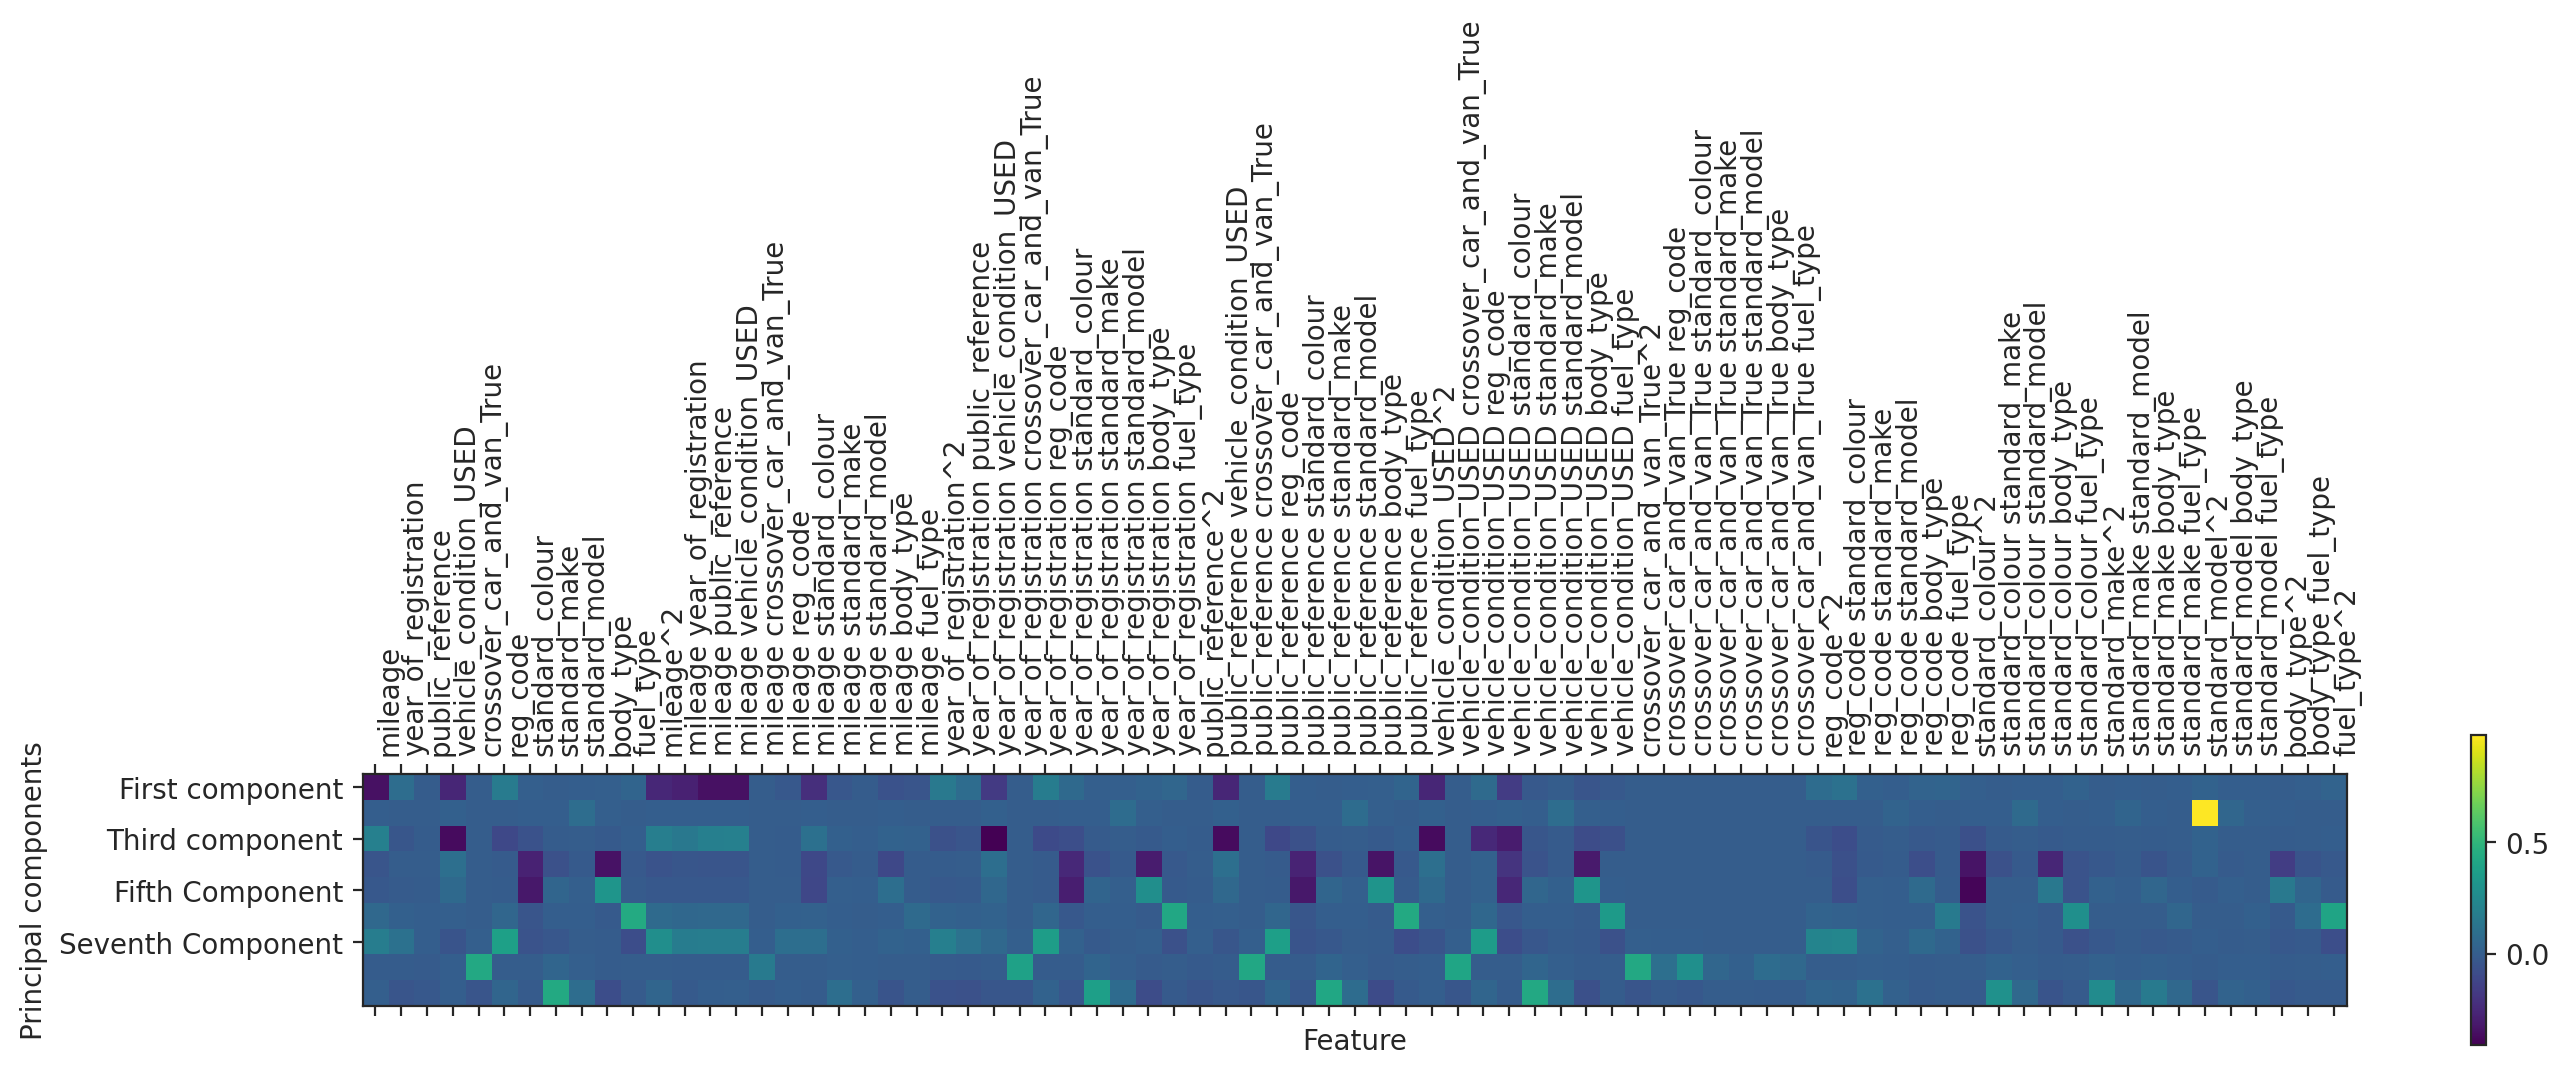

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca_7['pca'].components_, cmap='viridis')
plt.yticks([0, 2, 4, 6], ["First component", "Third component", "Fifth Component", "Seventh Component"])
plt.colorbar()
plt.xticks(range(len(X_train_poly.columns)),
           X_train_poly.columns, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
# viewing the fourth component
pca_7['pca'].components_[3]

array([-4.64251718e-02, -1.42023261e-03,  1.06655584e-03,  9.53705698e-02,
       -2.57813643e-03, -1.31061353e-02, -2.76076494e-01, -6.57883417e-02,
       -1.73128207e-02, -3.41213892e-01, -2.41267758e-02, -5.54911664e-02,
       -3.66491886e-02, -4.60283365e-02, -4.64207543e-02, -1.51536174e-03,
       -5.81403123e-03, -1.12141173e-01, -2.11199571e-02, -4.85820866e-03,
       -1.09299357e-01, -8.53150563e-03, -5.02162346e-03, -5.67248846e-04,
        9.39503372e-02, -2.12167752e-03, -1.33779336e-02, -2.49778727e-01,
       -5.83347745e-02, -1.55346405e-02, -3.05426038e-01, -2.37822536e-02,
        1.78998769e-03,  9.53324529e-02, -2.60802797e-03, -1.28151949e-02,
       -2.73173449e-01, -6.45249860e-02, -1.70175496e-02, -3.37961859e-01,
       -2.38352243e-02,  9.53705698e-02, -2.18836263e-03,  2.30045870e-02,
       -2.00231688e-01, -5.46392414e-02, -1.37838226e-02, -3.09303251e-01,
        3.93406172e-04, -2.57813643e-03, -3.79164837e-04, -2.78827477e-03,
       -4.28393413e-04, -

## **Model Building**

In [ ]:
class Model:
    def __init__(self, model, X_train, y_train, X_valid, y_valid):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_valid = X_valid
        self.y_valid = y_valid
        self.trained_model = self.create_model()

    def create_model(self):
        return self.model.fit(self.X_train, self.y_train)

    def score(self):
        train_score = self.trained_model.score(self.X_train, self.y_train)
        valid_score = self.trained_model.score(self.X_valid, self.y_valid)
        return train_score, valid_score

    def MAE(self):
        train_error = mean_absolute_error(self.y_train, self.trained_model.predict(self.X_train))
        valid_error = mean_absolute_error(self.y_valid, self.trained_model.predict(self.X_valid))
        return train_error, valid_error



### Linear Model

KBest selection + Linear regression

In [ ]:
lin_kBest = Model(Kbest_rf, X_train_poly, y_train, X_valid_poly, y_valid)

# Fit the model on the training data
lin_kBest.trained_model

Pipeline(steps=[('featsel',
                 SelectKBest(score_func=<function f_regression at 0x7cef51255630>)),
                ('lin_reg', LinearRegression())])

In [ ]:

# Get the scores
train_score, valid_score = lin_kBest.score()

# get the errors
train_error, valid_error = lin_kBest.MAE()

print("------------KBest + Lin on Polynomial and intereaction features-------------------")

print("Training Score (KBest):", train_score)
print("Validation Score (KBest):", valid_score)

print("---------------------------------------------------")

print("MAE Train (KBest):", train_error)
print("MAE Validaton (KBest):", valid_error)


------------KBest + Lin on Polynomial and intereaction features-------------------
Training Score (KBest): 0.9621124605525773
Validation Score (KBest): 0.7752088561539303
---------------------------------------------------
MAE Train (KBest): 4069.2843400134707
MAE Validaton (KBest): 4160.8285348046265


In [ ]:
lin_kBest = Model(Kbest_rf, X_train_pro, y_train, X_valid_pro, y_valid)

# Fit the model on the training data
lin_kBest.trained_model

# Get the scores
train_score, valid_score = lin_kBest.score()

# get the errors
train_error, valid_error = lin_kBest.MAE()

print("------------KBest + Lin on Original Data features-------------------")

print("Training Score (KBest):", train_score)
print("Validation Score (KBest):", valid_score)

print("---------------------------------------------------")

print("MAE Train (KBest):", train_error)
print("MAE Validaton (KBest):", valid_error)

------------KBest + Lin on Original Data features-------------------
Training Score (KBest): 0.9598817885788097
Validation Score (KBest): 0.7796603109462994
---------------------------------------------------
MAE Train (KBest): 4337.513290276392
MAE Validaton (KBest): 4409.37336731767


Recursive Feature Elimination + Linear Regression

In [ ]:
lin_rgr_RFECV = Model(rf_sel, X_train_poly, y_train, X_valid_poly, y_valid)

# Fit the model on the training data
lin_rgr_RFECV.trained_model

Pipeline(steps=[('featsel', RFECV(cv=5, estimator=LinearRegression())),
                ('lin', LinearRegression())])

In [ ]:

# Get the scores
train_score, valid_score = lin_rgr_RFECV.score()

# get the errors
train_error, valid_error = lin_rgr_RFECV.MAE()

print("------------RFECV + Lin on Polynomial and Interaction Dataset features-------------------")

print("Training Score (RFECV):", train_score)
print("Validation Score (RFECV):", valid_score)

print("---------------------------------------------------")

print("MAE Train (RFECV):", train_error)
print("MAE Validaton (RFECV):", valid_error)


------------RFECV + Lin on Polynomial and Interaction Dataset features-------------------
Training Score (RFECV): 0.9701428807897281
Validation Score (RFECV): 0.8325849973135119
---------------------------------------------------
MAE Train (RFECV): 3365.0491343559493
MAE Validaton (RFECV): 3431.807344580066


In [ ]:
lin_RFECV = Model(rf_sel, X_train_pro, y_train, X_valid_pro, y_valid)

# Fit the model on the training data
lin_RFECV.trained_model

# Get the scores
train_score, valid_score = lin_RFECV.score()

# get the errors
train_error, valid_error = lin_RFECV.MAE()

print("------------RFECV + Lin on Original Data features-------------------")
print("Training Score (RFECV):", train_score)
print("Validation Score (RFECV):", valid_score)

print("---------------------------------------------------")

print("MAE Train (RFECV):", train_error)
print("MAE Validaton (RFECV):", valid_error)

------------RFECV + Lin on Original Data features-------------------
Training Score (RFECV): 0.959884764222778
Validation Score (RFECV): 0.7797179394655547
---------------------------------------------------
MAE Train (RFECV): 4337.972278114715
MAE Validaton (RFECV): 4409.958965689235


Sequential feature selection + Linear regression

In [ ]:
lin_sfs = Model(sfs_rf, X_train_poly, y_train, X_valid_poly, y_valid)

# Fit the model on the training data
lin_sfs.trained_model

Pipeline(steps=[('feat_sel',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           tol=0.01)),
                ('lin_reg', LinearRegression())])

In [ ]:
# Get the scores
train_score, valid_score = lin_sfs.score()

# get the errors
train_error, valid_error = lin_sfs.MAE()

print("------------Sequential FS + Lin on Polynomial and interaction features-------------------")

print("Training Score (SFS):", train_score)
print("Validation Score (SFS):", valid_score)

print("---------------------------------------------------")

print("MAE Train (SFS):", train_error)
print("MAE Validaton (SFS):", valid_error)

------------Sequential FS + Lin on Polynomial and interaction features-------------------
Training Score (SFS): 0.9681603163412389
Validation Score (SFS): 0.8160767069474395
---------------------------------------------------
MAE Train (SFS): 3637.040157001891
MAE Validaton (SFS): 3728.2632052412064


In [ ]:
lin_sfs = Model(sfs_rf, X_train_pro, y_train, X_valid_pro, y_valid)

# Fit the model on the training data
lin_sfs.trained_model

# Get the scores
train_score, valid_score = lin_sfs.score()

# get the errors
train_error, valid_error = lin_sfs.MAE()

print("------------Sequential + Lin on Original Data features-------------------")

print("Training Score (SFS):", train_score)
print("Validation Score (SFS):", valid_score)

print("---------------------------------------------------")

print("MAE Train (SFS):", train_error)
print("MAE Validaton (SFS):", valid_error)

------------Sequential + Lin on Original Data features-------------------
Training Score (SFS): 0.956535570082236
Validation Score (SFS): 0.7611669469624723
---------------------------------------------------
MAE Train (SFS): 4713.95150937745
MAE Validaton (SFS): 4803.464227471633


PCA

In [ ]:
lin_pca = Model(pca_7, X_train_poly, y_train, X_valid_poly, y_valid)

# Fit the model on the training data
lin_pca.trained_model

Pipeline(steps=[('pca', PCA(n_components=9)), ('lin_reg', LinearRegression())])

In [ ]:

# Get the scores
train_score, valid_score = lin_pca.score()

# get the errors
train_error, valid_error = lin_pca.MAE()

print("------------PCA + Lin on Polynomial and Interation features-------------------")

print("Training Score (PCA):", train_score)
print("Validation Score (PCA):", valid_score)

print("---------------------------------------------------")

print("MAE Train (PCA):", train_error)
print("MAE Validaton (PCA):", valid_error)

------------PCA + Lin on Polynomial and Interation features-------------------
Training Score (PCA): 0.9088022678564412
Validation Score (PCA): 0.6623861875492001
---------------------------------------------------
MAE Train (PCA): 5753.687565989781
MAE Validaton (PCA): 5642.355100377991


### Random Forest

Kbest and Random forest

In [ ]:
Kbest_rf_rgr = Pipeline(
    steps=[
        ('featsel', SelectKBest(f_regression, k=10) ),
         ("regr", RandomForestRegressor())

    ]
)

In [ ]:
rndf_kbest = Model(Kbest_rf_rgr, X_train_poly, y_train, X_valid_poly, y_valid)

# Fit the model on the training data
rndf_kbest.trained_model

Pipeline(steps=[('featsel',
                 SelectKBest(score_func=<function f_regression at 0x7cef51255630>)),
                ('regr', RandomForestRegressor())])

In [ ]:
# Get the scores
train_score, valid_score = rndf_kbest.score()

# get the errors
train_error, valid_error = rndf_kbest.MAE()

print("------------KBest + RandomForest on Polynomial and intereaction features-------------------")

print("Training Score (KBest):", train_score)
print("Validation Score (KBest):", valid_score)

print("---------------------------------------------------")

print("MAE Train (KBest):", train_error)
print("MAE Validaton (KBest):", valid_error)


------------KBest + RandomForest on Polynomial and intereaction features-------------------
Training Score (KBest): 0.8912949233927631
Validation Score (KBest): 0.8553045703126301
---------------------------------------------------
MAE Train (KBest): 1204.8211995480658
MAE Validaton (KBest): 2531.618930976495


In [ ]:
rndf_kbest = Model(Kbest_rf_rgr, X_train_pro, y_train, X_valid_pro, y_valid)

# Fit the model on the training data
rndf_kbest.trained_model

# Get the scores
train_score, valid_score = rndf_kbest.score()

# get the errors
train_error, valid_error = rndf_kbest.MAE()

print("------------KBest + RandomForest on Original Data features-------------------")

print("Training Score (KBest):", train_score)
print("Validation Score (KBest):", valid_score)

print("---------------------------------------------------")

print("MAE Train (KBest):", train_error)
print("MAE Validaton (KBest):", valid_error)

------------KBest + RandomForest on Original Data features-------------------
Training Score (KBest): 0.9438663955878073
Validation Score (KBest): 0.8908625198954981
---------------------------------------------------
MAE Train (KBest): 850.19201795652
MAE Validaton (KBest): 2212.5604564182518


Recursive Feature Elimination and Random forest

In [ ]:

rfe_rgr = Pipeline(
    steps=[
        ('featsel', RFECV(LinearRegression(), step=1, cv=5) ),
        ("regr", RandomForestRegressor())
    ]
)

rndf_rfecv = Model(rfe_rgr, X_train_poly, y_train, X_valid_poly, y_valid)

# Fit the model on the training data
rndf_rfecv.trained_model

Pipeline(steps=[('featsel', RFECV(cv=5, estimator=LinearRegression())),
                ('regr', RandomForestRegressor())])

In [ ]:

# Get the scores
train_score, valid_score = rndf_rfecv.score()

# get the errors
train_error, valid_error = rndf_rfecv.MAE()

print("------------RFECV + Random forest on Polynomial and Interaction Dataset features-------------------")

print("Training Score (RFECV):", train_score)
print("Validation Score (RFECV):", valid_score)

print("---------------------------------------------------")

print("MAE Train (RFECV):", train_error)
print("MAE Validaton (RFECV):", valid_error)


------------RFECV + Random forest on Polynomial and Interaction Dataset features-------------------
Training Score (RFECV): 0.8944896147380706
Validation Score (RFECV): 0.8911901510983793
---------------------------------------------------
MAE Train (RFECV): 896.8460529919289
MAE Validaton (RFECV): 2203.607097429511


In [ ]:
rndf_rfe = Model(rfe_rgr, X_train_pro, y_train, X_valid_pro, y_valid)

# Fit the model on the training data
rndf_rfe.trained_model

# Get the scores
train_score, valid_score = rndf_rfe.score()

# get the errors
train_error, valid_error = rndf_rfe.MAE()

print("------------RFECV + random forest on Original Dataset features-------------------")

print("Training Score (RFECV):", train_score)
print("Validation Score (RFECV):", valid_score)

print("---------------------------------------------------")

print("MAE Train (RFECV):", train_error)
print("MAE Validaton (RFECV):", valid_error)

------------RFECV + random forest on Original Dataset features-------------------
Training Score (RFECV): 0.8970447308060708
Validation Score (RFECV): 0.887102501949054
---------------------------------------------------
MAE Train (RFECV): 867.2513085633074
MAE Validaton (RFECV): 2231.45046298997


In [ ]:
# print('Train Score (Recursive FE): ' , rfe_rgr.score(X_train_poly, y_train)),
# print('Validation Score (Recursive FE): ' , rfe_rgr.score(poly_reg['poly'].transform(X_valid), y_valid))
# print('----------------------')
# print('MAE Train (Recursive FE):', mean_absolute_error(y_train, rfe_rgr.predict(X_train_poly)) ),
# print('MAE Validation (Recursive FE):', mean_absolute_error(y_valid, rfe_rgr.predict(poly_reg['poly'].transform(X_valid)) ))


Sequential Feature selection and random forest

In [ ]:
sfs_rgr = Pipeline(
    steps=[
        ('feat_sel', SequentialFeatureSelector(LinearRegression(), n_features_to_select='auto',
                                               direction='forward', tol=0.01)),

        # ("regr", RandomForestRegressor())
        ("regr", RandomForestRegressor())
    ]
)

# sfs_rgr.fit(X_train_poly, y_train)

rndf_sfs = Model(sfs_rgr, X_train_poly, y_train, X_valid_poly, y_valid)

# Fit the model on the training data
rndf_sfs.trained_model

Pipeline(steps=[('feat_sel',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           tol=0.01)),
                ('regr', RandomForestRegressor())])

In [ ]:

# Get the scores
train_score, valid_score = rndf_sfs.score()

# get the errors
train_error, valid_error = rndf_sfs.MAE()

print("------------Sequential FS + Random forest on Polynomial and Interaction Dataset features-------------------")

print("Training Score (SFS):", train_score)
print("Validation Score (SFS):", valid_score)

print("---------------------------------------------------")

print("MAE Train (SFS):", train_error)
print("MAE Validaton (SFS):", valid_error)


------------Sequential FS + Random forest on Polynomial and Interaction Dataset features-------------------
Training Score (SFS): 0.9110469988183312
Validation Score (SFS): 0.8747431187878721
---------------------------------------------------
MAE Train (SFS): 1091.0309588272655
MAE Validaton (SFS): 2561.9658324446136


In [ ]:
rndf_sfs = Model(sfs_rgr, X_train_pro, y_train, X_valid_pro, y_valid)

# Fit the model on the training data
rndf_sfs.trained_model

# Get the scores
train_score, valid_score = rndf_sfs.score()

# get the errors
train_error, valid_error = rndf_sfs.MAE()

print("------------Sequential FS + Random forest on original Dataset features-------------------")

print("Training Score (SFS):", train_score)
print("Validation Score (SFS):", valid_score)

print("---------------------------------------------------")

print("MAE Train (SFS):", train_error)
print("MAE Validaton (SFS):", valid_error)

------------Sequential FS + Random forest on original Dataset features-------------------
Training Score (SFS): 0.9009534954952225
Validation Score (SFS): 0.8449790313031429
---------------------------------------------------
MAE Train (SFS): 1497.1023907133883
MAE Validaton (SFS): 3295.2504387274257


In [ ]:
# print('Train Score (Sequential FS): ' , sfs_rgr.score(X_train_poly, y_train)),
# print('Validation Score (Sequential FS): ' , sfs_rgr.score(poly_reg['poly'].transform(X_valid), y_valid))
# print('----------------------')
# print('MAE Train (Sequential FS):', mean_absolute_error(y_train, sfs_rgr.predict(X_train_poly)) ),
# print('MAE Validation (Sequential FS):', mean_absolute_error(y_valid, sfs_rgr.predict(poly_reg['poly'].transform(X_valid)) ))


PCA and Random Forest

In [ ]:
pca_rf = Pipeline(
    steps=[
        ('pca', PCA(n_components=9) ),
        ("regr", RandomForestRegressor()) #using the default configguration
    ]
)

In [ ]:
pca_rf.fit(X_train_poly, y_train)

Pipeline(steps=[('pca', PCA(n_components=9)),
                ('regr', RandomForestRegressor())])

In [ ]:
print('Train Score (PCA): ' , pca_rf.score(X_train_poly, y_train)),
print('Validation Score (PCA): ' , pca_rf.score(X_valid_poly, y_valid))
print('----------------------')
print('MAE Train (KBest):', mean_absolute_error(y_train, pca_rf.predict(X_train_poly)) ),
print('MAE Validation (KBest):', mean_absolute_error(y_valid, pca_rf.predict(X_valid_poly) ))


Train Score (PCA):  0.8658372134471486
Validation Score (PCA):  0.857952698448485
----------------------
MAE Train (KBest): 1144.1534613003175
MAE Validation (KBest): 2892.9988254358627


#### Grid Search on Random Forest (RFECV)

In [ ]:
def grid_search():
    param_grid = {
        'max_depth': [30, 40],
        'min_samples_leaf': [10, 12],
        'min_samples_split': [2, 4],
        'n_estimators': [200, 400]
    }

    grd_rf = GridSearchCV(rfe_rgr['regr'], param_grid, return_train_score=True, cv=2)
    grd_rf_res = grd_rf.fit(X_train_RFECV, y_train)

    return grd_rf_res

# Call the function to perform grid search
grd_rf_res = grid_search()


In [ ]:
grd_df = pd.DataFrame(grd_rf_res.cv_results_)
grd_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
grd_df[ [
    'params', 'param_min_samples_leaf',
    'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
] ].sort_values('rank_test_score')

params param_min_samples_leaf  \
13  {'max_depth': 40, 'min_samples_leaf': 12, 'min...                     12   
1   {'max_depth': 30, 'min_samples_leaf': 10, 'min...                     10   
5   {'max_depth': 30, 'min_samples_leaf': 12, 'min...                     12   
9   {'max_depth': 40, 'min_samples_leaf': 10, 'min...                     10   
15  {'max_depth': 40, 'min_samples_leaf': 12, 'min...                     12   
10  {'max_depth': 40, 'min_samples_leaf': 10, 'min...                     10   
7   {'max_depth': 30, 'min_samples_leaf': 12, 'min...                     12   
3   {'max_depth': 30, 'min_samples_leaf': 10, 'min...                     10   
11  {'max_depth': 40, 'min_samples_leaf': 10, 'min...                     10   
14  {'max_depth': 40, 'min_samples_leaf': 12, 'min...                     12   
6   {'max_depth': 30, 'min_samples_leaf': 12, 'min...                     12   
4   {'max_depth': 30, 'min_samples_leaf': 12, 'min...                     12   
12  {'max_depth': 40, 'min_samples_leaf': 12, 'min...                     12   
0   {'max_depth': 30, 'min_samples_leaf': 10, 'min...                     10   
8   {'max_depth': 40, 'min_samples_leaf': 10, 'min...                     10   
2   {'max_depth': 30, 'min_samples_leaf': 10, 'min...                     10   

    mean_train_score  std_train_score  mean_test_score  std_test_score  \
13          0.530105         0.300042         0.416504        0.245536   
1           0.547105         0.295947         0.411892        0.235856   
5           0.530728         0.300116         0.409173        0.237352   
9           0.548509         0.295349         0.401404        0.225194   
15          0.531557         0.299019         0.400587        0.228995   
10          0.548613         0.293744         0.399300        0.222155   
7           0.530920         0.299156         0.397659        0.226129   
3           0.548151         0.294380         0.397614        0.221588   
11          0.547931         0.294566         0.395084        0.217955   
14          0.532301         0.299610         0.392895        0.219861   
6           0.531623         0.299977         0.391052        0.219253   
4           0.531190         0.299739         0.384435        0.211604   
12          0.533174         0.297323         0.383043        0.211734   
0           0.551483         0.291521         0.381157        0.203764   
8           0.550735         0.294295         0.367842        0.189435   
2           0.551485         0.290983         0.357672        0.180652   

    rank_test_score  
13                1  
1                 2  
5                 3  
9                 4  
15                5  
10                6  
7                 7  
3                 8  
11                9  
14               10  
6                11  
4                12  
12               13  
0                14  
8                15  
2                16

In [ ]:
grd_rf_res.best_params_


{'max_depth': 40,
 'min_samples_leaf': 12,
 'min_samples_split': 2,
 'n_estimators': 400}

There are more hyperparameters needed for the grid search but it is computationally expensive to execute. taking a longer time to execute

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def random_search():
  """
  Performs RandomizedSearchCV on the provided estimator and parameter grid.

  Returns:
      RandomizedSearchCV object containing the best model and search results.
  """

  param_grid = {
      'max_depth': [5, 15,25, 30, 35],
      'min_samples_leaf': [6, 8,10, 12],
      'min_samples_split': [2, 4, 6],
      'n_estimators': [100, 200, 400]
  }

  # Set random_state for reproducibility (optional)
  random_state = 42  # You can change this value

  # Create the RandomizedSearchCV object
  random_search_cv = RandomizedSearchCV(rfe_rgr['regr'], param_grid,
                                         return_train_score=True, cv=5,
                                         random_state=random_state)

  # Fit the model with randomized search
  random_search_cv.fit(X_train_RFECV, y_train)

  return random_search_cv

# Call the function to perform randomized search
random_search_res = random_search()


In [ ]:
result = pd.DataFrame(random_search_res.cv_results_)

In [ ]:
result[ [
    'params', 'param_min_samples_leaf',
    'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
] ].sort_values('rank_test_score')

params param_min_samples_leaf  \
8  {'n_estimators': 400, 'min_samples_split': 4, ...                      6   
9  {'n_estimators': 200, 'min_samples_split': 2, ...                      8   
3  {'n_estimators': 100, 'min_samples_split': 6, ...                      6   
2  {'n_estimators': 100, 'min_samples_split': 2, ...                      8   
4  {'n_estimators': 200, 'min_samples_split': 2, ...                      6   
7  {'n_estimators': 400, 'min_samples_split': 4, ...                     12   
1  {'n_estimators': 100, 'min_samples_split': 6, ...                      6   
6  {'n_estimators': 100, 'min_samples_split': 6, ...                     10   
0  {'n_estimators': 200, 'min_samples_split': 2, ...                     10   
5  {'n_estimators': 100, 'min_samples_split': 6, ...                      8   

   mean_train_score  std_train_score  mean_test_score  std_test_score  \
8          0.507807         0.206734         0.676772        0.273620   
9          0.468600         0.214940         0.675551        0.274998   
3          0.501963         0.209967         0.675239        0.278013   
2          0.469682         0.213635         0.666586        0.277020   
4          0.508742         0.207612         0.664768        0.264946   
7          0.419017         0.223118         0.659065        0.268433   
1          0.509005         0.206545         0.645225        0.286399   
6          0.414280         0.207698         0.632687        0.256156   
0          0.420565         0.203634         0.616165        0.249097   
5          0.445865         0.196204         0.604729        0.257233   

   rank_test_score  
8                1  
9                2  
3                3  
2                4  
4                5  
7                6  
1                7  
6                8  
0                9  
5               10

In [ ]:
random_search_res.best_params_

{'n_estimators': 400,
 'min_samples_split': 4,
 'min_samples_leaf': 6,
 'max_depth': 30}

### GradientBoostingRegressor

Kbest and GradientBoostingRegressor

In [ ]:
Kbest_gb_rgr = Pipeline(
    steps=[
        ('featsel', SelectKBest(f_regression, k=10) ),
         ("regr", GradientBoostingRegressor(max_depth=3))

    ]
)

gbr_kbest = Model(Kbest_gb_rgr, X_train_poly, y_train, X_valid_poly, y_valid)

# Fit the model on the training data
gbr_kbest.trained_model

Pipeline(steps=[('featsel',
                 SelectKBest(score_func=<function f_regression at 0x7cef51255630>)),
                ('regr', GradientBoostingRegressor())])

In [ ]:

# Get the scores
train_score, valid_score = gbr_kbest.score()

# get the errors
train_error, valid_error = gbr_kbest.MAE()

print("------------Kbest + boosting regressor on Polynomial and Interaction Dataset features-------------------")

print("Training Score (Kbest):", train_score)
print("Validation Score (Kbest):", valid_score)

print("---------------------------------------------------")

print("MAE Train (Kbest):", train_error)
print("MAE Validaton (Kbest):", valid_error)


------------Kbest + boosting regressor on Polynomial and Interaction Dataset features-------------------
Training Score (Kbest): 0.976359087650013
Validation Score (Kbest): 0.8320457908429637
---------------------------------------------------
MAE Train (Kbest): 3351.3186450015874
MAE Validaton (Kbest): 3436.438945409233


In [ ]:
gbr_kbest = Model(Kbest_gb_rgr, X_train_pro, y_train, X_valid_pro, y_valid)

# Fit the model on the training data
gbr_kbest.trained_model

# Get the scores
train_score, valid_score = gbr_kbest.score()

# get the errors
train_error, valid_error = gbr_kbest.MAE()

print("------------Kbest + boosting regresso on original Dataset features-------------------")

print("Training Score (Kbest):", train_score)
print("Validation Score (Kbest):", valid_score)

print("---------------------------------------------------")

print("MAE Train (Kbest):", train_error)
print("MAE Validaton (Kbest):", valid_error)

------------Kbest + boosting regresso on original Dataset features-------------------
Training Score (Kbest): 0.9804077476313123
Validation Score (Kbest): 0.8622249335439471
---------------------------------------------------
MAE Train (Kbest): 2956.6977828406284
MAE Validaton (Kbest): 3069.039465149447


Recursive Feature Elimination and Boosting Regressor

In [ ]:
rfe_gbr = Pipeline(
    steps=[
        ('featsel', RFECV(LinearRegression(), step=1, cv=5) ),
        ("regr", GradientBoostingRegressor(max_depth=3))
    ]
)
gbr_rfecv = Model(rfe_gbr, X_train_poly, y_train, X_valid_poly, y_valid)
# Fit the model on the training data
gbr_rfecv.trained_model

Pipeline(steps=[('featsel', RFECV(cv=5, estimator=LinearRegression())),
                ('regr', GradientBoostingRegressor())])

In [ ]:
# Get the scores
train_score, valid_score = gbr_rfecv.score()

# get the errors
train_error, valid_error = gbr_rfecv.MAE()

print("------------RFECV + boosting regressor on Polynomial and Interaction Dataset features-------------------")

print("Training Score (RFECV):", train_score)
print("Validation Score (RFECV):", valid_score)

print("---------------------------------------------------")

print("MAE Train (RFECV):", train_error)
print("MAE Validaton (RFECV):", valid_error)

------------RFECV + boosting regressor on Polynomial and Interaction Dataset features-------------------
Training Score (RFECV): 0.9817803946491346
Validation Score (RFECV): 0.8637065879475279
---------------------------------------------------
MAE Train (RFECV): 2920.039316553344
MAE Validaton (RFECV): 3032.7695395040573


In [ ]:
# gbr_rfecv.trained_model.predict(X_valid_poly.head(5))

In [ ]:
# y_valid

In [ ]:
gbr_rf = Model(rfe_gbr, X_train_pro, y_train, X_valid_pro, y_valid)

# Fit the model on the training data
gbr_rf.trained_model

# Get the scores
train_score, valid_score = gbr_rf.score()

# get the errors
train_error, valid_error = gbr_rf.MAE()

print("------------RFECV + boosting regressor on original Dataset features-------------------")

print("Training Score (RFECV):", train_score)
print("Validation Score (RFECV):", valid_score)

print("---------------------------------------------------")

print("MAE Train (RFECV):", train_error)
print("MAE Validaton (RFECV):", valid_error)

------------RFECV + boosting regressor on original Dataset features-------------------
Training Score (RFECV): 0.9805142821471503
Validation Score (RFECV): 0.8640506830865305
---------------------------------------------------
MAE Train (RFECV): 2961.1052323459144
MAE Validaton (RFECV): 3066.9377853795945


Sequential Feature selection and Boosting Regressor

In [ ]:
sfs_gbr = Pipeline(
    steps=[
        ('feat_sel', SequentialFeatureSelector(LinearRegression(), n_features_to_select='auto',
                                               direction='forward', tol=0.01)),

        # ("regr", RandomForestRegressor())
        ("regr", GradientBoostingRegressor(max_depth=3))
    ]
)

gbr_sf = Model(sfs_gbr, X_train_poly, y_train, X_valid_poly, y_valid)

# Fit the model on the training data
gbr_sf.trained_model

Pipeline(steps=[('feat_sel',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           tol=0.01)),
                ('regr', GradientBoostingRegressor())])

In [ ]:
# Get the scores
train_score, valid_score = gbr_sf.score()

# get the errors
train_error, valid_error = gbr_sf.MAE()

print("------------Sequential + boosting regressor on Polynomial and Interaction Dataset features-------------------")

print("Training Score (SFE):", train_score)
print("Validation Score (SFE):", valid_score)

print("---------------------------------------------------")

print("MAE Train (SFE):", train_error)
print("MAE Validaton (SFE):", valid_error)


------------Sequential + boosting regressor on Polynomial and Interaction Dataset features-------------------
Training Score (SFE): 0.9789853633325599
Validation Score (SFE): 0.8517107535895407
---------------------------------------------------
MAE Train (SFE): 3157.644799132046
MAE Validaton (SFE): 3272.7133296522775


In [ ]:
gbr_sf = Model(sfs_gbr, X_train_pro, y_train, X_valid_pro, y_valid)

# Fit the model on the training data
gbr_rf

# Get the scores
train_score, valid_score = gbr_sf.score()

# get the errors
train_error, valid_error = gbr_sf.MAE()

print("------------Sequential FS + boosting regressor on original Dataset features-------------------")

print("Training Score (RFECV):", train_score)
print("Validation Score (RFECV):", valid_score)

print("---------------------------------------------------")

print("MAE Train (RFECV):", train_error)
print("MAE Validaton (RFECV):", valid_error)

------------Sequential FS + boosting regressor on original Dataset features-------------------
Training Score (RFECV): 0.9742948059895642
Validation Score (RFECV): 0.8411944884887471
---------------------------------------------------
MAE Train (RFECV): 3601.248462078827
MAE Validaton (RFECV): 3687.0461795742235


PCA and Boosting Regressor

In [ ]:
pca_gb = Pipeline(
    steps=[
        ('pca', PCA(n_components=9) ),
        ("regr", GradientBoostingRegressor(max_depth=3))
    ]
)

In [ ]:
pca_gb.fit(X_train_poly, y_train)

Pipeline(steps=[('pca', PCA(n_components=9)),
                ('regr', GradientBoostingRegressor())])

In [ ]:
print('Train Score (PCA): ' , pca_gb.score(X_train_poly, y_train)),
print('Validation Score (PCA): ' , pca_gb.score(X_valid_poly, y_valid))
print('----------------------')
print('MAE Train (KBest):', mean_absolute_error(y_train, pca_gb.predict(X_train_poly)) ),
print('MAE Validation (KBest):', mean_absolute_error(y_valid, pca_gb.predict(X_valid_poly) ))


Train Score (PCA):  0.9720558855758212
Validation Score (PCA):  0.816782202024899
----------------------
MAE Train (KBest): 3829.933341832201
MAE Validation (KBest): 3957.499872383946


#### GridSearch on GradientBoosting

In [ ]:
# param_grid={'n_estimators':[100,500],
#             'learning_rate': [0.1,0.05,0.02],
#             'max_depth':[3, 7, 10],
#             'min_samples_leaf':[3, 5, 7],
#              }

# rf = GradientBoostingRegressor()
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
#                           cv = 3, n_jobs = 2, verbose = 2)
# grid_search.fit(X_train_RFECV, y_train)

In [ ]:
# grid_res = pd.DataFrame(grid_search.cv_results_)
# grid_res

###  Averager/Voter/Stacker Ensemble And Overall Cross Validation

In [ ]:
# X_bst = Kbest_rf['featsel'].fit_transform(X_train_poly, y_train)

In [ ]:
X_train_poly

mileage  year_of_registration  public_reference  \
338157  0.776941              0.672414          0.998024   
340243  0.286996              0.879310          0.994071   
145888  0.250292              0.862069          0.996047   
243936  0.632411              0.844828          0.998024   
218871  0.284585              0.931034          0.998024   
...          ...                   ...               ...   
317944  0.146988              0.965517          0.998024   
123376  0.490119              0.810345          1.000000   
301291  0.694474              0.879310          0.998024   
342031  0.441794              0.913793          0.996047   
316997  0.397628              0.879310          0.990119   

        vehicle_condition_USED  crossover_car_and_van_True  reg_code  \
338157                     1.0                         0.0  0.051861   
340243                     1.0                         0.0  0.133779   
145888                     1.0                         0.0  0.102663   
243936                     1.0                         0.0  0.083367   
218871                     1.0                         0.0  0.234332   
...                        ...                         ...       ...   
317944                     1.0                         0.0  0.360295   
123376                     1.0                         0.0  0.037153   
301291                     1.0                         0.0  0.139299   
342031                     1.0                         0.0  0.173556   
316997                     1.0                         0.0  0.133779   

        standard_colour  standard_make  standard_model  body_type  ...  \
338157         0.418022       0.060755        0.016857   0.285135  ...   
340243         0.433590       0.115775        0.029353   0.285135  ...   
145888         0.433590       0.063150        0.007860   0.007374  ...   
243936         0.572360       0.061869        0.010058   0.007374  ...   
218871         0.801087       0.115775        0.016186   0.007374  ...   
...                 ...            ...             ...        ...  ...   
317944         0.787973       0.060755        0.009460   0.007374  ...   
123376         0.801087       0.060472        0.014380   0.285135  ...   
301291         0.801087       0.060472        0.011127   0.285135  ...   
342031         0.801087       0.060472        0.011127   0.285135  ...   
316997         0.572360       0.041587        0.010482   0.025444  ...   

        standard_make^2  standard_make standard_model  \
338157         0.003691                      0.001024   
340243         0.013404                      0.003398   
145888         0.003988                      0.000496   
243936         0.003828                      0.000622   
218871         0.013404                      0.001874   
...                 ...                           ...   
317944         0.003691                      0.000575   
123376         0.003657                      0.000870   
301291         0.003657                      0.000673   
342031         0.003657                      0.000673   
316997         0.001729                      0.000436   

        standard_make body_type  standard_make fuel_type  standard_model^2  \
338157                 0.017323                 0.007372          0.000284   
340243                 0.033012                 0.014048          0.000862   
145888                 0.000466                 0.007663          0.000062   
243936                 0.000456                 0.007507          0.000101   
218871                 0.000854                 0.014513          0.000262   
...                         ...                      ...               ...   
317944                 0.000448                 0.007372          0.000089   
123376                 0.017243                 0.007580          0.000207   
301291                 0.017243                 0.007580          0.000124   
342031                 0.017243                 0.007580          0.0

In [ ]:
# X_train_RFECV = rf_selector_cv.transform(X_train_poly)
# X_valid_RFECV = rf_selector_cv.transform(X_valid_poly)
# X_test_RFECV = rf_selector_cv.transform(X_test_poly)

In [ ]:
lr = LinearRegression()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor(max_depth=3)

models = [lr, rfr, gbr]

In [ ]:
model_results_list = []
for my_model in models:
    eval_results = cross_validate(
        my_model, X_train_RFECV, y_train, cv=5,
        scoring='neg_mean_absolute_error',
        return_train_score=True
    )
    model_results_list.append(
        (-eval_results['test_score'].mean(), eval_results['test_score'].std(),
         -eval_results['train_score'].mean(), eval_results['train_score'].std())
    )

In [ ]:
model_results = pd.DataFrame(
    model_results_list,
    columns=['test_mae_mean', 'test_mae_std', 'train_mae_mean', 'train_mae_std'],
    index=['gbr', 'rfr', 'lr']
)

In [ ]:
model_results

test_mae_mean  test_mae_std  train_mae_mean  train_mae_std
gbr    3384.995144     48.123249     3367.530374      10.462233
rfr    2296.636165    305.707120      899.858324      31.503586
lr     3188.601673    279.718461     2917.049460      48.666075

In [ ]:
[lr, rfr, gbr]

ensemble = VotingRegressor(
    [
        ("lr", lr),
        ("rfr", rfr),
        ('gbr', gbr)
    ]
)
ensemble.fit(X_train_RFECV, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rfr', RandomForestRegressor()),
                            ('gbr', GradientBoostingRegressor())])

In [ ]:
ensemble.score(X_valid_RFECV, y_valid)

0.8787627009597632

In [ ]:
ensemble.score(X_train_RFECV, y_train)


0.9821589287441923

In [ ]:
train_mae = mean_absolute_error(y_train, ensemble.predict(X_train_RFECV))
valid_mae = mean_absolute_error(y_valid, ensemble.predict(X_valid_RFECV))

print("train_MAE: ", train_mae, "Validation_MAE:", valid_mae)

train_MAE:  2221.9176102959605 Validation_MAE: 2643.258200790997


In [ ]:
# eval_results = cross_validate(
#     ensemble, X_bst, y_train, cv=3,
#     scoring='neg_mean_absolute_error',
#     return_train_score=True
# )
# ensemble_result = (
#     -eval_results['test_score'].mean(), eval_results['test_score'].std(),
#     -eval_results['train_score'].mean(), eval_results['train_score'].std()
# )

In [ ]:
# ensemble_result

In [ ]:
eval_results = cross_validate(
    ensemble, X_train_RFECV, y_train, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
ensemble_result = (
    -eval_results['test_score'].mean(), eval_results['test_score'].std(),
    -eval_results['train_score'].mean(), eval_results['train_score'].std()
)

ensemble_result

(2700.452347717941, 198.35656131710448, 2231.837410099992, 24.46799662669908)

In [ ]:
model_results.loc['ensemble'] = ensemble_result

model_results

test_mae_mean  test_mae_std  train_mae_mean  train_mae_std
gbr         3384.995144     48.123249     3367.530374      10.462233
rfr         2296.636165    305.707120      899.858324      31.503586
lr          3188.601673    279.718461     2917.049460      48.666075
ensemble    2700.452348    198.356561     2231.837410      24.467997

In [ ]:

# # Model names (assuming you know the order)
# models = ["gbr", "rfr", "lr", "ensemble"]

# # Extract test MAE data (assuming it's in a list named results)
# test_mae_mean = [result[0] for result in model_results]  # Get average test MAE from each result tuple
# test_mae_std = [result[1] for result in model_results]  # Get standard deviation from each result tuple

# # Create a bar chart
# plt.figure(figsize=(8, 6))  # Adjust figure size as needed
# plt.bar(models, test_mae_mean, yerr=test_mae_std, capsize=7)  # Plot bars with error bars
# plt.xlabel("Models")
# plt.ylabel("Negative Mean Absolute Error (MAE)")  # Adjust label based on actual metric
# plt.title("Test MAE Comparison with Error Bars")
# plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed

# # Customize the plot (optional)
# plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines

# # Display the plot
# plt.tight_layout()
# plt.show()

true vs predicted analysis: https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html#sphx-glr-auto-examples-ensemble-plot-stack-predictors-py

prediction of the test dataset

In [ ]:
xt = X_test_RFECV.head(10)
yt = y_test.head(10)
pred_gb = gbr_rfecv.create_model().predict(X_test_poly.head(10))
pred_rfr = rndf_rfecv.create_model().predict(X_test_poly.head(10))
pred_lr = lin_rgr_RFECV.create_model().predict(X_test_poly.head(10))
pred_ens = ensemble.predict(xt)

In [ ]:
pred_ens

array([18109.74027172, 41355.87877756, 10807.56922881,  4072.81138668,
       17535.17211615,  4808.58131736, 11634.60800829, 43592.95340053,
       19963.33531871, 13818.46831256])

In [ ]:
yt

44102     15000
85028     35950
101387     9690
249337     3234
311834    15280
298535     6990
141786    10499
119675    36005
299983    20000
207008    13950
Name: price, dtype: int64

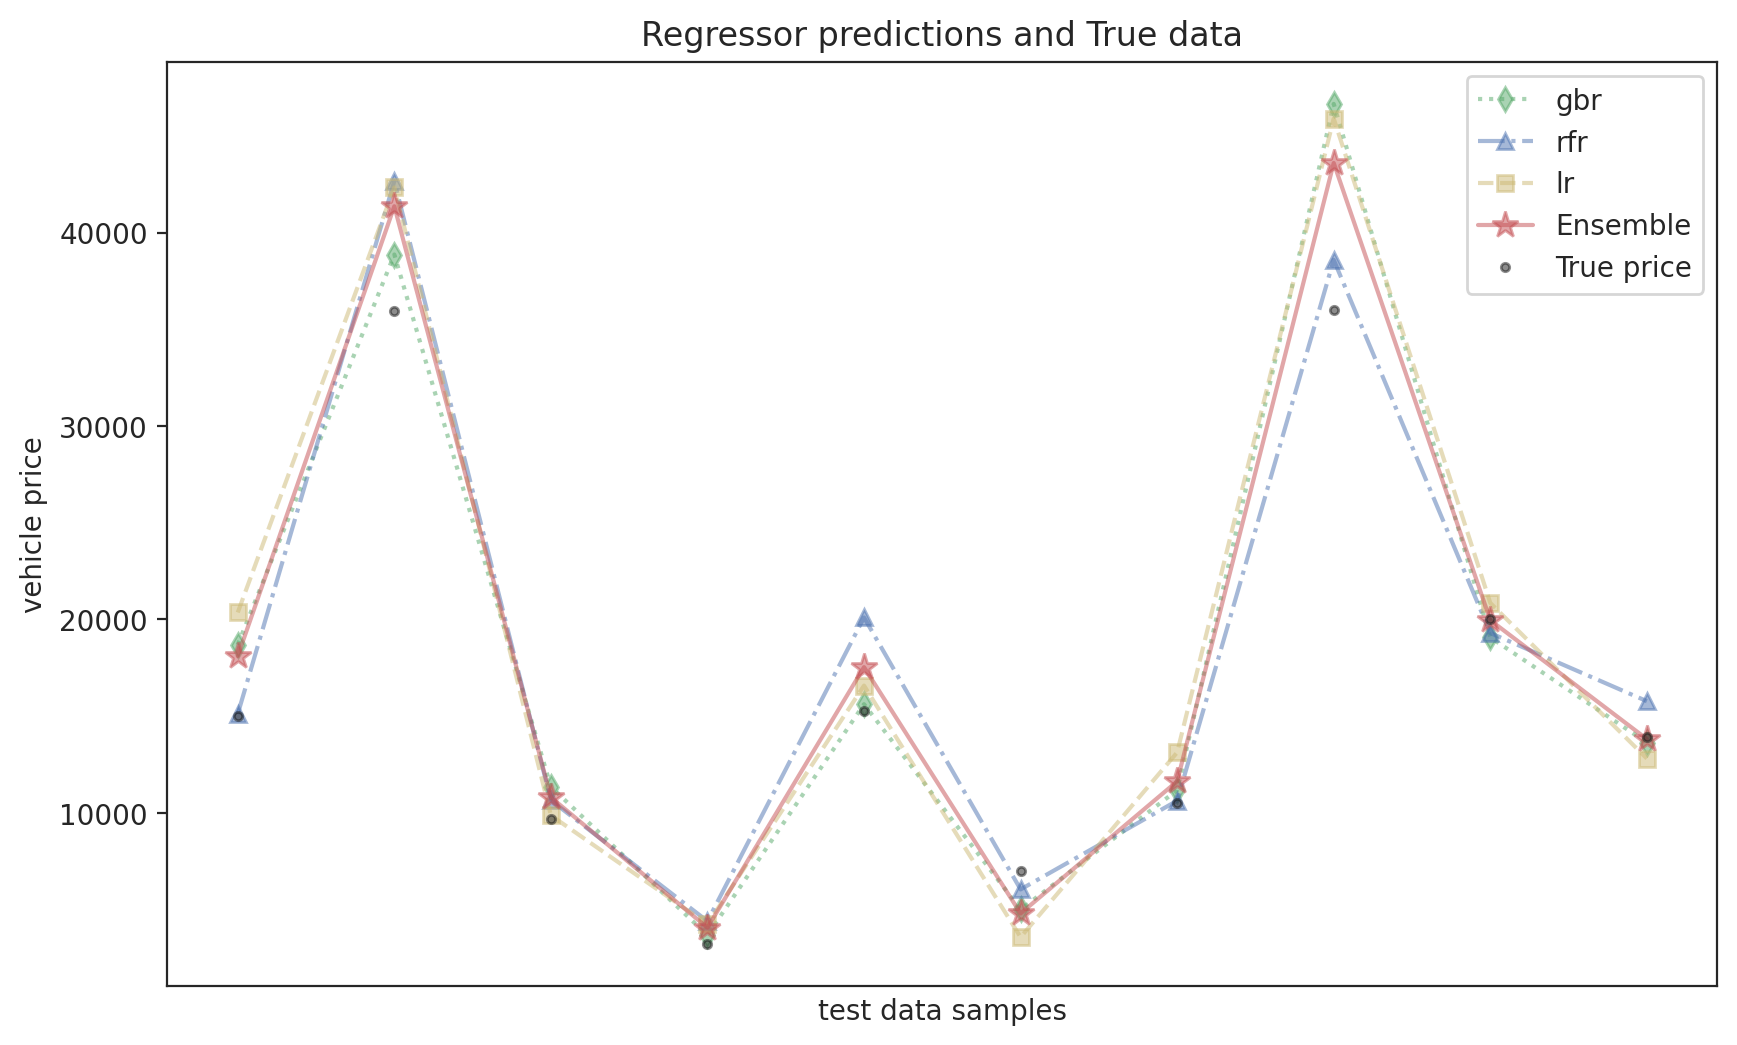

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(pred_gb, "gd:", alpha=0.5, label="gbr")
ax.plot(pred_rfr, "b^-.", alpha=0.5, label="rfr")
ax.plot(pred_lr, "ys--", alpha=0.5, label="lr")
ax.plot(pred_ens, "r*-", alpha=0.5, ms=10, label="Ensemble")
# ax.plot(yt, "ko", alpha=0.5, ms=3, label="True Data")

ax.plot(range(len(yt)), yt, "ko", alpha=0.5, ms=3, label="True price")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
ax.set_ylabel("vehicle price")
ax.set_xlabel("test data samples")
ax.legend(loc="best")
ax.set_title("Regressor predictions and True data");

### True vs Predicted Analysis

In [ ]:
models = [

    ("lr", lr),
    ("rfr", rfr),
    ('gbr', gbr),
    ('ens', ensemble)
]


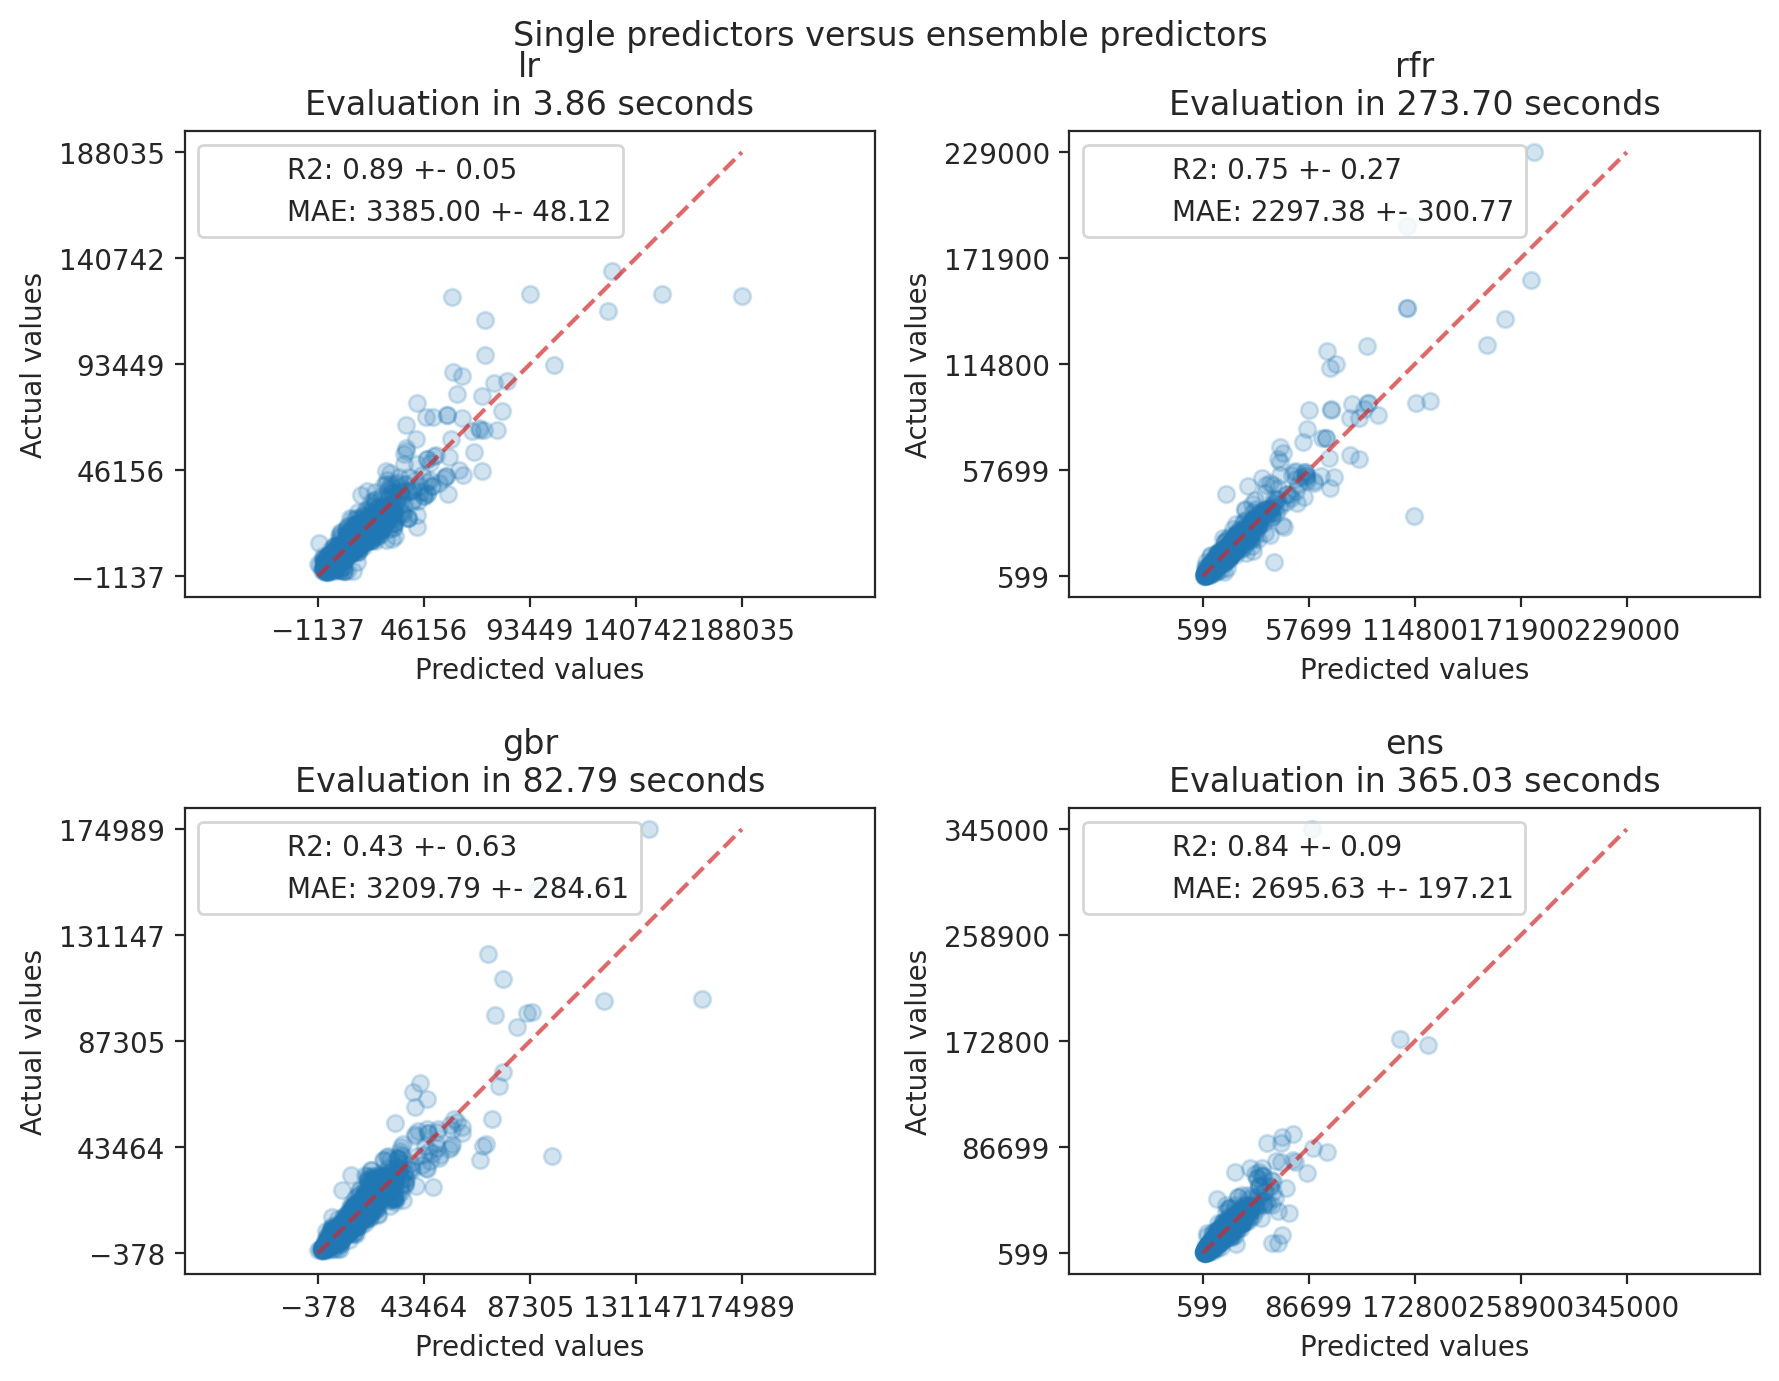

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)
for ax, (name, est) in zip(
    axs, models
):
    scorers = {"R2": "r2", "MAE": "neg_mean_absolute_error"}

    start_time = time.time()
    scores = cross_validate(
        est, X_train_RFECV, y_train, scoring=list(scorers.values()), n_jobs=-1, verbose=0
    )
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X_test_RFECV, y_test, n_jobs=-1, verbose=0)
    scores = {
        key: (
            f"{np.abs(np.mean(scores[f'test_{value}'])):.2f} +- "
            f"{np.std(scores[f'test_{value}']):.2f}"
        )
        for key, value in scorers.items()
    }

    display = PredictionErrorDisplay.from_predictions(
        y_true=y_test,
        y_pred=y_pred,
        kind="actual_vs_predicted",
        ax=ax,
        scatter_kwargs={"alpha": 0.2, "color": "tab:blue"},
        line_kwargs={"color": "tab:red"},
    )
    ax.set_title(f"{name}\nEvaluation in {elapsed_time:.2f} seconds")

    for name, score in scores.items():
        ax.plot([], [], " ", label=f"{name}: {score}")
    ax.legend(loc="upper left")

plt.suptitle("Single predictors versus ensemble predictors")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

The above plot gave an analysis of the true vs predicted. Based on time, the ensemble and random forest took a longer time between 3-4 minutes compare to linear and gradient boosting regressor. the models which include: linear, random forest, gradient boosting and ensembling has an accuracy score of 89%, 78%, 68%, 82% respectively. but the selection of the model is also based on having a very low mean absolute error (MAE). The least MAE is random forest but the accuracy is low. Linear model and gradient boosting has a very high MAE but a vary low accuracy score.
But of all, the ensembling model performs better because it has a high accuracy and a low MAE. the mean absolute error describes the mean of the difference between the predicted price and the actual price. It is important that the model has a minimal MAE

### Explanation with SHAP

In [ ]:
explainer = shap.Explainer(rfe_gbr['regr'], X_train_RFECV)
explainer

In [ ]:
explanations = explainer(X_test_RFECV
                         , check_additivity=False)

In [ ]:
explanations.shape

(7722, 15)

In [ ]:
shap_values = explanations

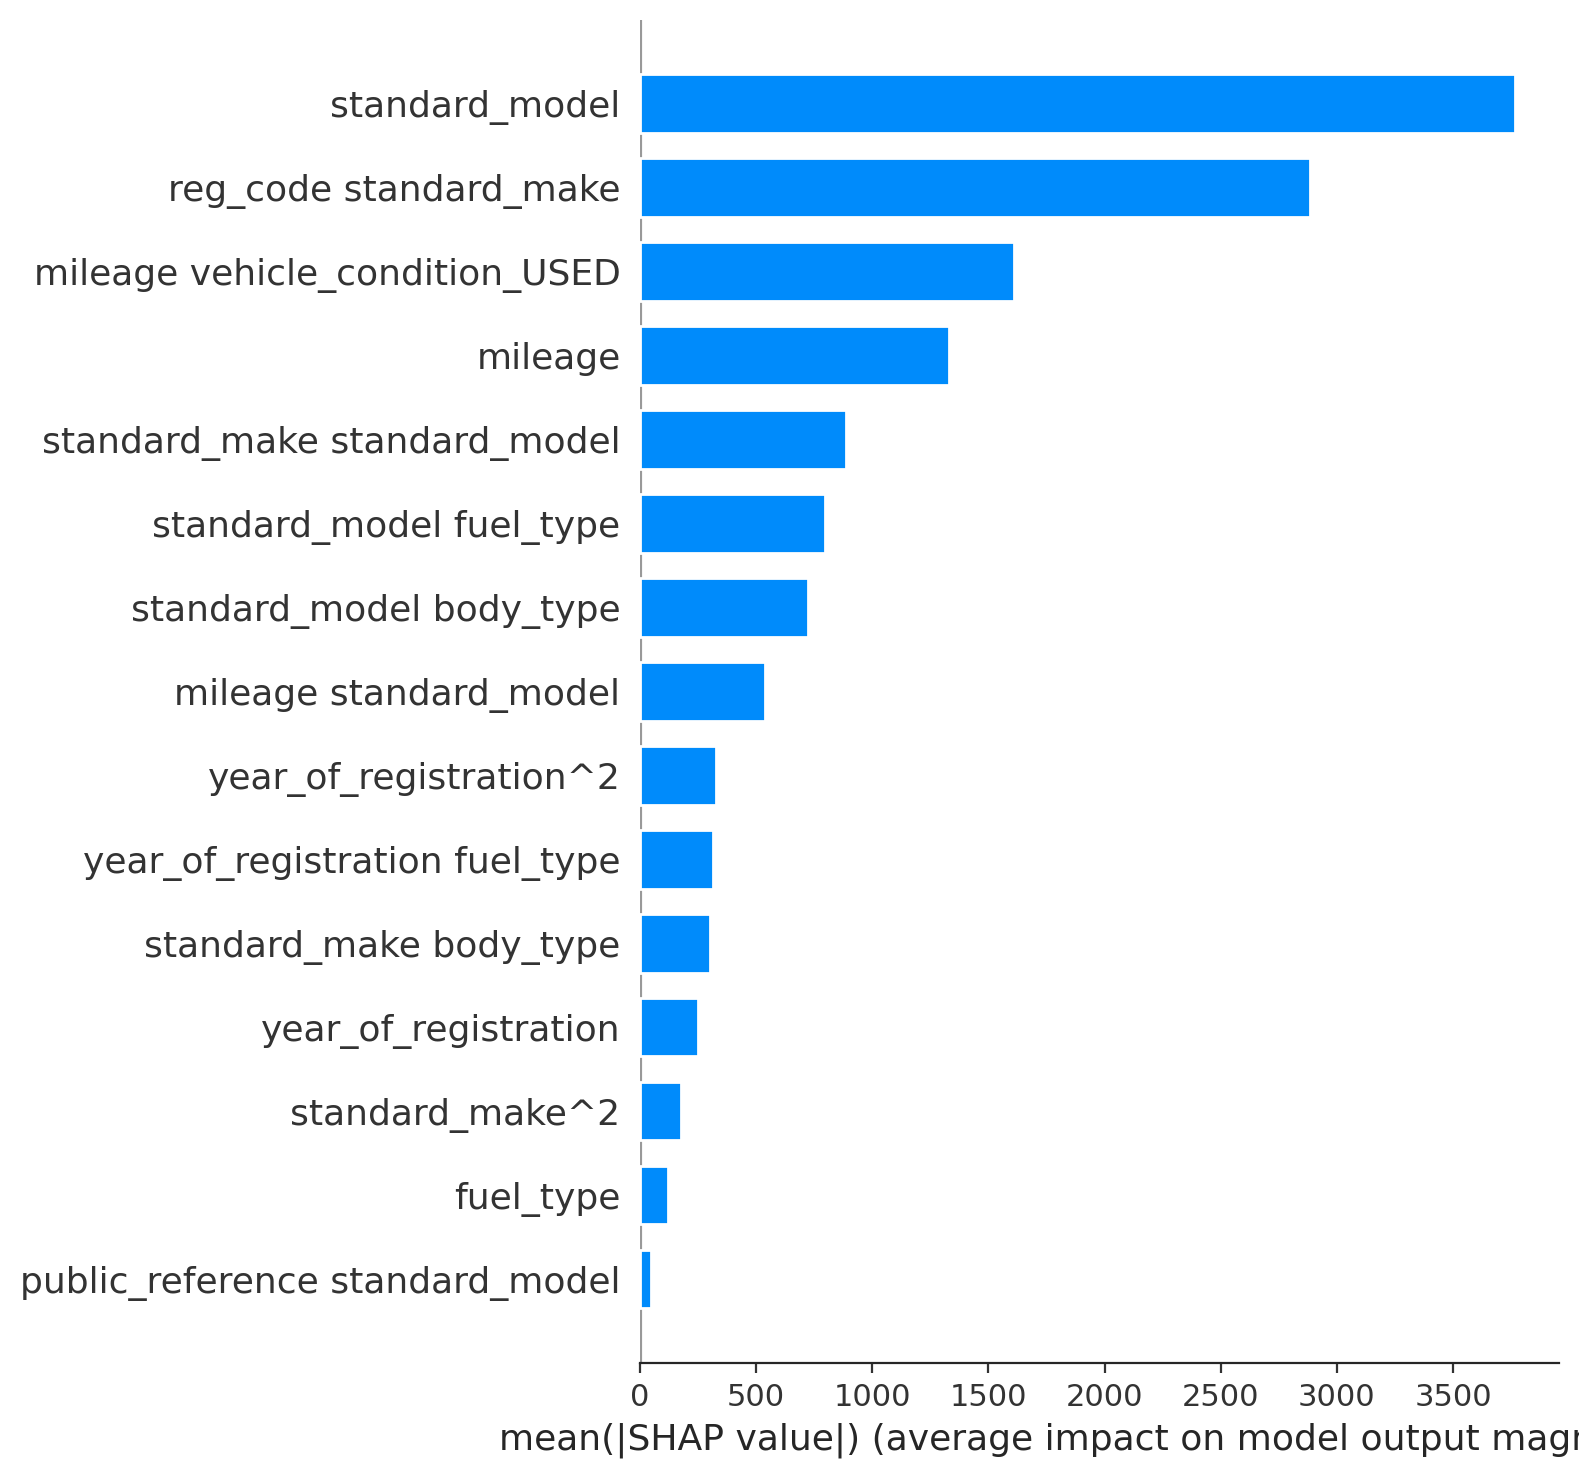

In [ ]:
# shap_values = explainer.shap_values(X_train)
shap.summary_plot(explanations.values, X_train_RFECV, feature_names=X_train_RFECV.columns, plot_type="bar")


based on the summary plot, standard model, reg code standard make, and mileage contributes more to the prediction

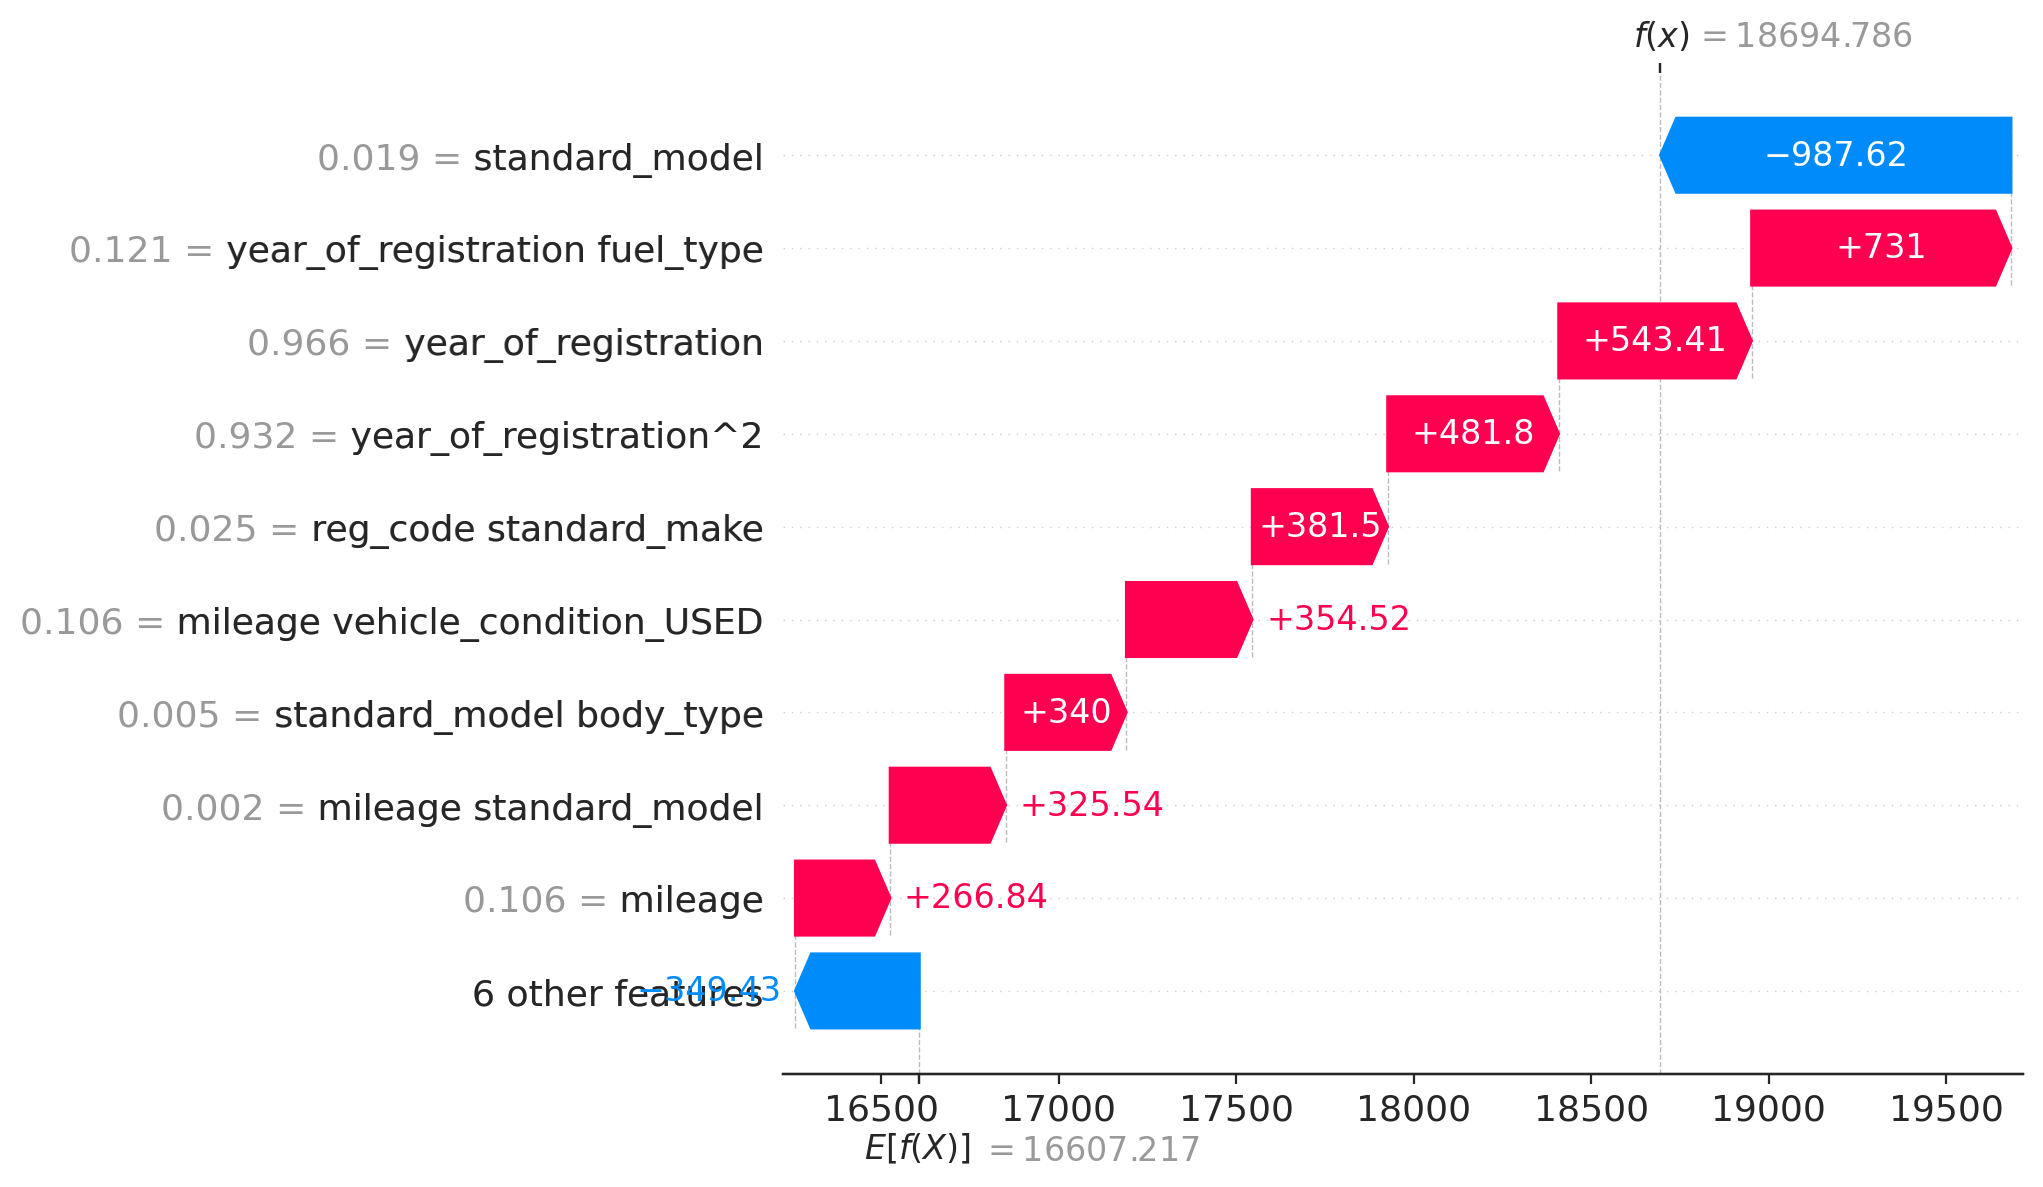

In [ ]:
shap.plots.waterfall(shap_values[0])

The shap details of the first car in the test dataset explains the contribution of each of the features to the car prediction of price 18694.786. The base mean value price is 16,1607.217. Looking at the above, the year of reggistration, 'year_of_registration fuel type', mileage increases the car price while the standard model and make contribute to the reduction.

Details of the car below shows that the car was registered in 2019 with fuel type diesel, as it is expected that this car has not been used for long (low mileage) before salling.So we can expect that this will contribute to the price increment of which the model did amd showed.  



In [ ]:
X_test.head(5)

public_reference  mileage reg_code standard_colour  standard_make  \
44102       2.020100e+14  13467.0       19           Black           SEAT   
85028       2.020100e+14  22635.0       66           Black     Land Rover   
101387      2.020100e+14  59536.0       14            Grey  Mercedes-Benz   
249337      2.020100e+14  71500.0       12           White     Volkswagen   
311834      2.020100e+14  11318.0       18            Grey     Volkswagen   

           standard_model vehicle_condition  year_of_registration  body_type  \
44102               Arona              USED                2019.0        SUV   
85028   Range Rover Sport              USED                2016.0        SUV   
101387            B Class              USED                2014.0  Hatchback   
249337                up!              USED                2012.0  Hatchback   
311834               Golf              USED                2018.0  Hatchback   

        crossover_car_and_van fuel_type  
44102                   False    Diesel  
85028                   False    Diesel  
101387                  False    Diesel  
249337                  False    Petrol  
311834                  False    Petrol

In [ ]:
auto_df.loc[44102]

public_reference         202010000000000.0
mileage                            13467.0
reg_code                                19
standard_colour                      Black
standard_make                         SEAT
standard_model                       Arona
vehicle_condition                     USED
year_of_registration                2019.0
price                                15000
body_type                              SUV
crossover_car_and_van                False
fuel_type                           Diesel
vehicle_age                            5.0
mileage_level                          low
Name: 44102, dtype: object

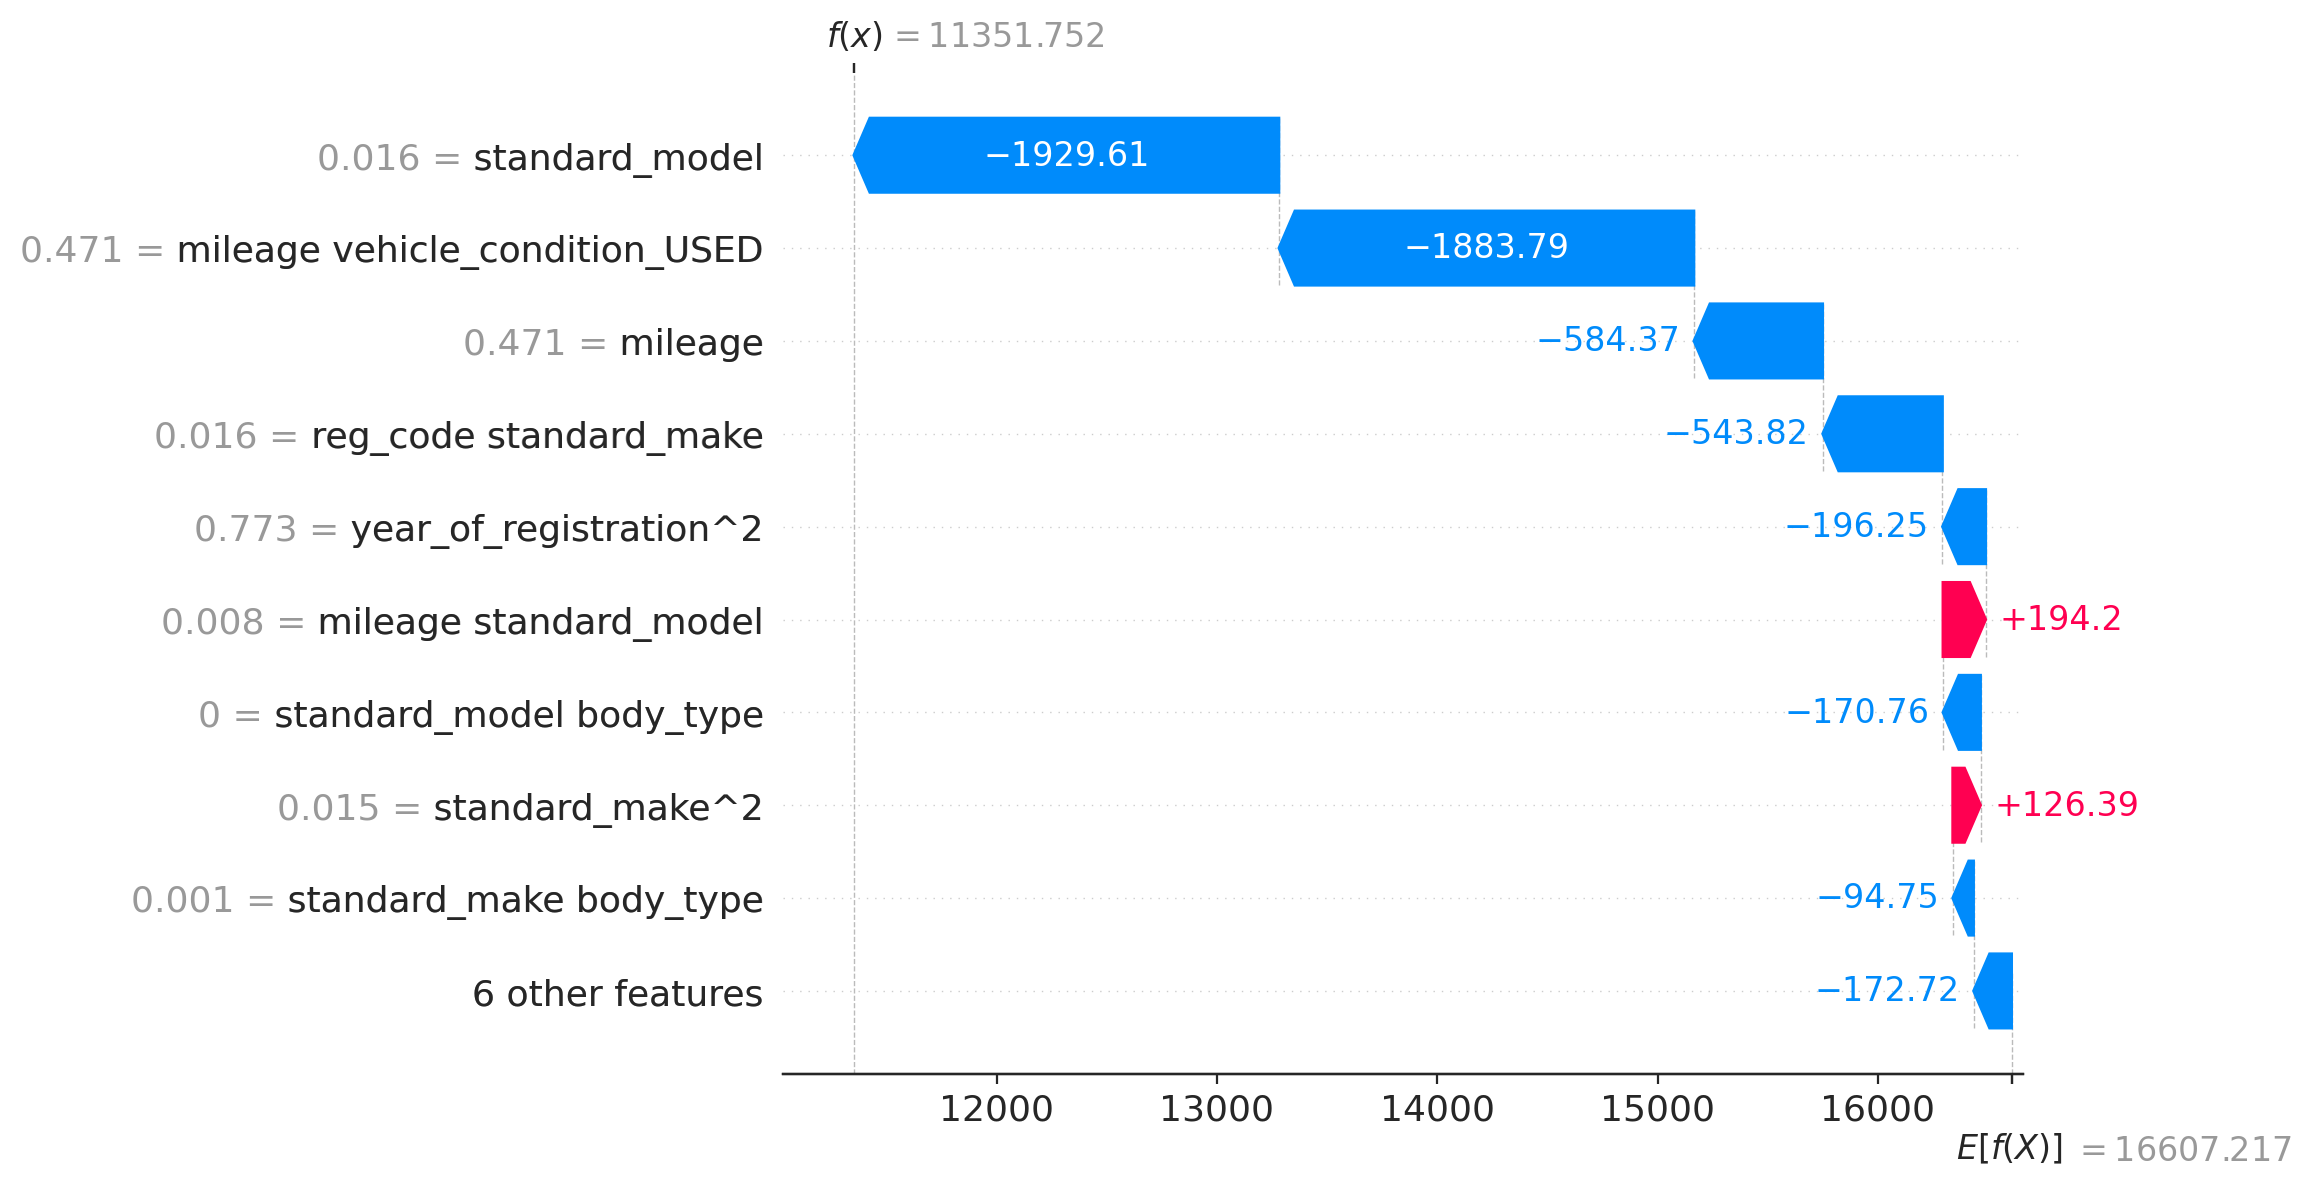

In [ ]:
shap.plots.waterfall(shap_values[2])

The price prediction of this particular instance has a different feature contribution. Only the feature 'mileage standard_model' and 'standard_make^2' contributed to the price increment while the others reduces the price prediction. the car had a relatively high mileage and at the same time it has been used, this features contributed to the reduction of the price from the base value.

based on the domain knowledge it is expected that cars that has a high mileage and are of older year are to be sold at a lower price of which the model also correspond with the domain knowlegde

In [ ]:
auto_df.loc[101387]

public_reference         202010000000000.0
mileage                            59536.0
reg_code                                14
standard_colour                       Grey
standard_make                Mercedes-Benz
standard_model                     B Class
vehicle_condition                     USED
year_of_registration                2014.0
price                                 9690
body_type                        Hatchback
crossover_car_and_van                False
fuel_type                           Diesel
vehicle_age                           10.0
mileage_level                       medium
Name: 101387, dtype: object

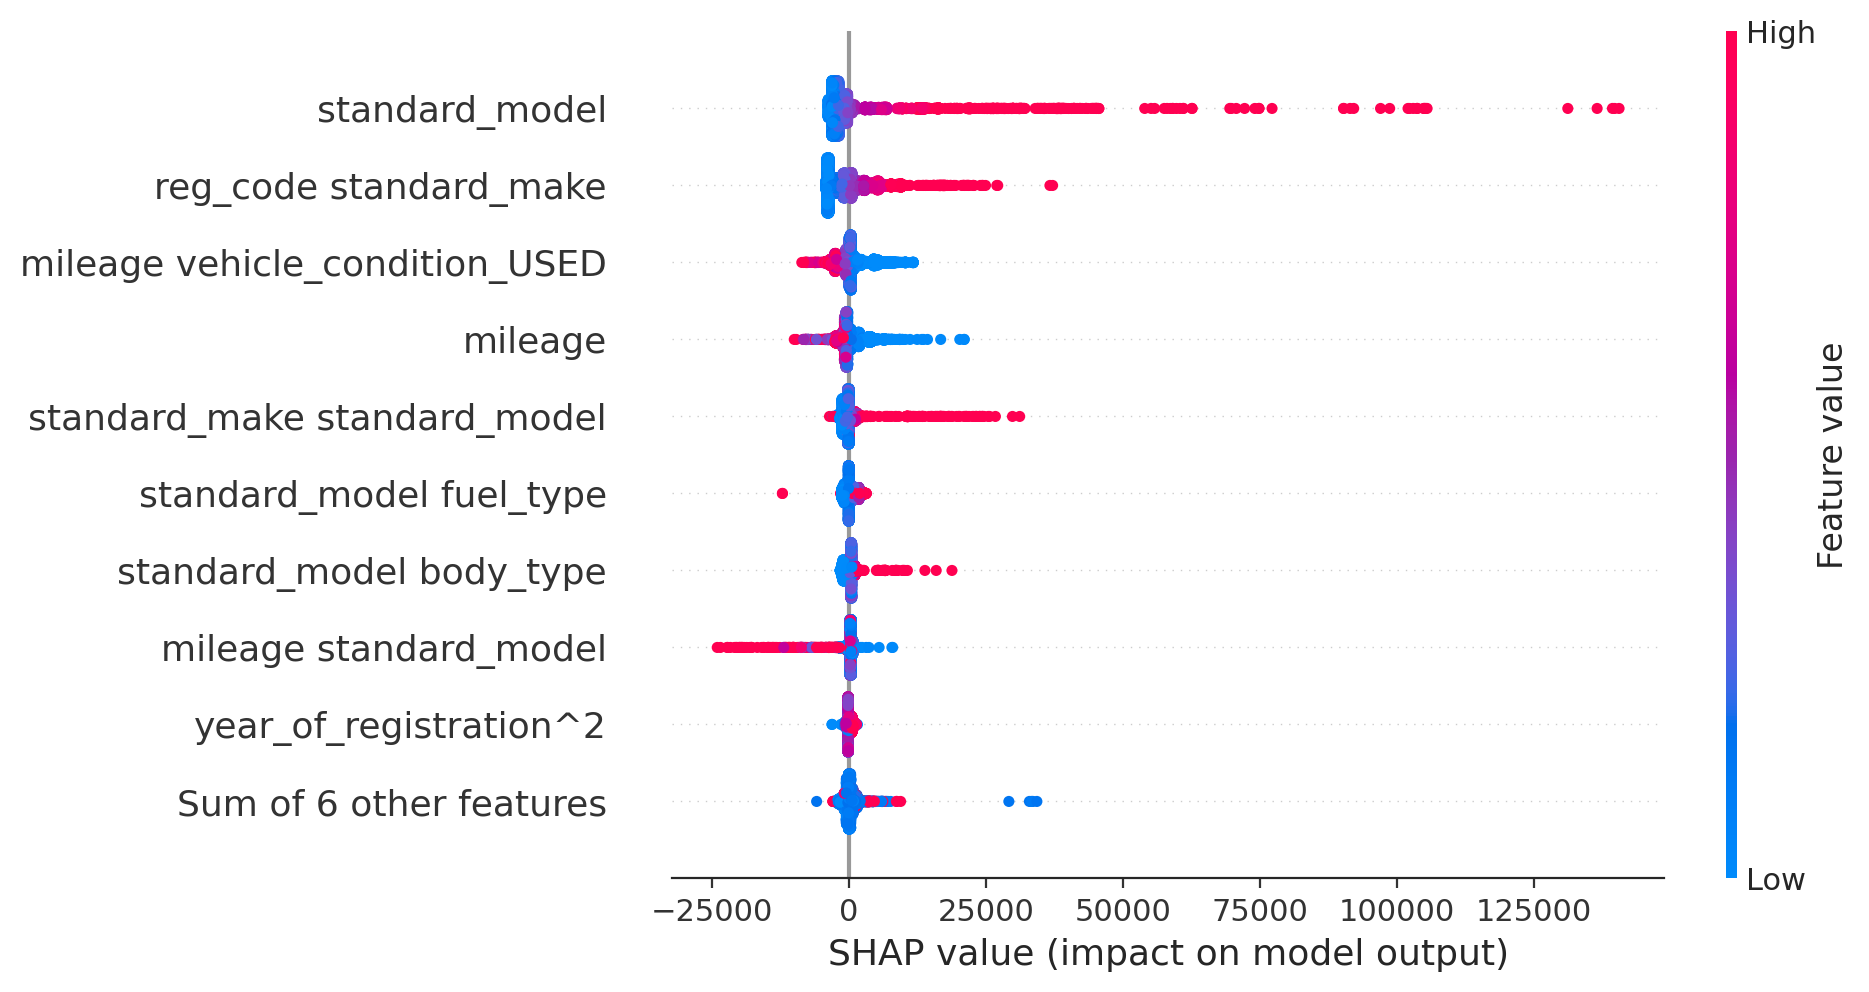

In [ ]:
# global
shap.plots.beeswarm(shap_values)

The global expanation reveals that a high standard model, 'reg_code standard_make' increases the shap values. for mileage, a low value increases the value while a high mileage reduces the shap value. features like 'standard_model fuel_type', 'year_of_registration^2' have a low contribution to the shap value.

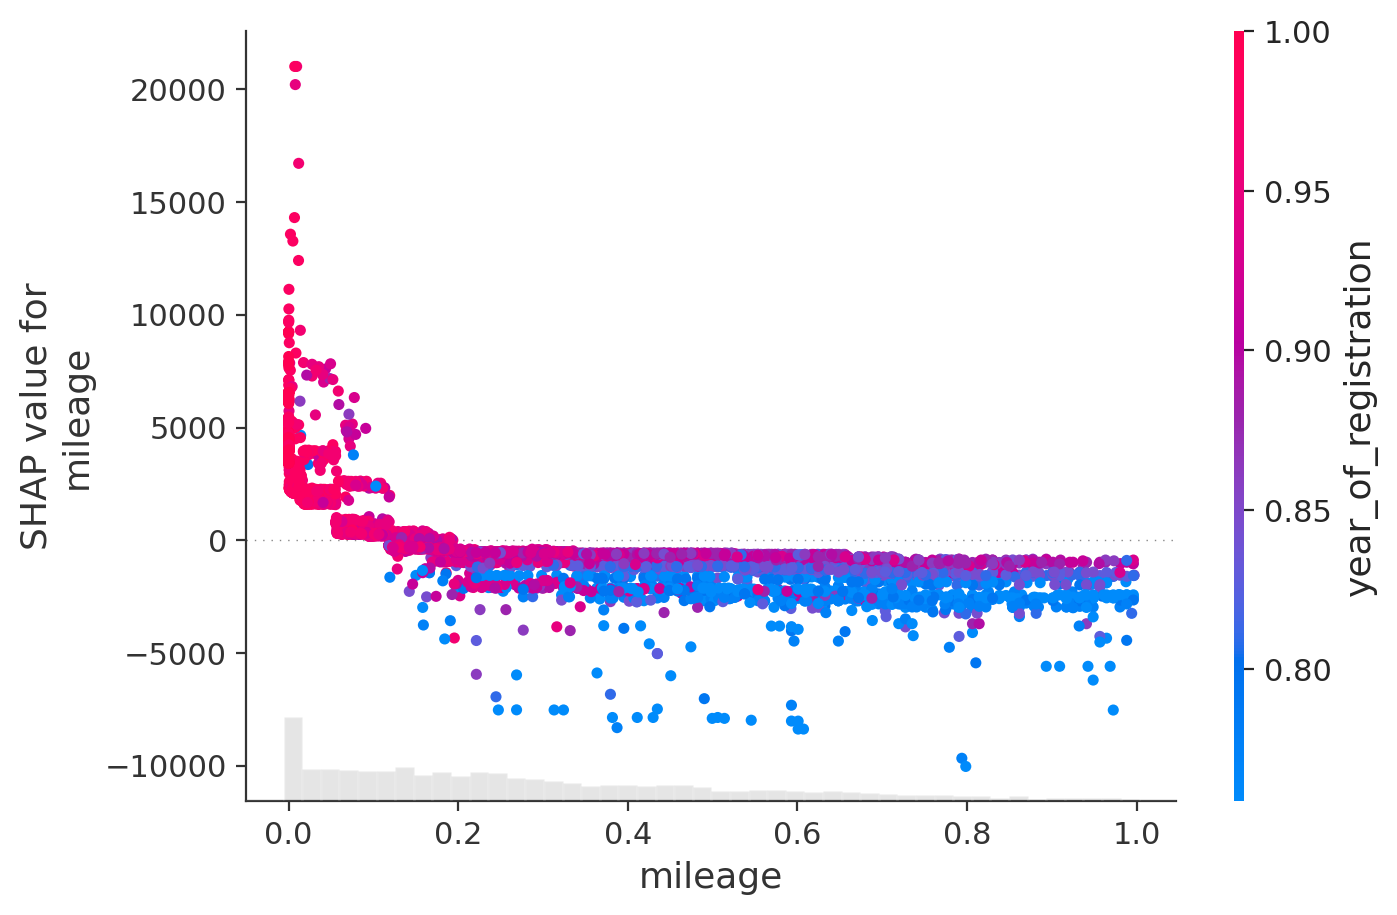

In [ ]:
shap.plots.scatter(shap_values[:, 'mileage'], color=shap_values[:,"year_of_registration"])

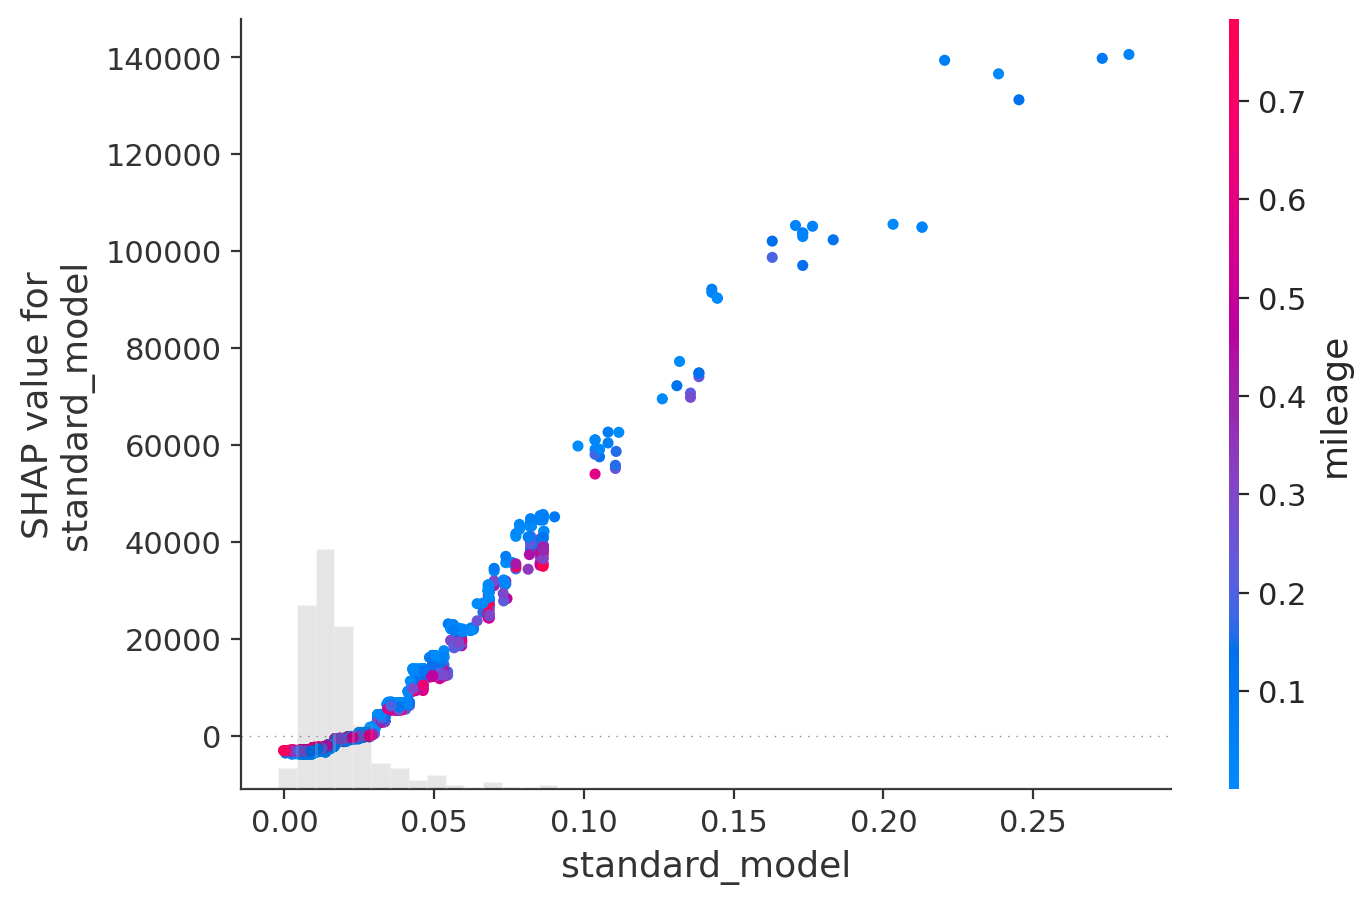

In [ ]:
shap.plots.scatter(shap_values[:, 'standard_model'], color=shap_values[:,"mileage"])

These features explanation gave a better view of how the model works. vehicles that are of high model and high mileage have a high reduction in shap values/price value compare to vehicles that are of high mileage but low model, this vehicles slightly have a drop in shap values

vehicles with a low mileage and high model are said to have a increase shap value, which result into the increase in base price. low model vehicles with a low mileage also have a incresed shap vaues but not as vehicles of high model.

Shap explanation of ensembling model is computationally expensive, I have explained the random forest above, which is also an ensembing model






In [ ]:
# # Define a function to return predictions for the ensemble model
# def ensemble_predict(X):
#     return ensemble.predict(X)

# # Initialize the Explainer object with the callable function
# explainer = shap.Explainer(ensemble_predict, X_train_RFECV[:1000])

# # Generate SHAP values
# shap_values = explainer.shap_values(X_test_RFECV[:1000])

# # Visualize the SHAP values
# shap.summary_plot(shap_values, X_test_RFECV[:1000])


Shap Explanation of RandomForest

In [ ]:
# explainer = shap.Explainer(rfe_rgr['regr'], X_train_RFECV)
# explainer

In [ ]:
explanations_tr = explainer(X_test_RFECV
                         , check_additivity=False)

In [ ]:
# shap_values = explanations


In [ ]:
# shap.summary_plot(explanations.values, X_train_RFECV, feature_names=X_train_RFECV.columns, plot_type="bar")


In [ ]:
# shap.plots.waterfall(shap_values[0])


### Partial Dependency Plots

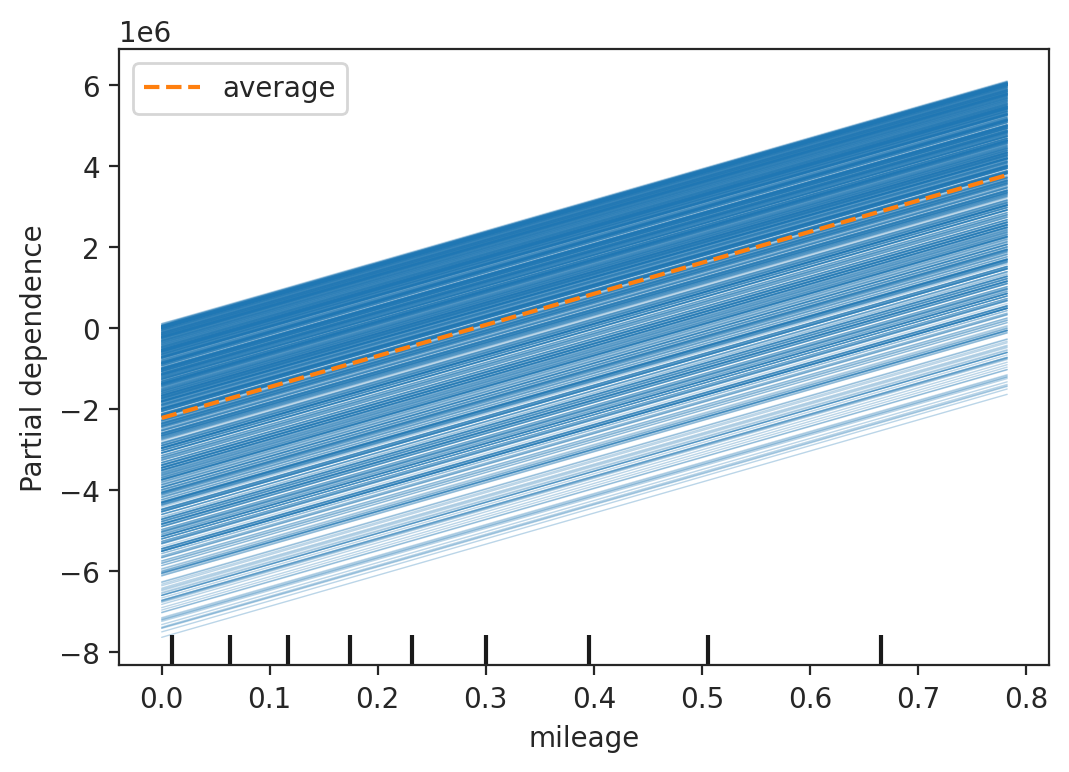

In [ ]:
PartialDependenceDisplay.from_estimator(
    ensemble, X_test_RFECV, features=['mileage'], kind='both'
);

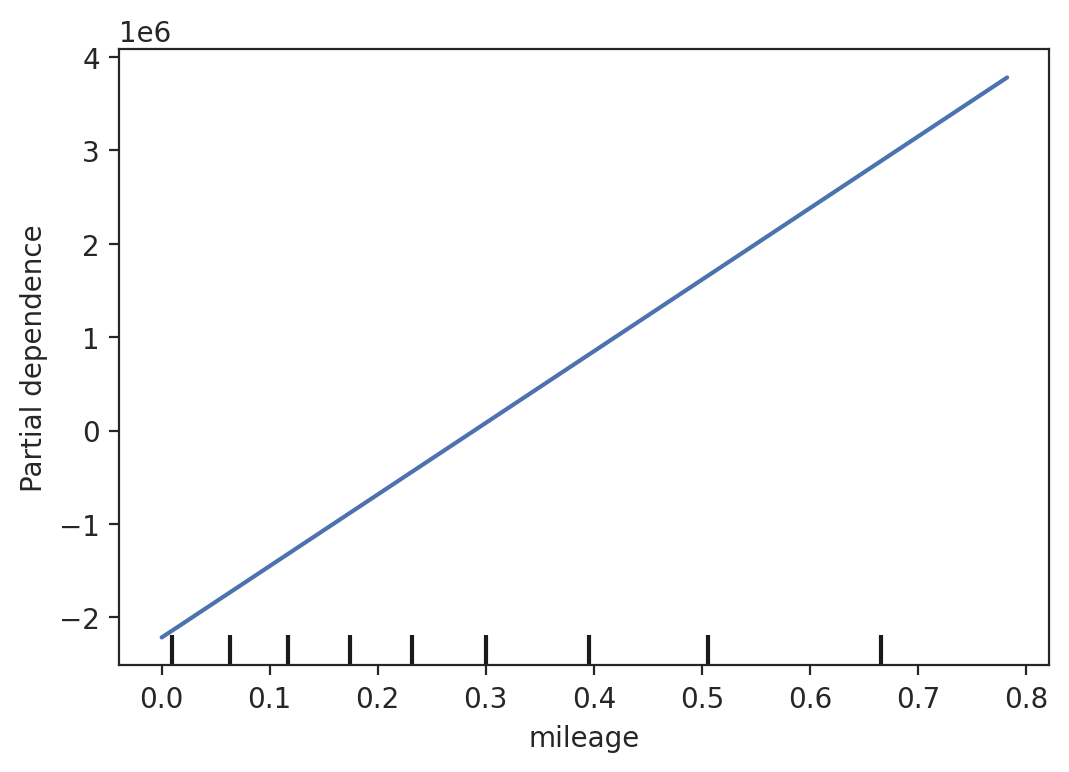

In [ ]:
PartialDependenceDisplay.from_estimator(
    ensemble, X_test_RFECV, features=['mileage'], kind='average'
);

In [ ]:
X_test_RFECV.columns

Index(['mileage', 'year_of_registration', 'standard_model', 'fuel_type',
       'mileage vehicle_condition_USED', 'mileage standard_model',
       'year_of_registration^2', 'year_of_registration fuel_type',
       'public_reference standard_model', 'reg_code standard_make',
       'standard_make^2', 'standard_make standard_model',
       'standard_make body_type', 'standard_model body_type',
       'standard_model fuel_type'],
      dtype='object')

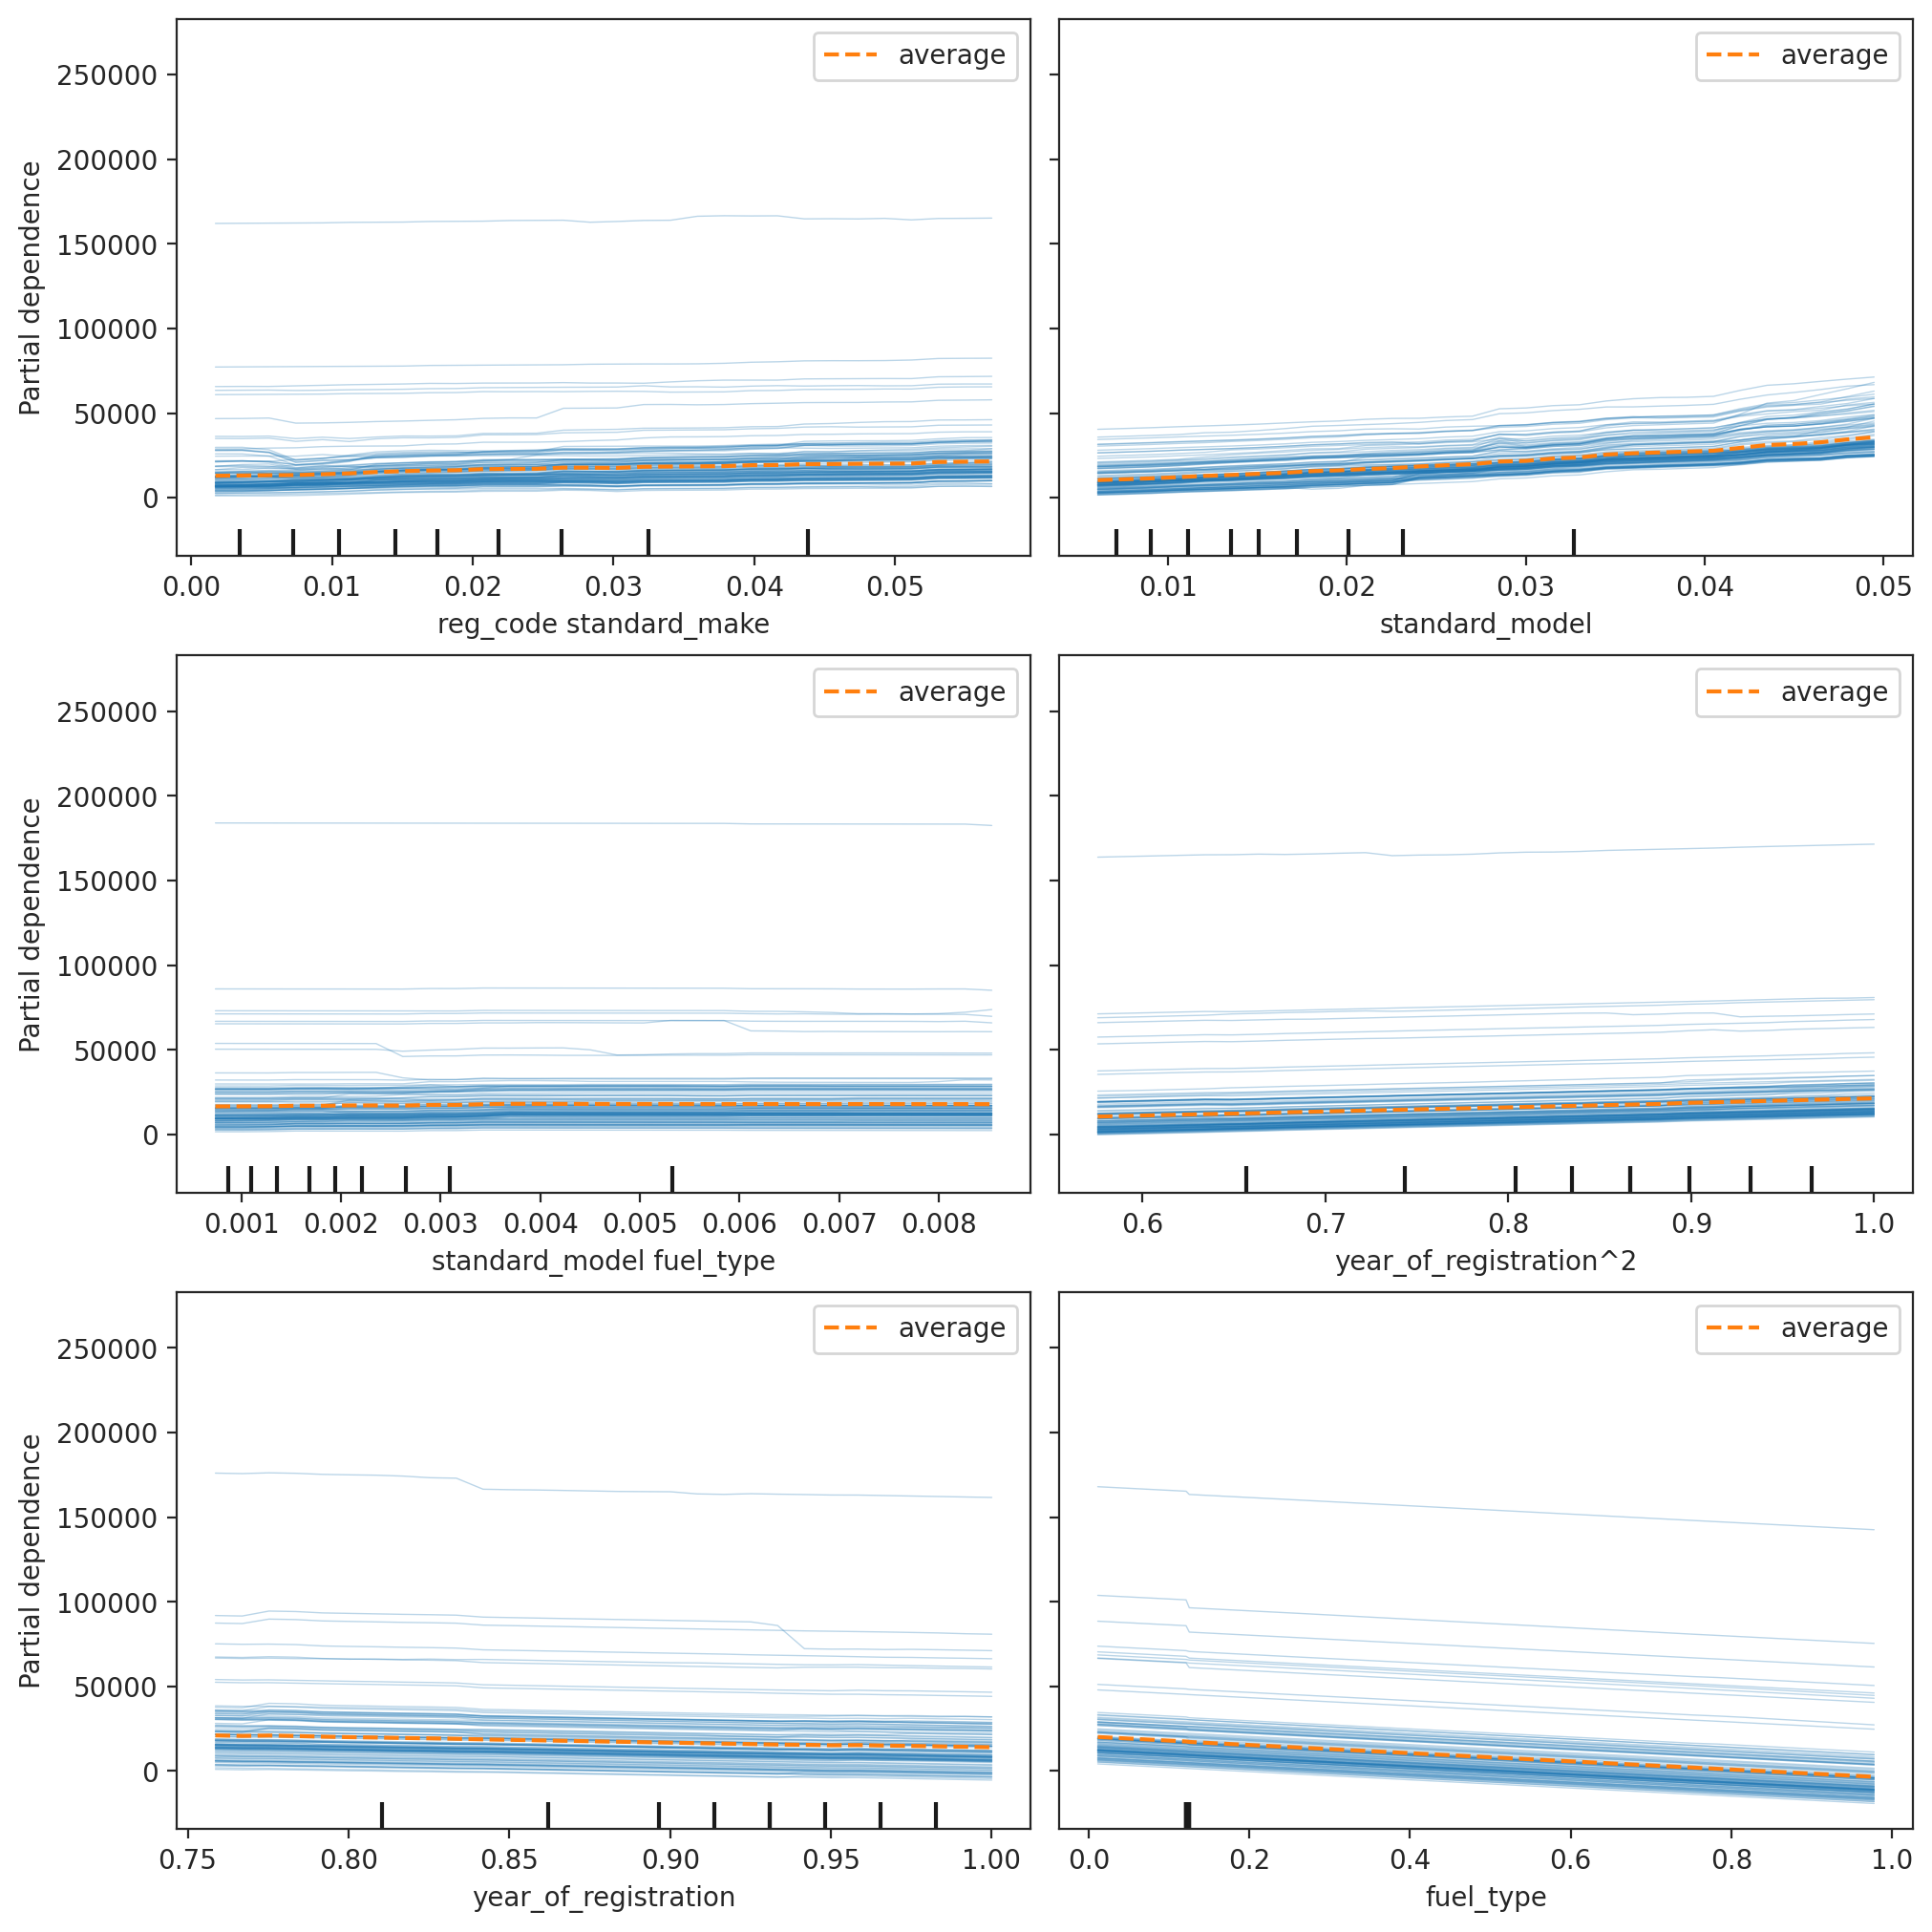

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    ensemble, X_test_RFECV, features=['reg_code standard_make', 'standard_model', 'standard_model fuel_type', 'year_of_registration^2',  'year_of_registration', 'fuel_type'],
    kind='both',
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

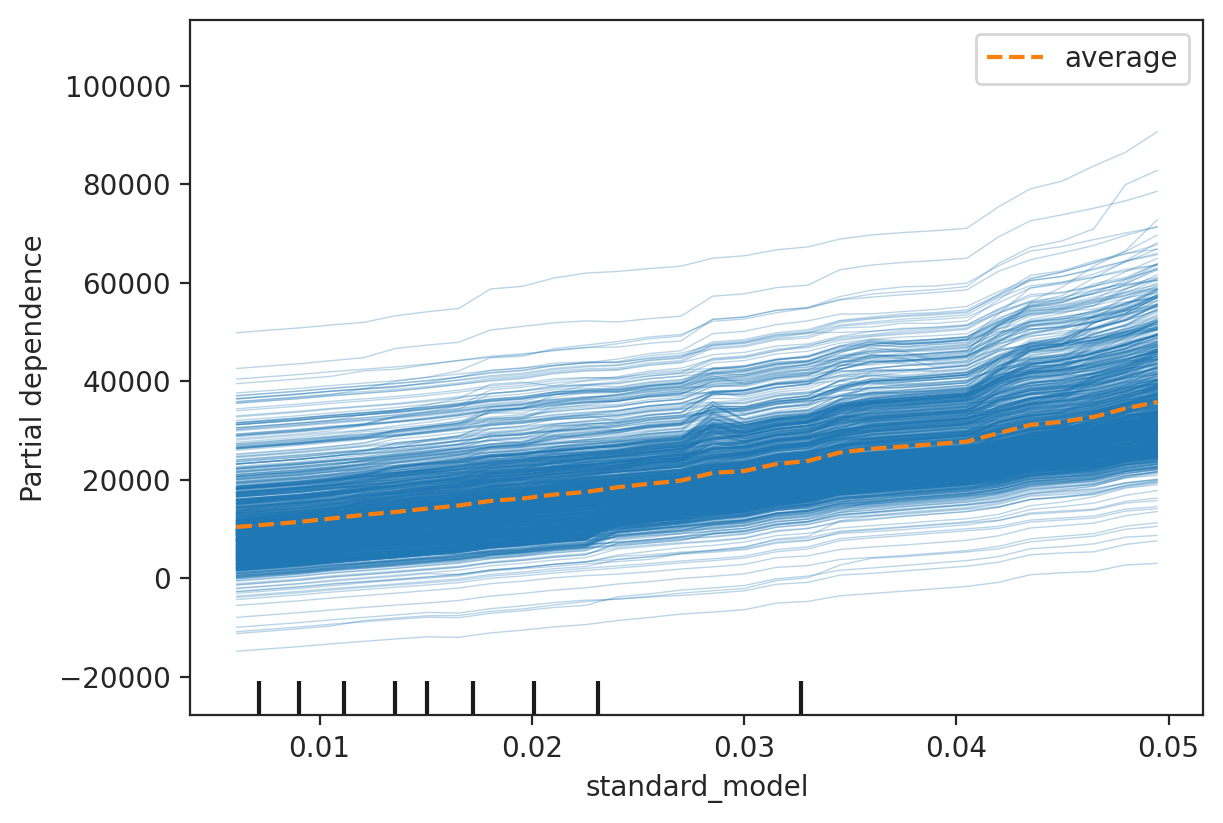

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    ensemble, X_test_RFECV, features=['standard_model'],
    kind='both',
    grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

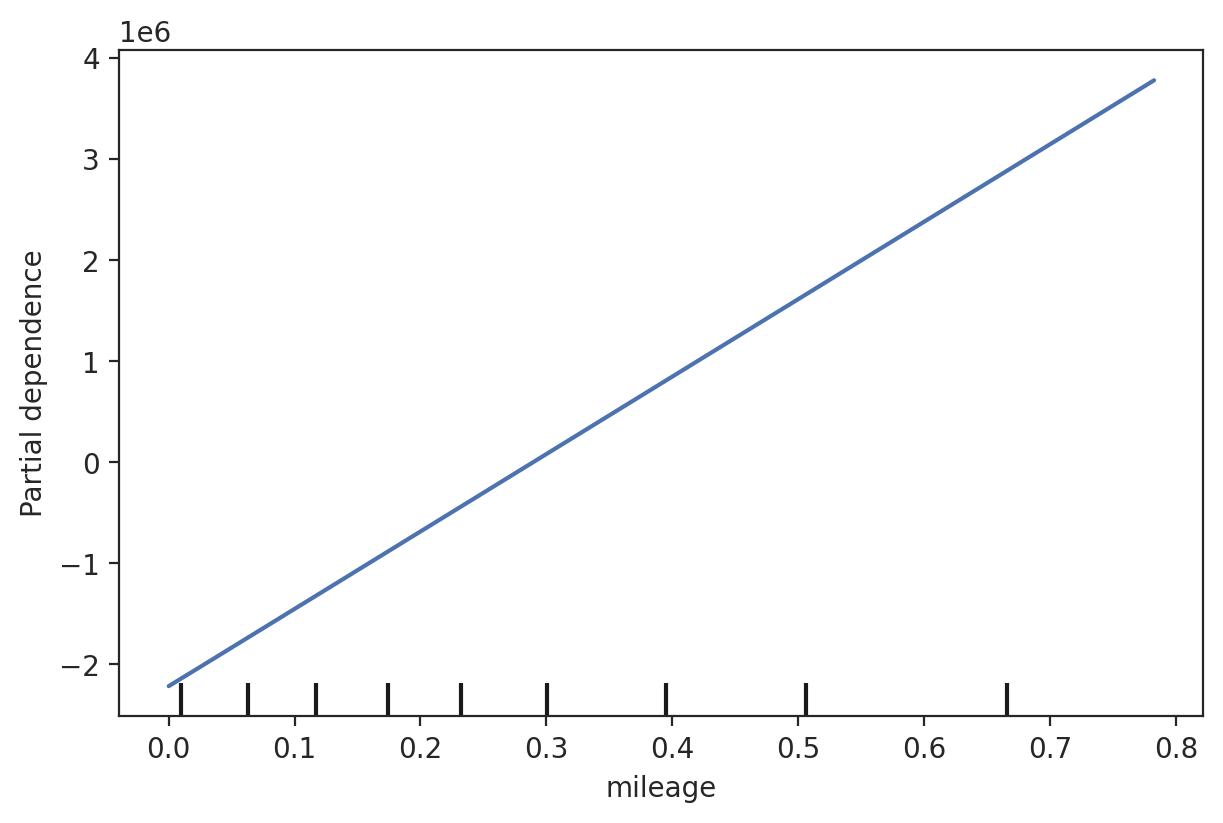

In [ ]:
xfig, ax = plt.subplots(figsize=(6,4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    ensemble, X_test_RFECV, features=['mileage'],
    kind='average',
    grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

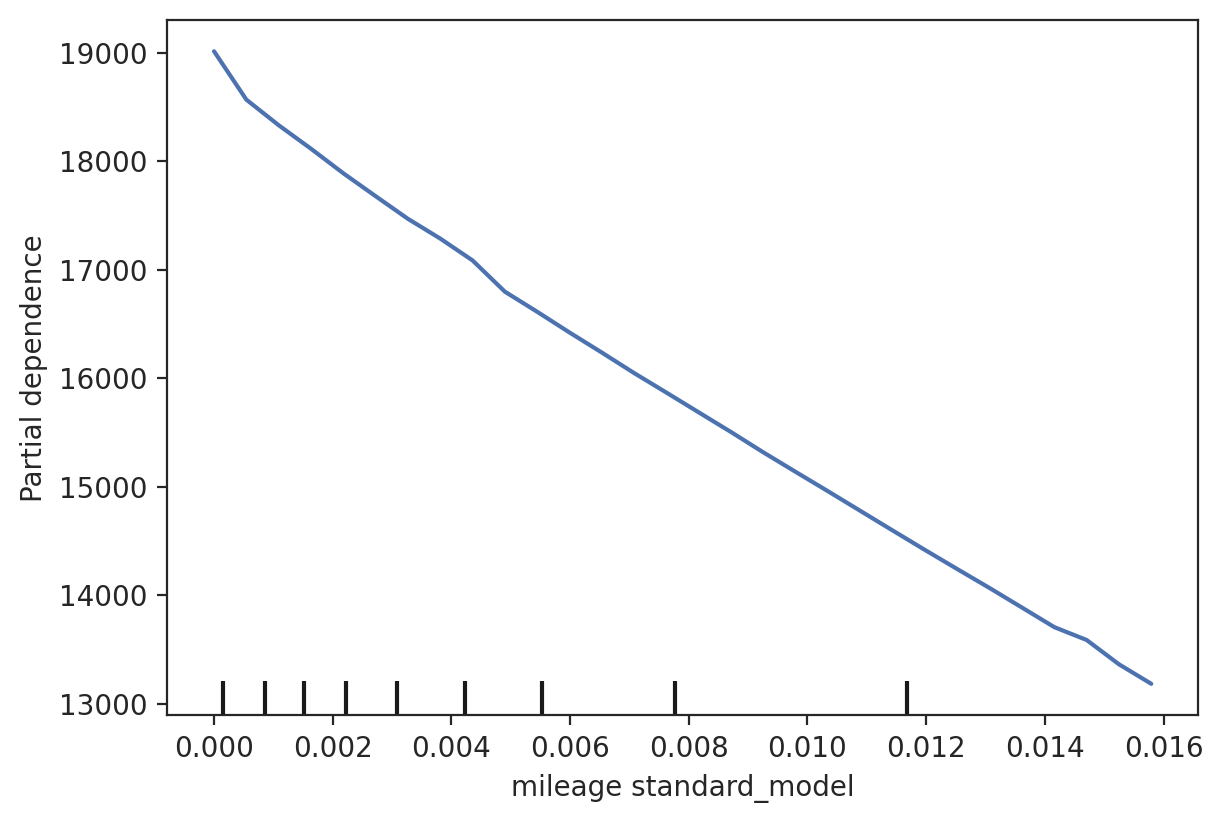

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    ensemble, X_test_RFECV, features=['mileage standard_model'],
    kind='average',
    grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

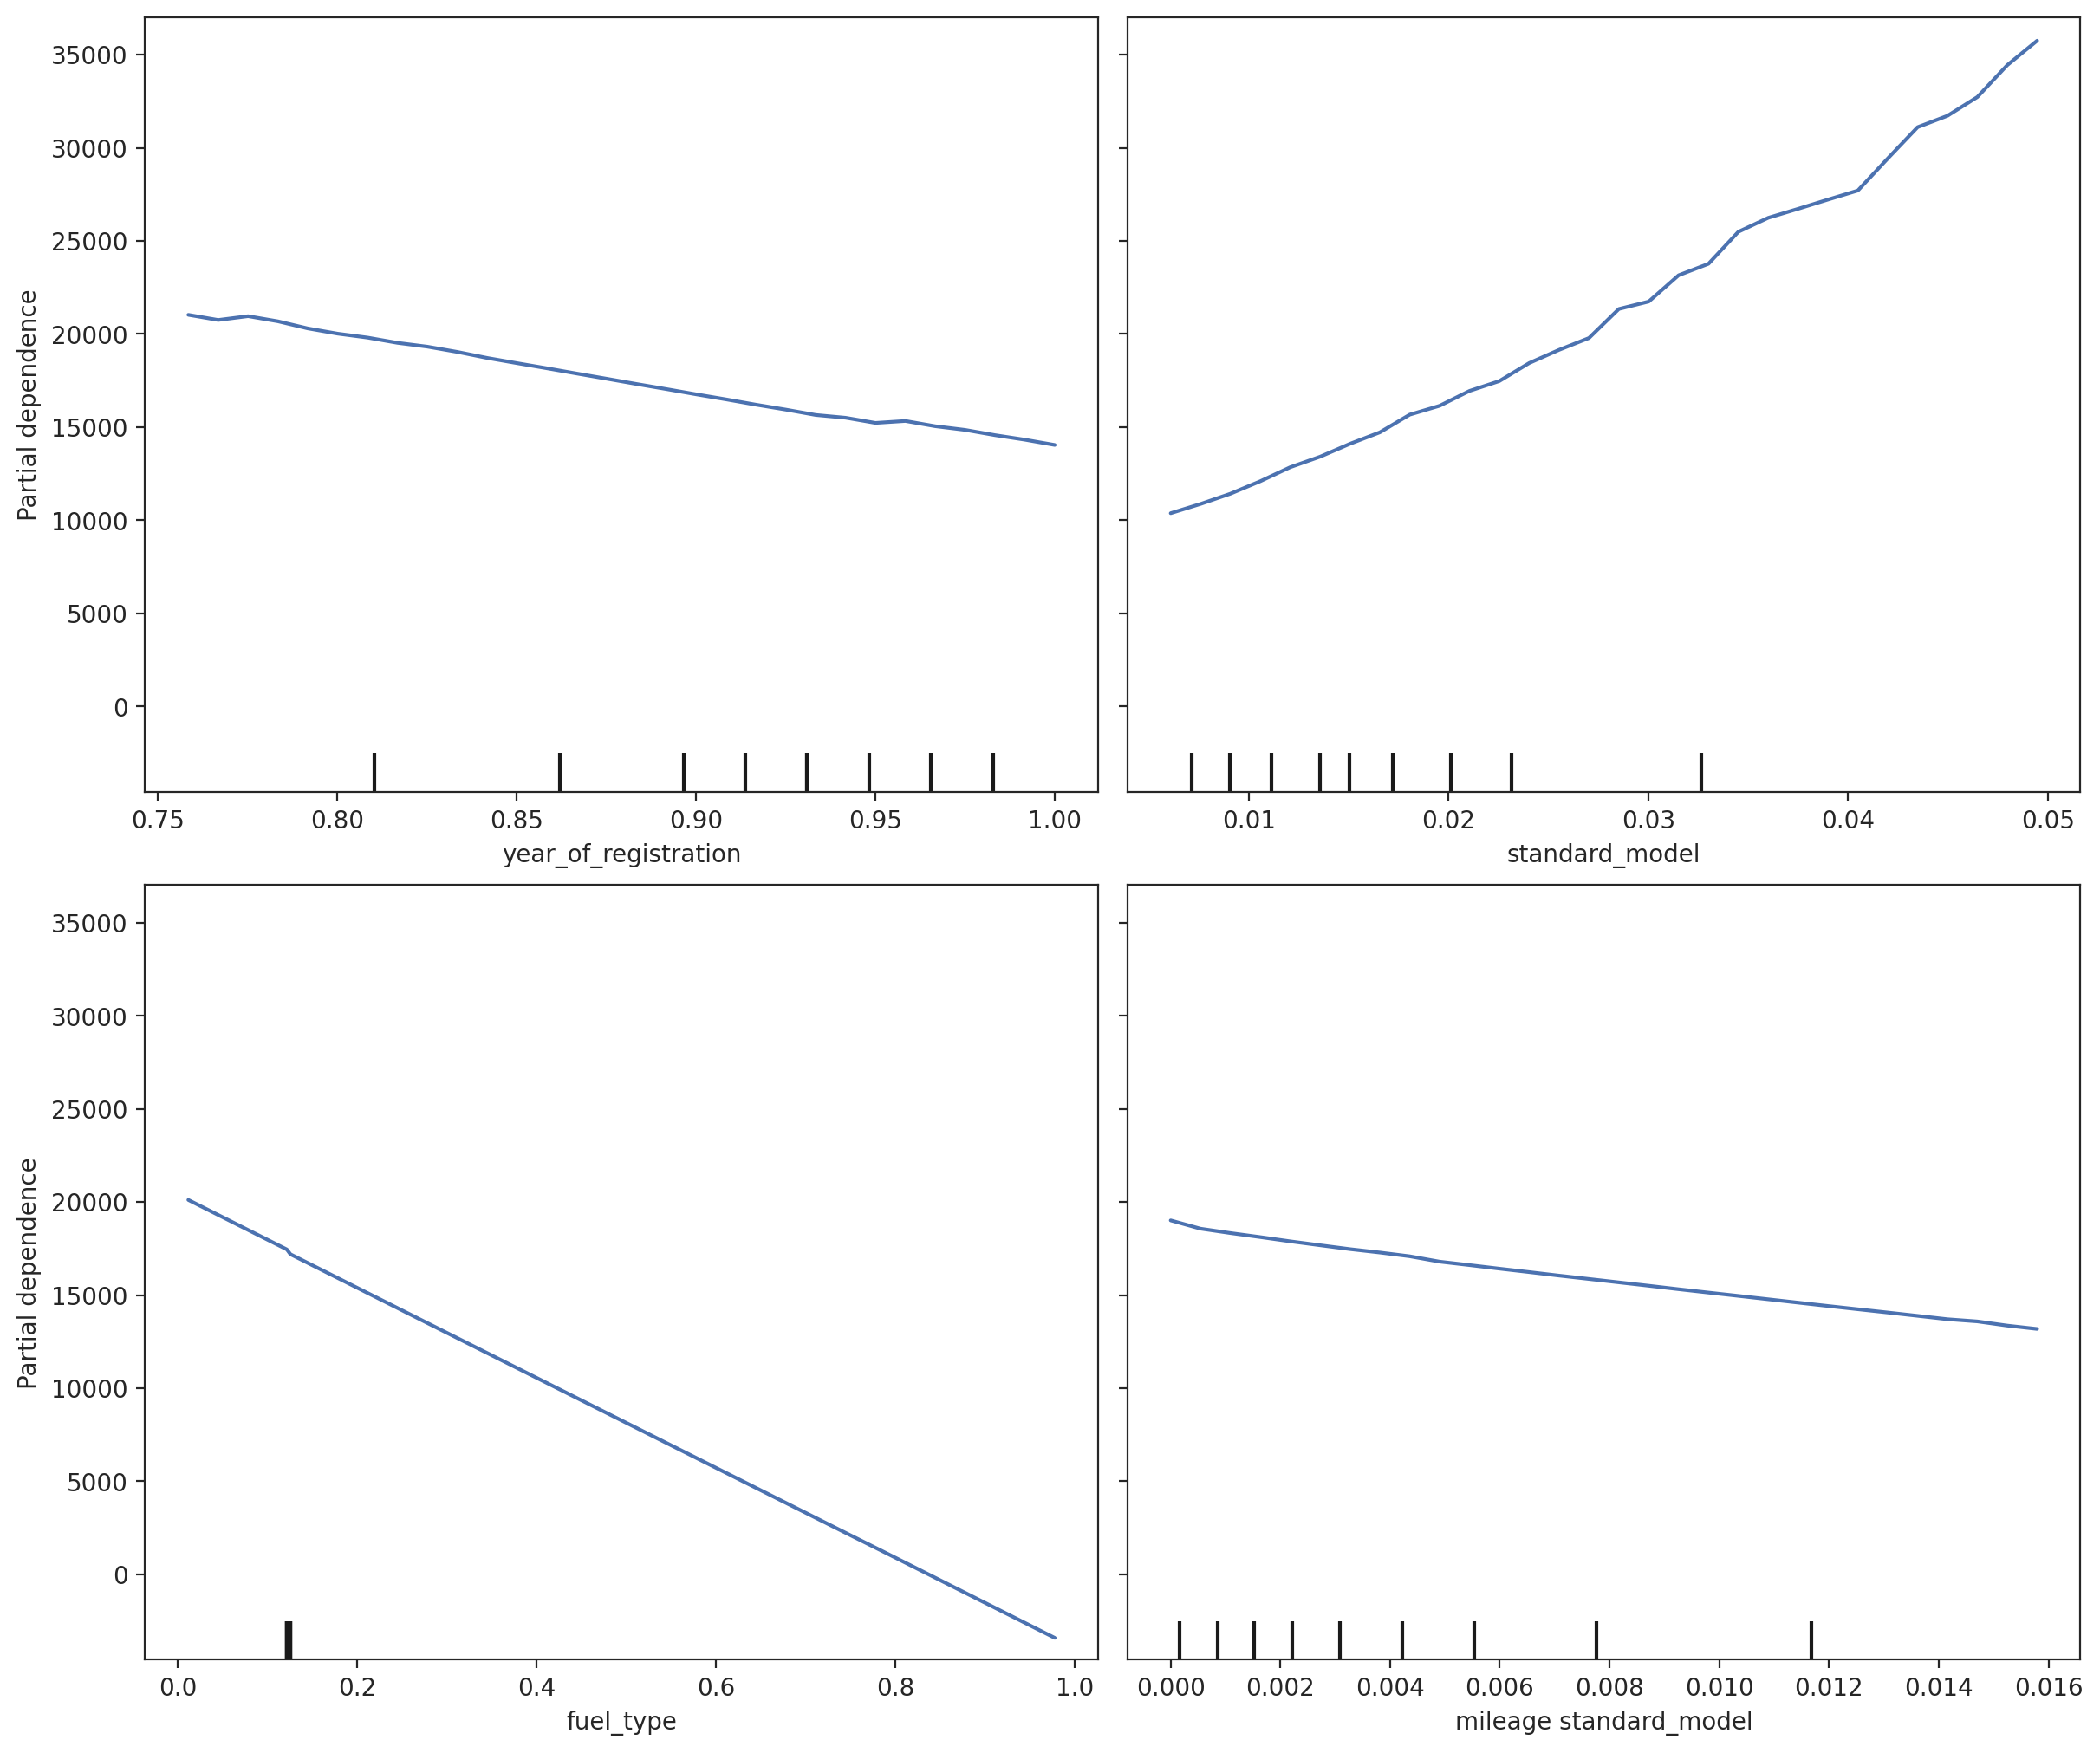

In [ ]:
xfig, ax = plt.subplots(figsize=(12,10), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    ensemble, X_test_RFECV, features=['year_of_registration', 'standard_model', 'fuel_type', 'mileage standard_model',
       ],
    kind='average',
    grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

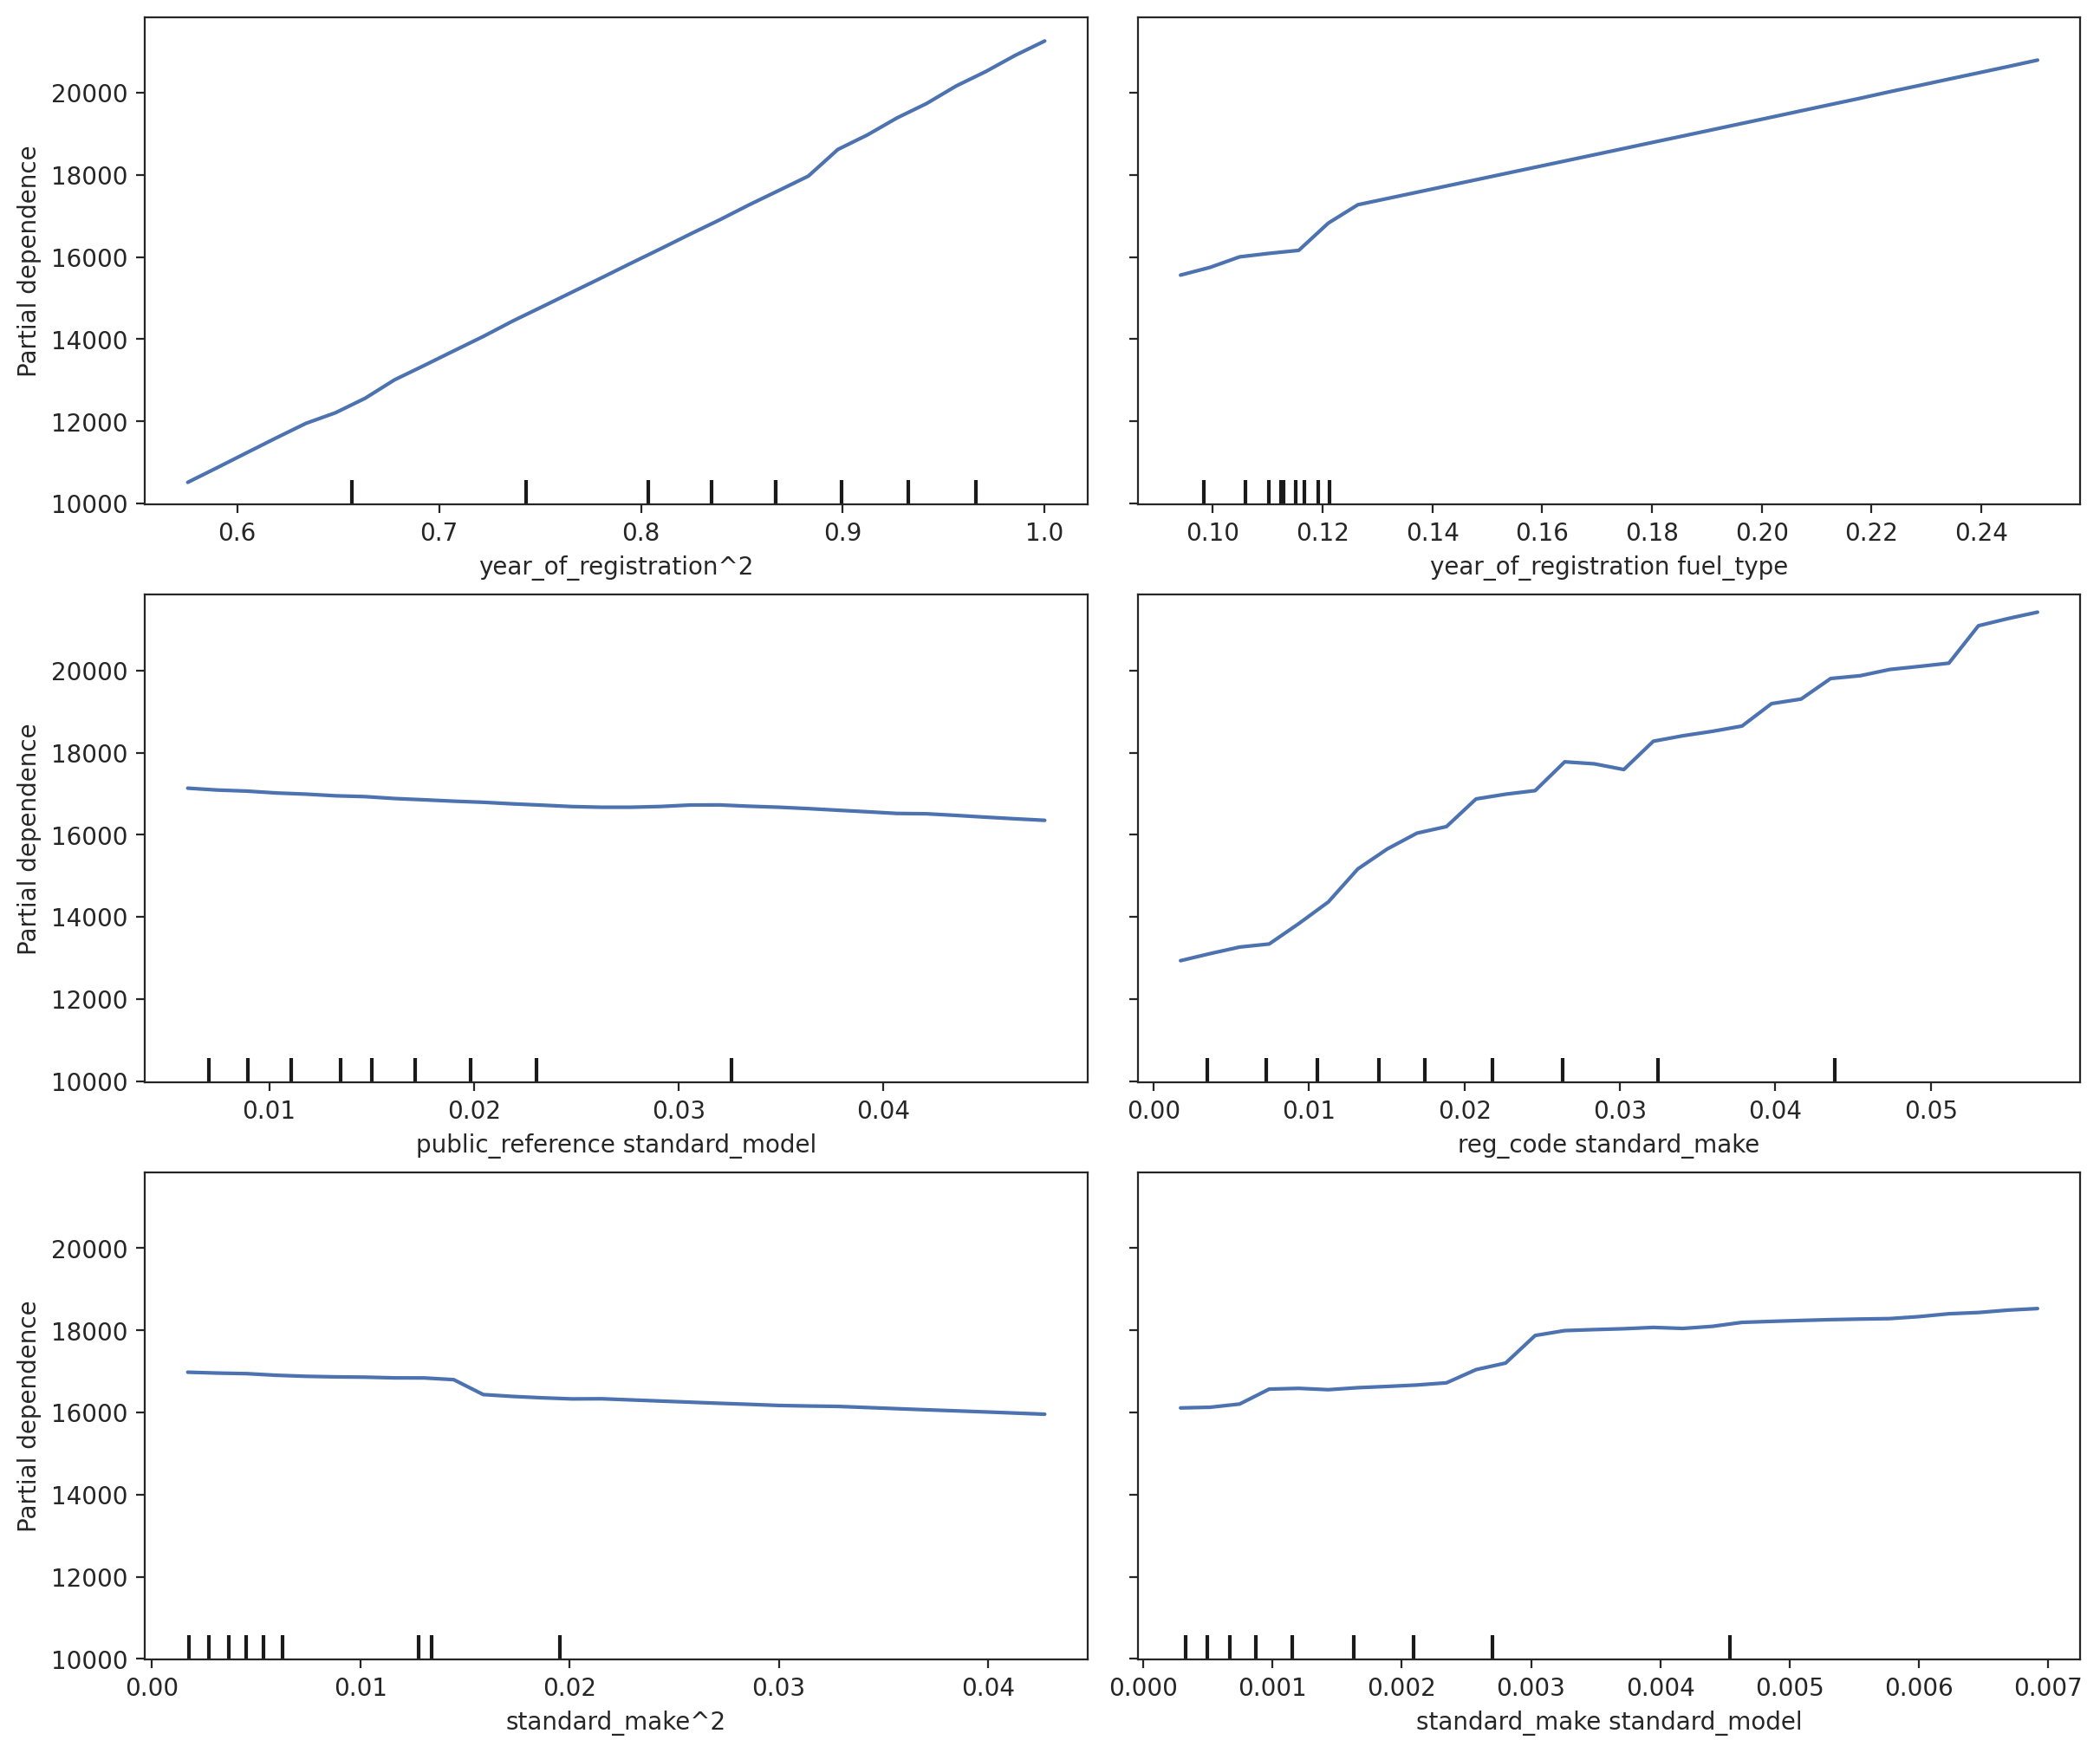

In [ ]:


xfig, ax = plt.subplots(figsize=(12,10), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    ensemble, X_test_RFECV, features=['year_of_registration^2', 'year_of_registration fuel_type',
       'public_reference standard_model', 'reg_code standard_make',
       'standard_make^2', 'standard_make standard_model',
   ],
    kind='average',
    grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

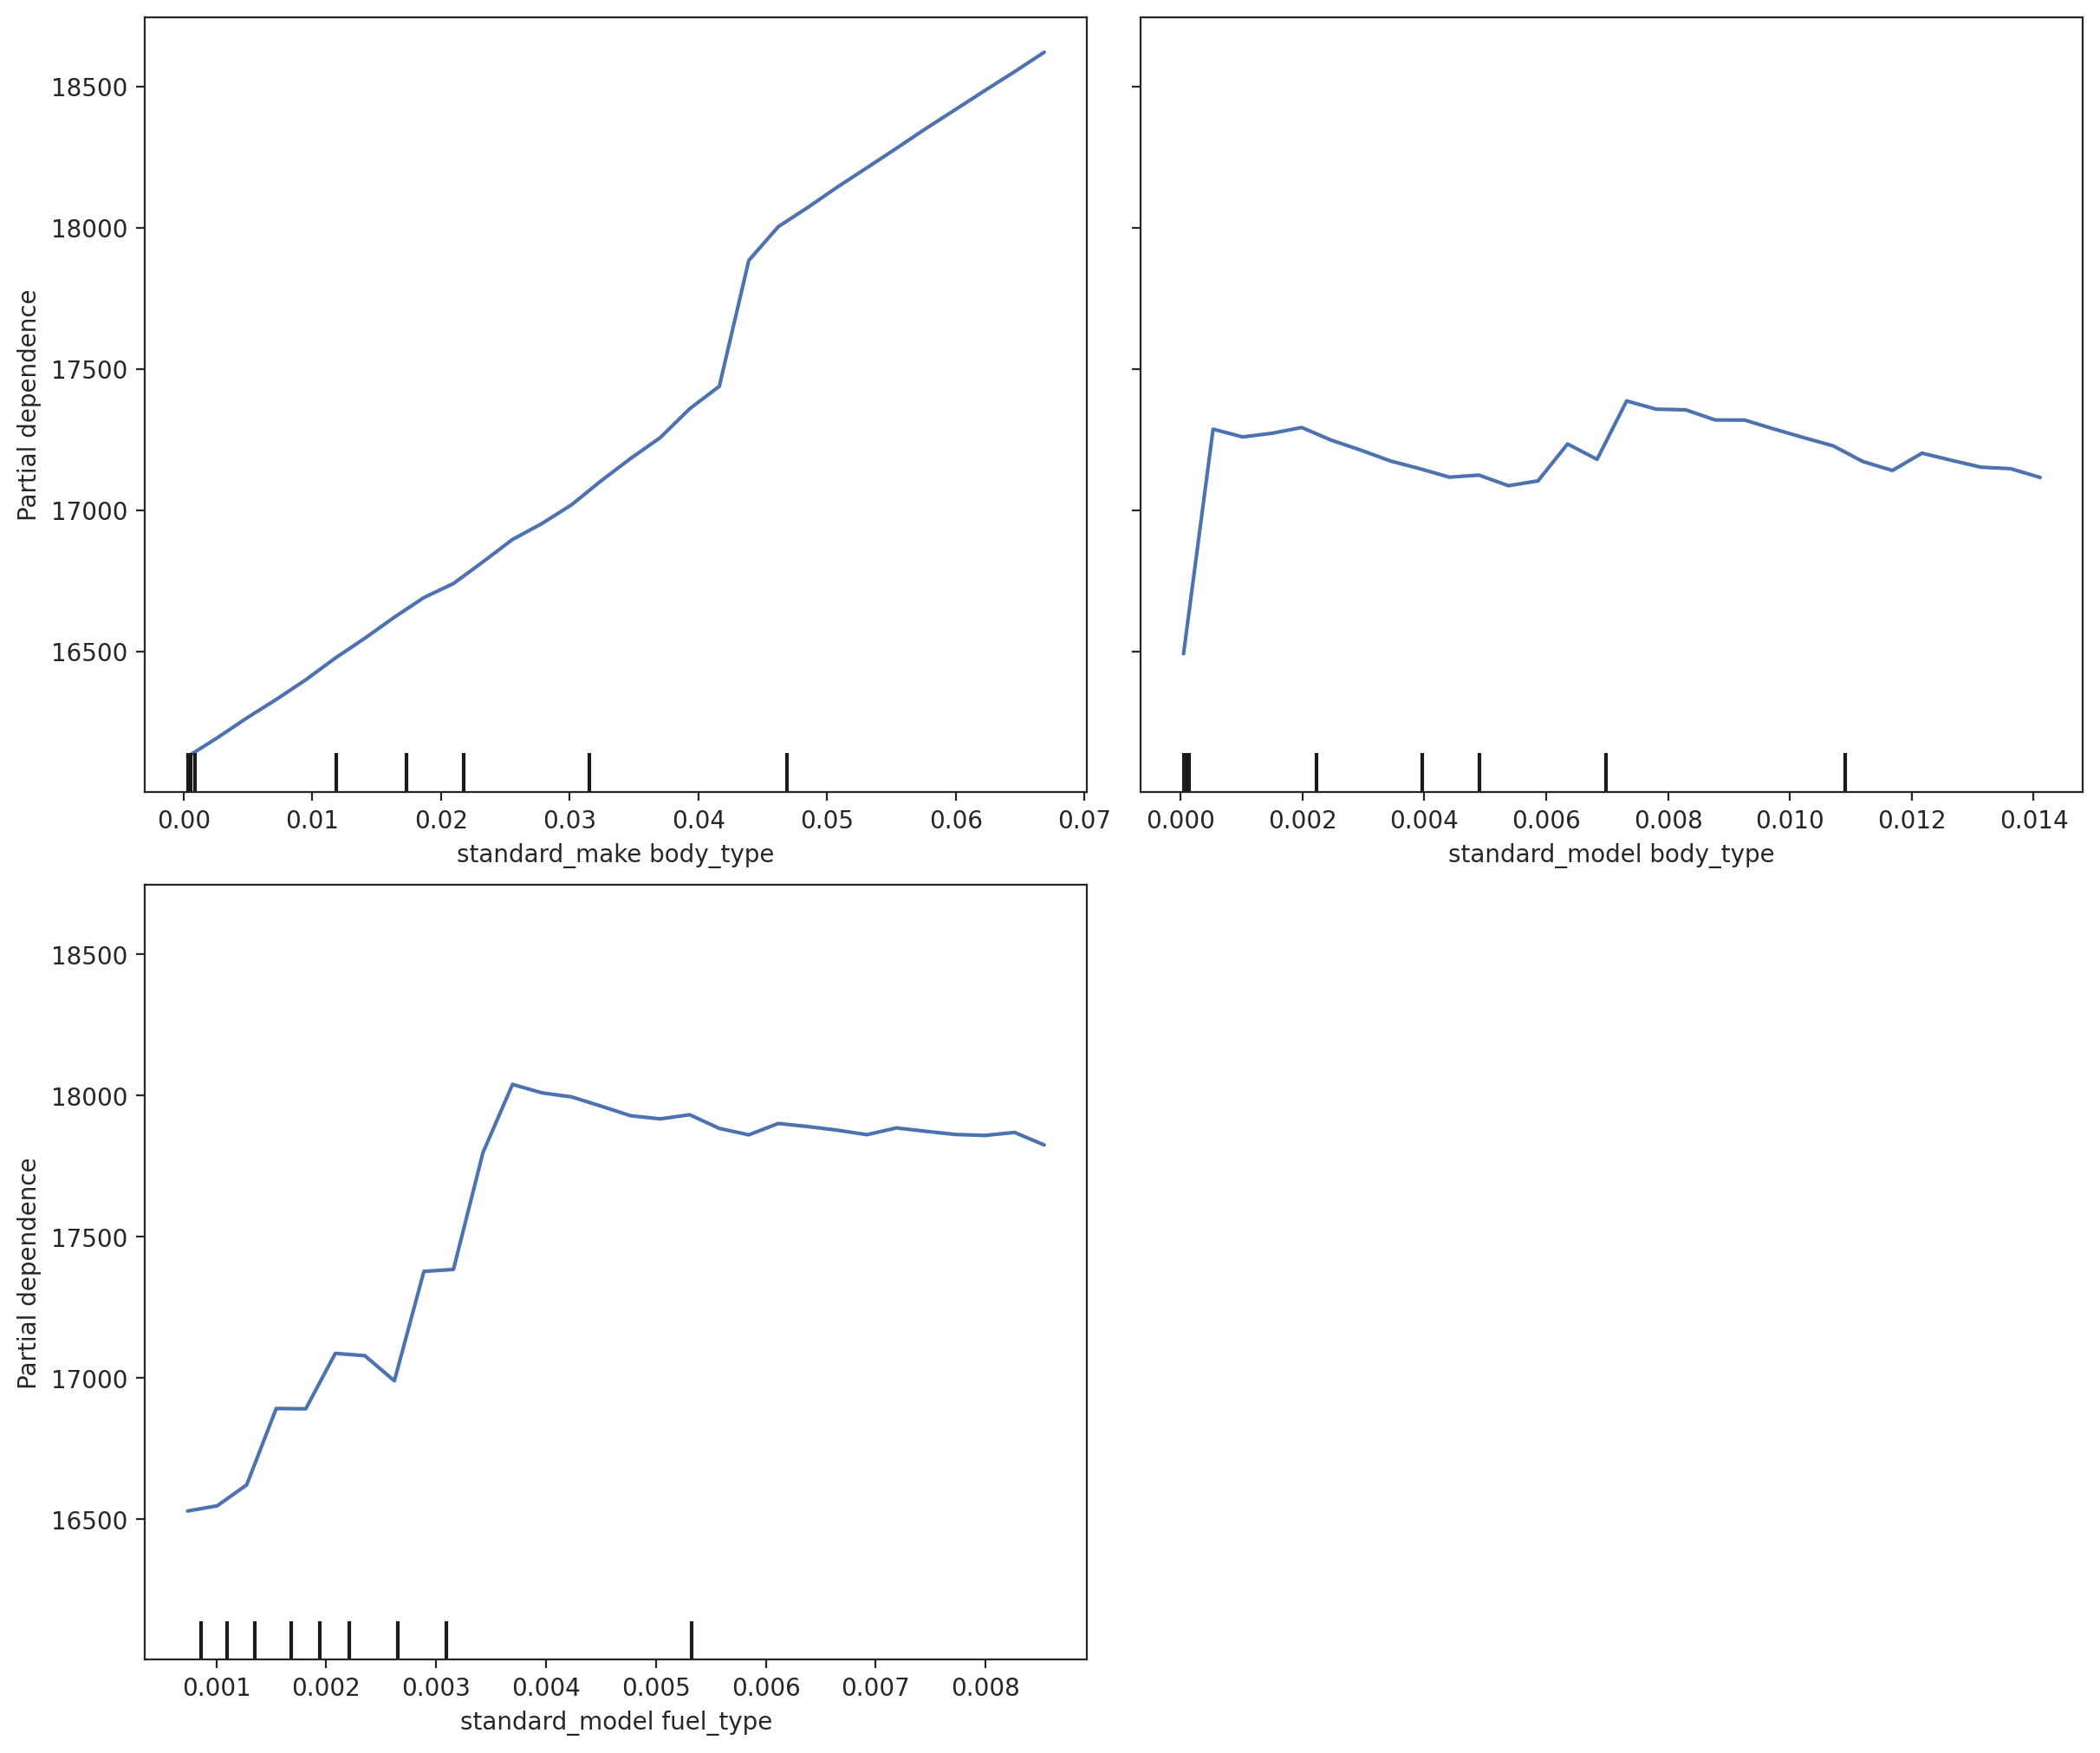

In [ ]:
xfig, ax = plt.subplots(figsize=(12,10), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    ensemble, X_test_RFECV, features=['standard_make body_type', 'standard_model body_type',
       'standard_model fuel_type'  ],
    kind='average',
    grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

In [ ]:
xfig, ax = plt.subplots(figsize=(12,10), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    ensemble, X_test_RFECV, features=['standard_make body_type', 'standard_model body_type',
       'standard_model fuel_type'  ],
    kind='average',
    grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

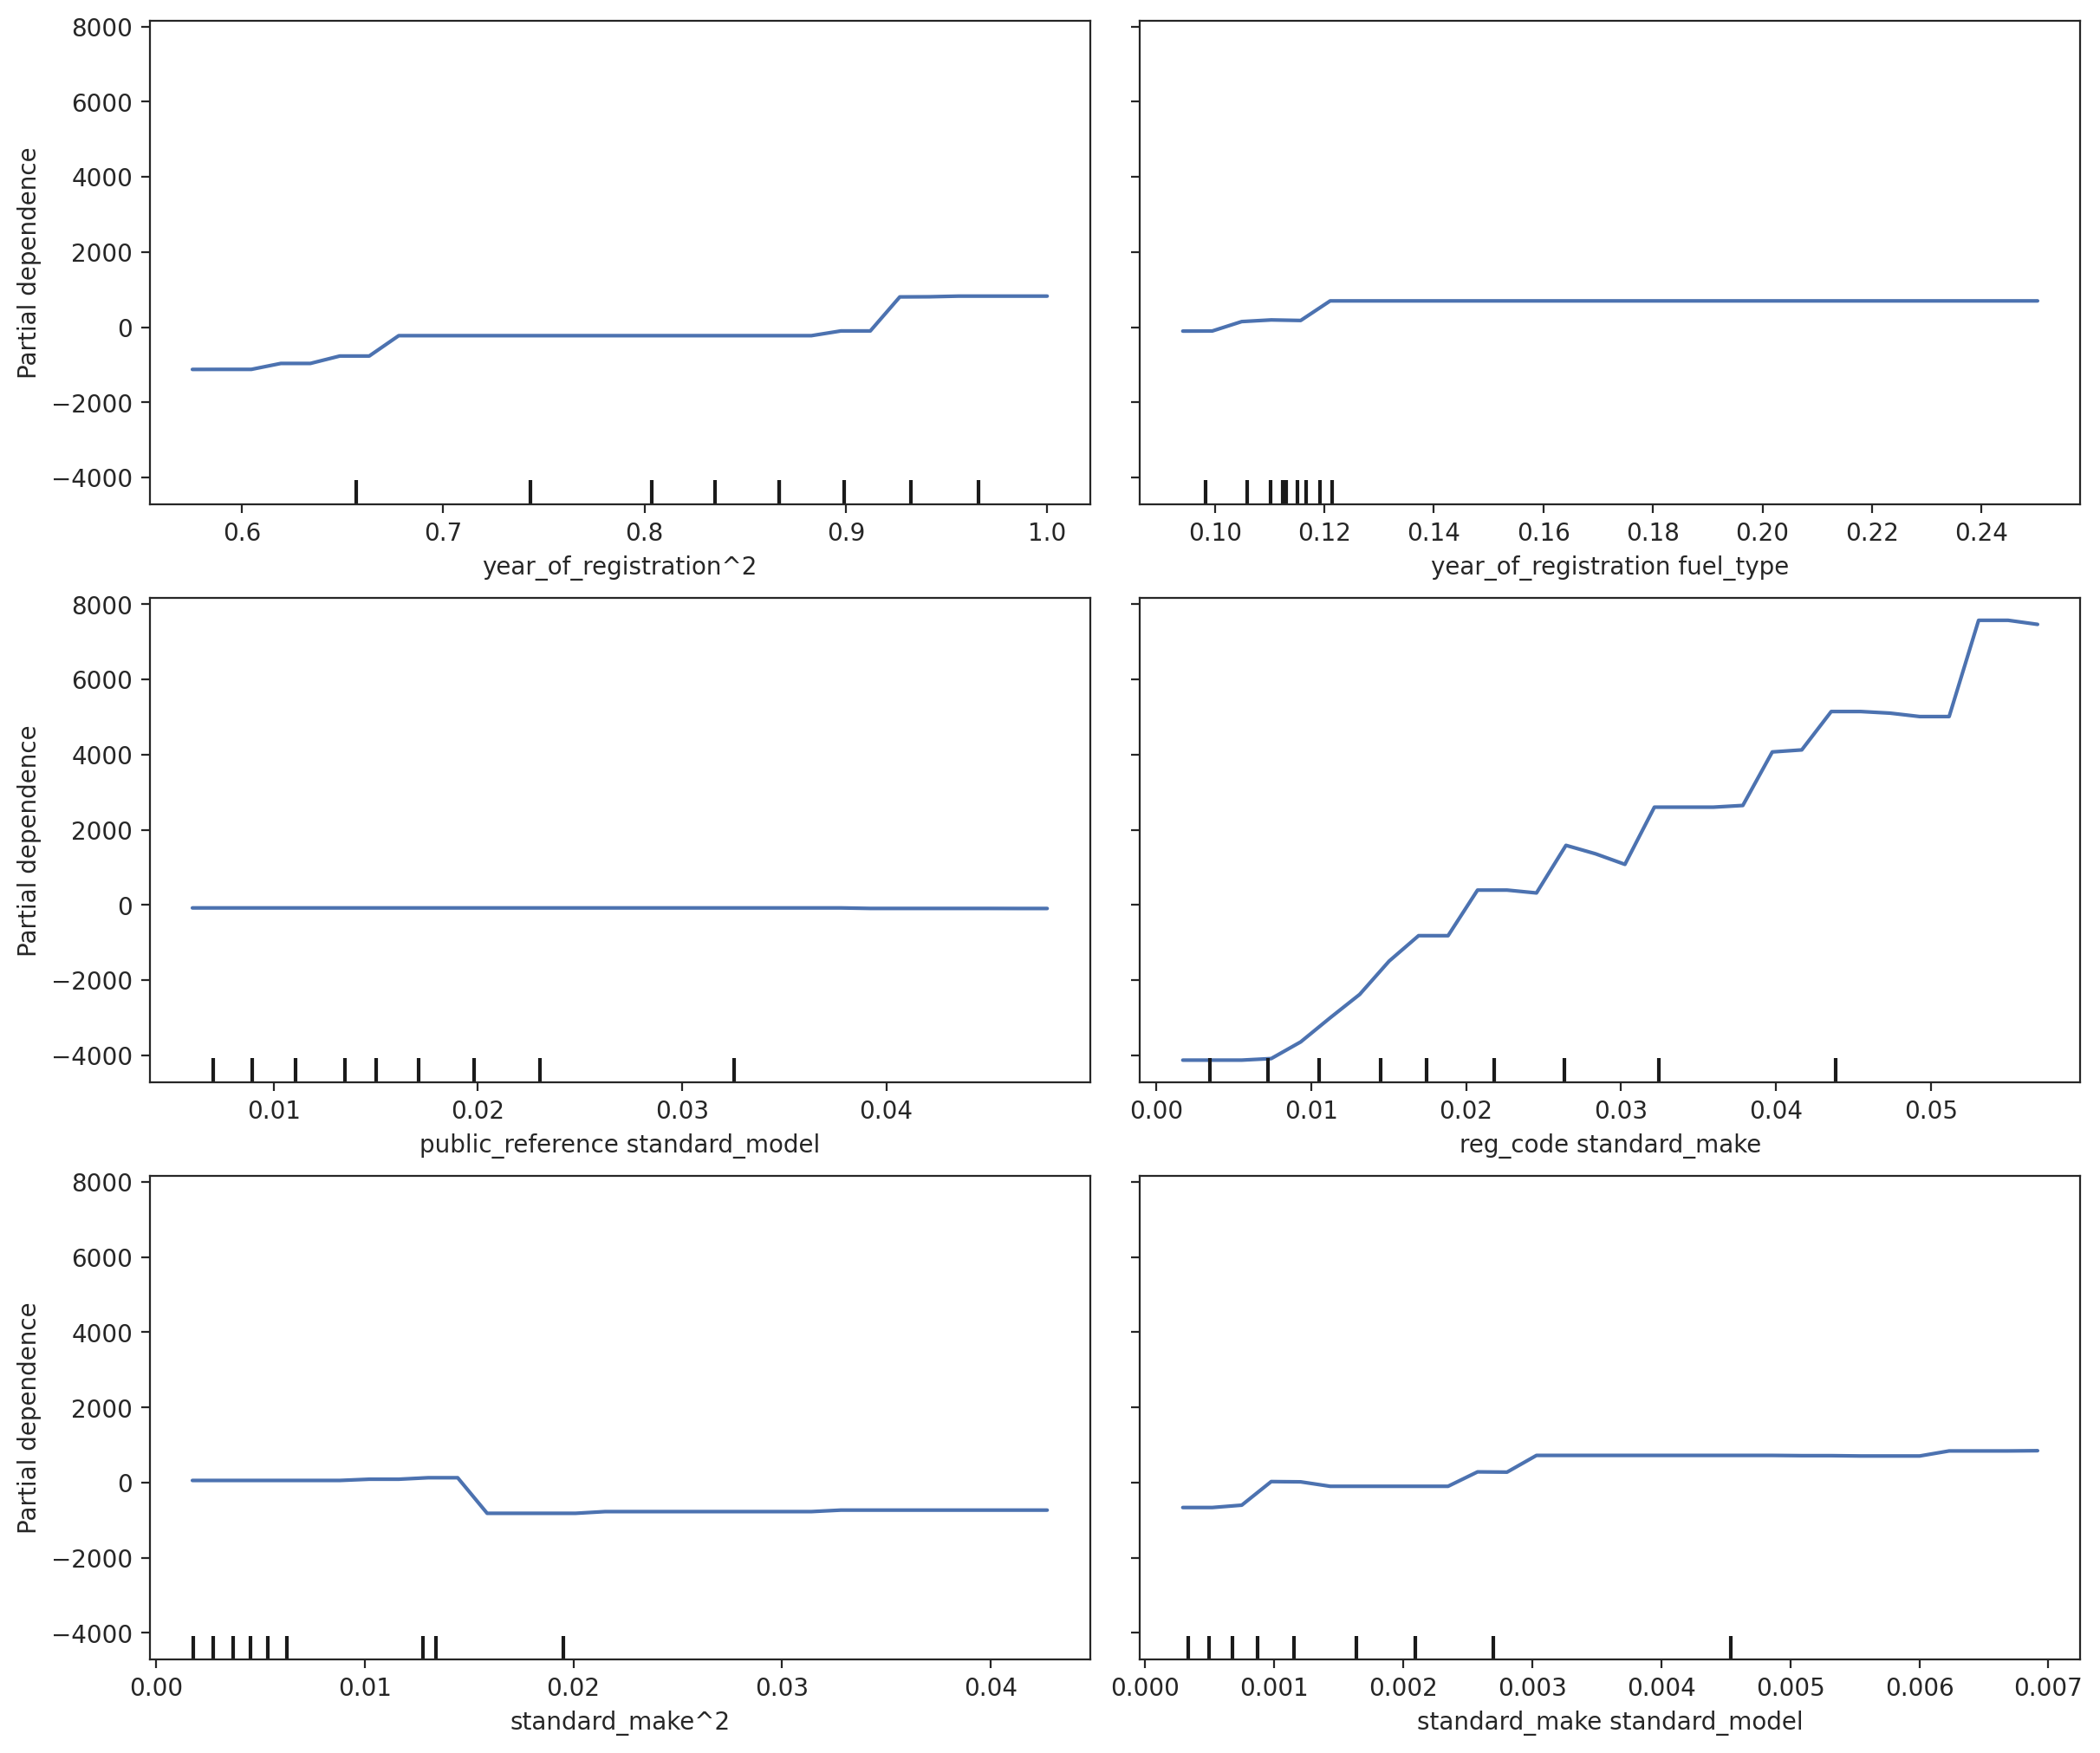

In [ ]:
#Gradient Boosting Regressor
xfig, ax = plt.subplots(figsize=(12,10), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rfe_gbr['regr'], X_test_RFECV, features=['year_of_registration^2', 'year_of_registration fuel_type',
       'public_reference standard_model', 'reg_code standard_make',
       'standard_make^2', 'standard_make standard_model',
   ],
    kind='average',
    grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

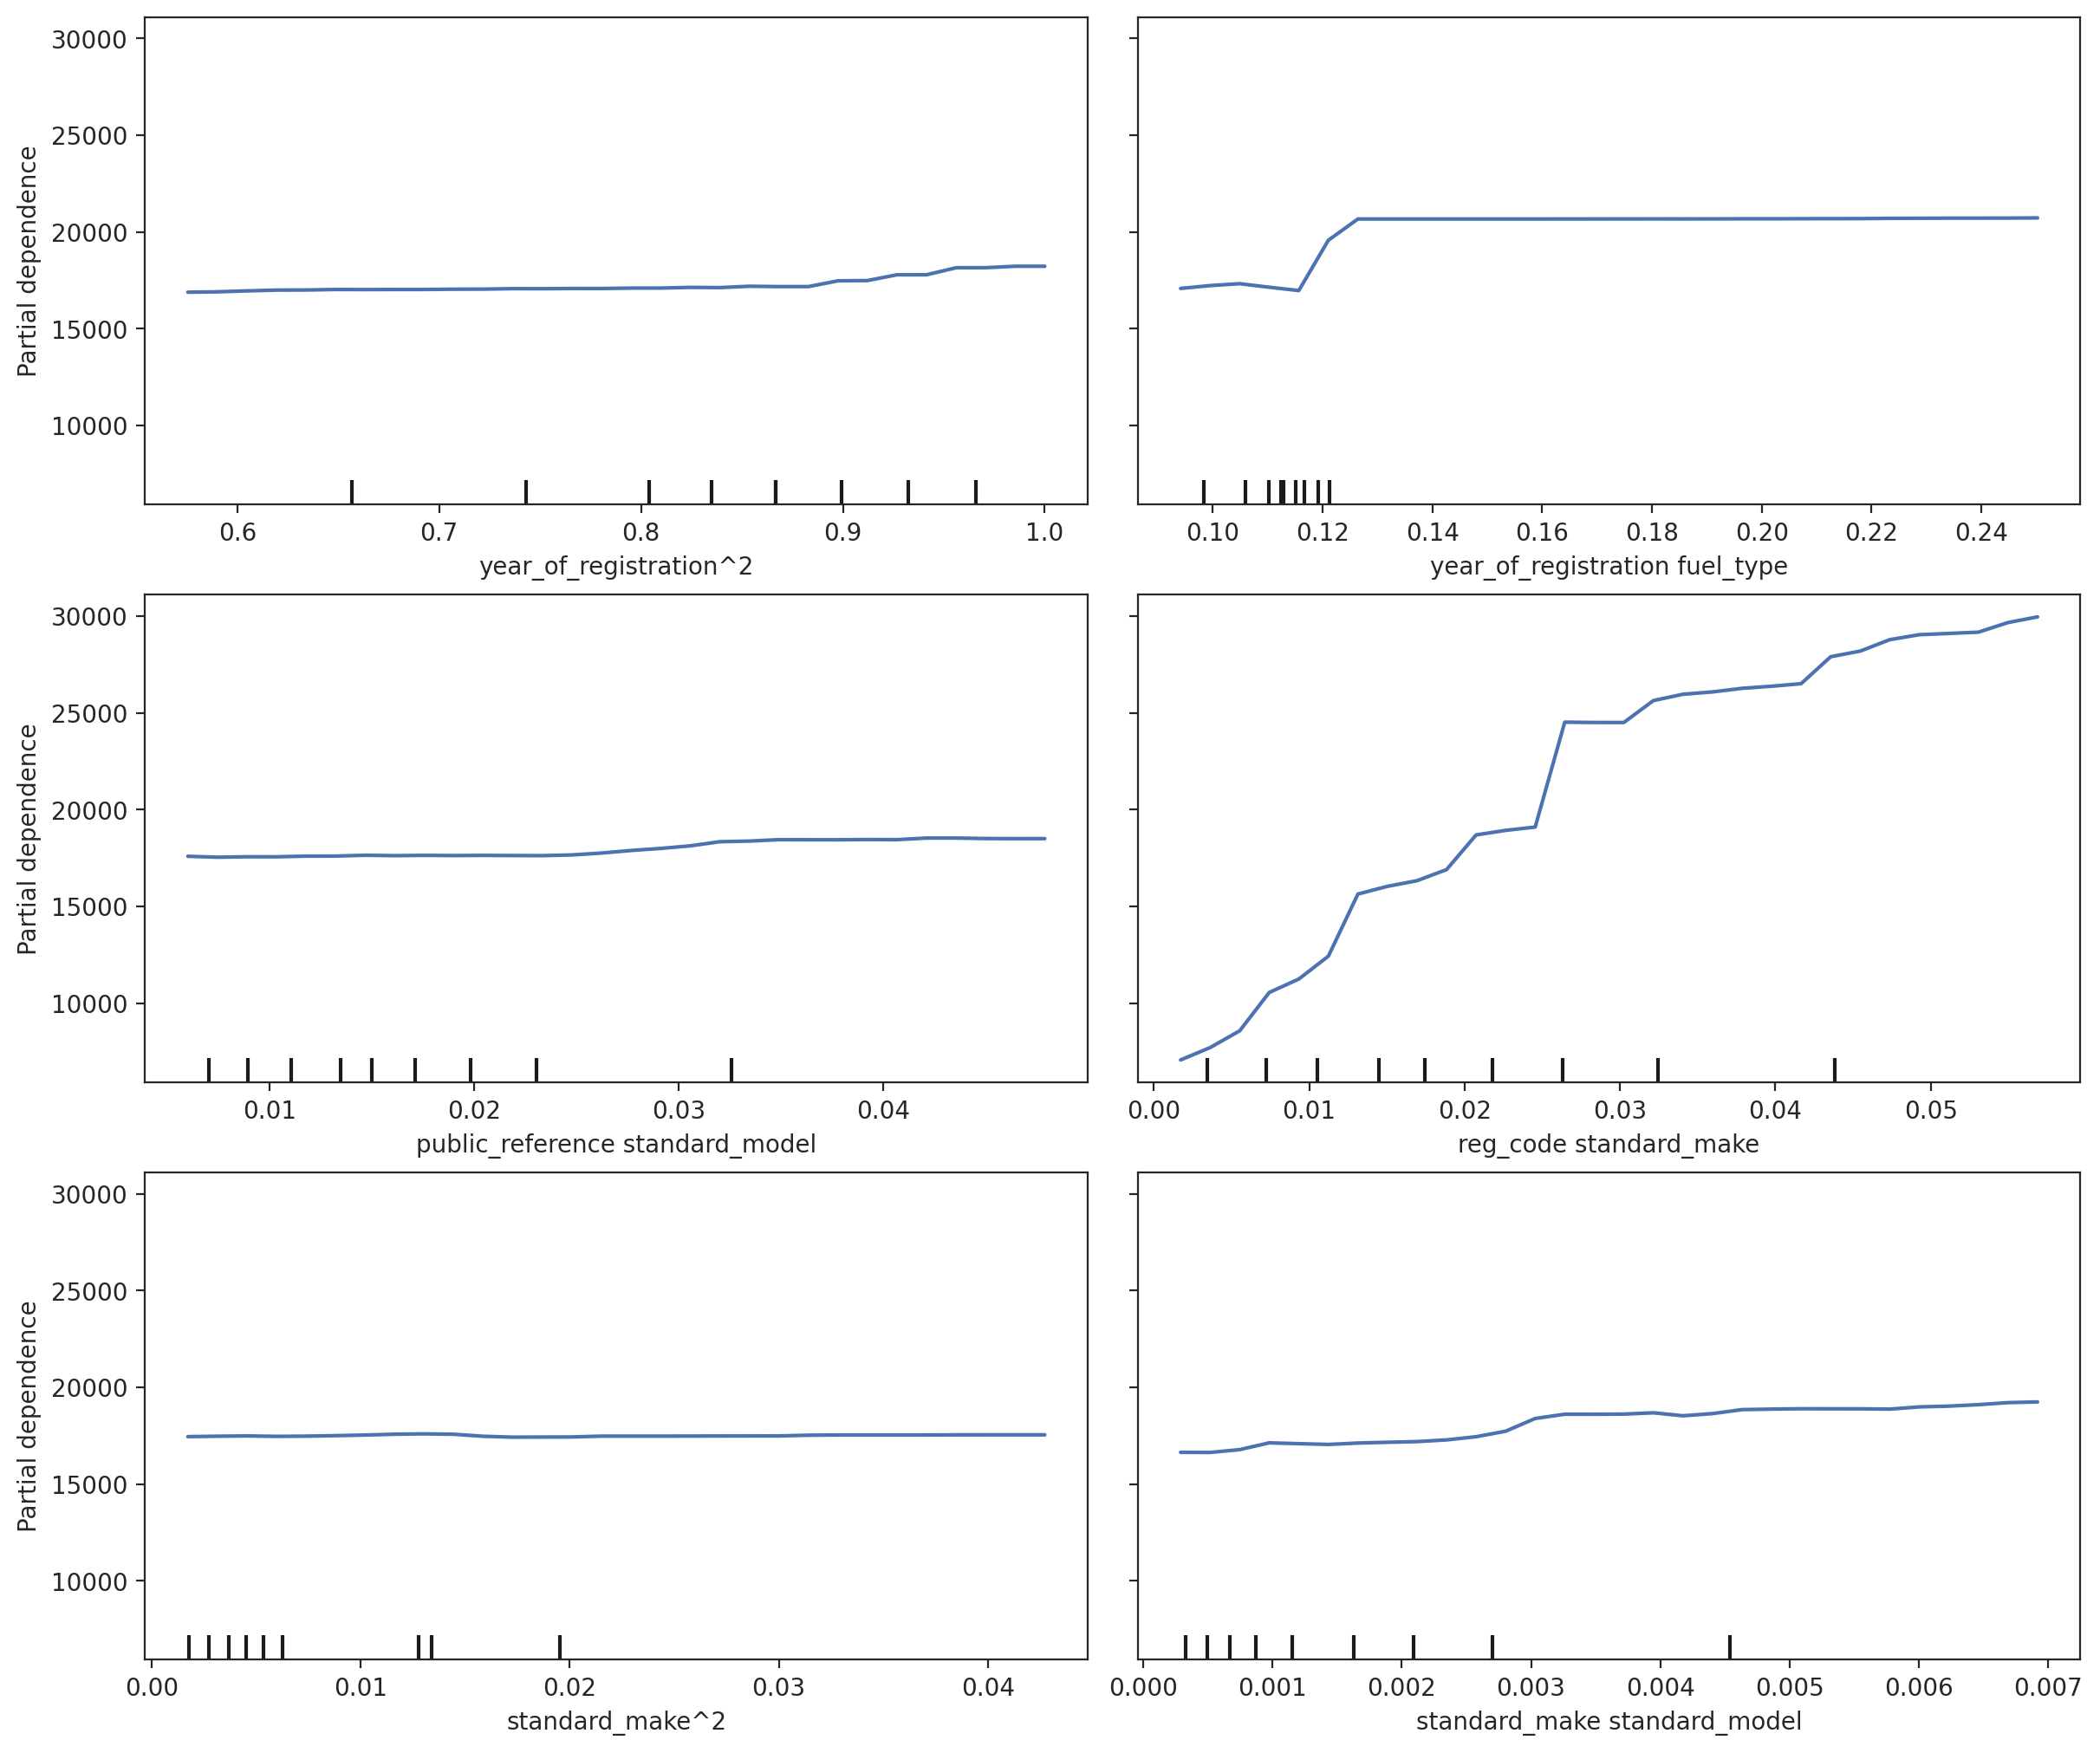

In [ ]:
#Random Forest
xfig, ax = plt.subplots(figsize=(12,10), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rfe_rgr['regr'], X_test_RFECV, features=['year_of_registration^2', 'year_of_registration fuel_type',
       'public_reference standard_model', 'reg_code standard_make',
       'standard_make^2', 'standard_make standard_model',
   ],
    kind='average',
    grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

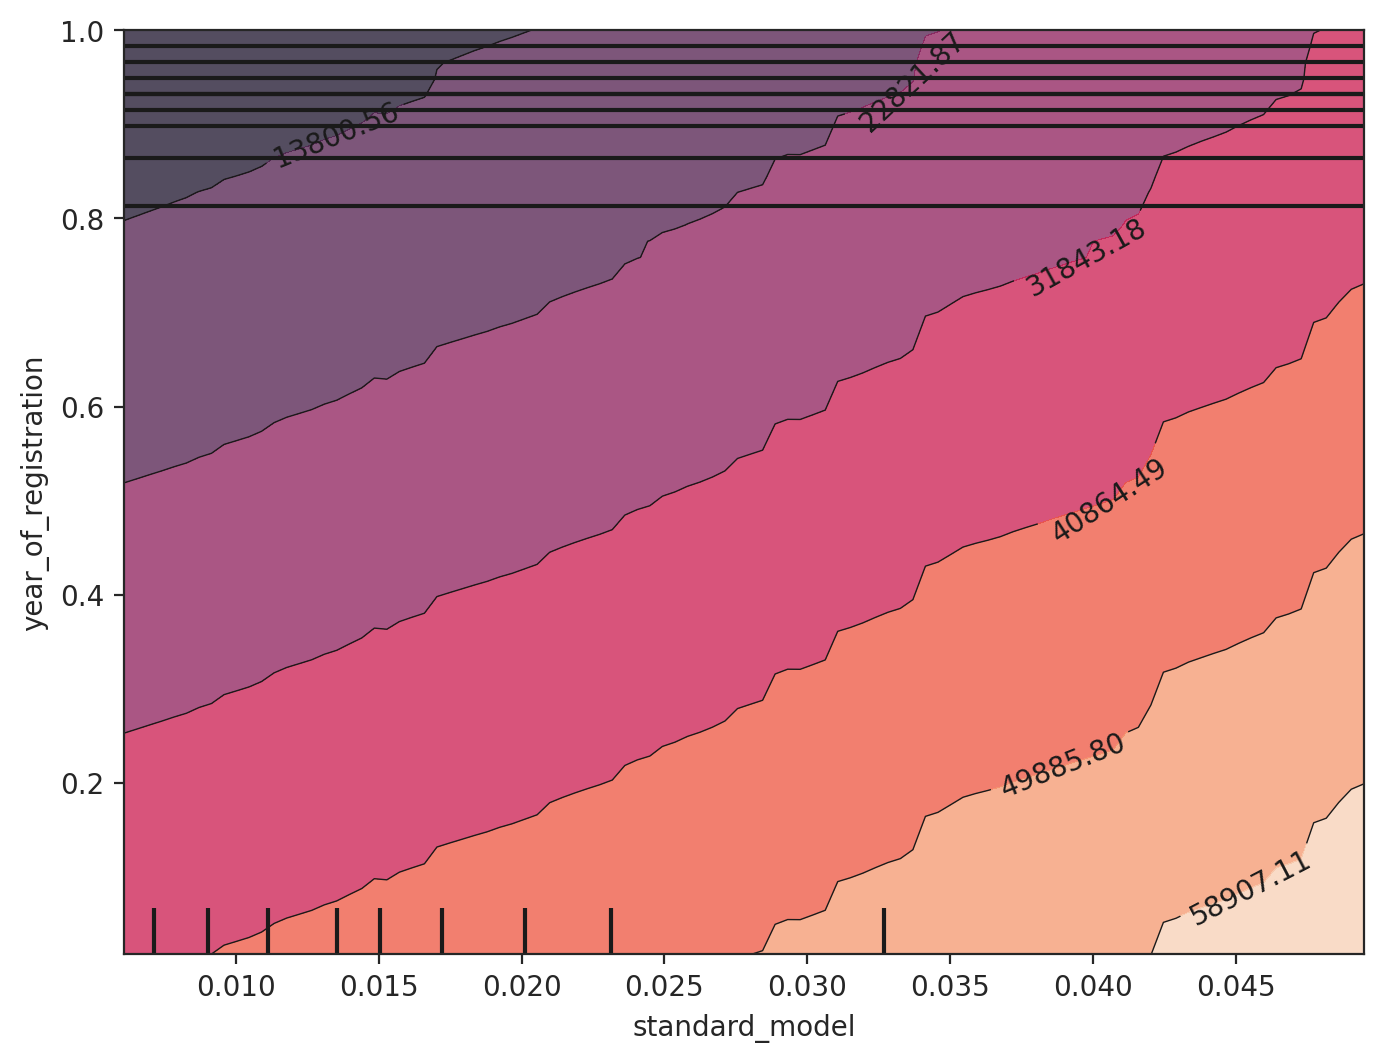

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
f_names = [('standard_model', 'year_of_registration')]
# Similar to previous PDP plot except we use tuple of features instead of single feature
disp4 = PartialDependenceDisplay.from_estimator(ensemble, X_test_RFECV, f_names, ax=ax)
plt.show()
